<a href="https://colab.research.google.com/github/Edem-m/JaxProject_Edem-Jaimie/blob/main/Jaxproject_Edem_Jaimie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
#-----# Install all the Python packages we need for this project----
!pip install -q gseapy pandas numpy scipy matplotlib seaborn

# Import gseapy so we can access MSigDB pathway gene sets
import gseapy as gp

# Import pandas for loading and manipulating tables of data
import pandas as pd

# Import numpy for numerical operations (like log transformations)
import numpy as np

# Import scipy for statistical tests (like t-tests)
import scipy

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for nicer statistical plots
import seaborn as sns

import re

# Print messages to confirm everything imported correctly
print("All imports successful!")
print("gseapy version:", gp.__version__)

All imports successful!
gseapy version: 1.1.11


In [198]:
# Use gseapy to download the MSigDB Hallmark gene sets
# These are curated gene lists that represent core biological pathways
# 'organism="Human"' ensures we get human gene symbols

hallmark = gp.get_library(
    name="MSigDB_Hallmark_2020",
    organism="Human"
)

In [199]:
# Convert the dictionary keys (pathway names) into a list
keys = list(hallmark.keys())

# Print how many Hallmark pathways were loaded
print("Number of Hallmark pathways:", len(keys))

# Print the first 10 pathway names so we can see what they look like
print("First 10 Hallmark pathways:")
print(keys[:10])

Number of Hallmark pathways: 50
First 10 Hallmark pathways:
['TNF-alpha Signaling via NF-kB', 'Hypoxia', 'Cholesterol Homeostasis', 'Mitotic Spindle', 'Wnt-beta Catenin Signaling', 'TGF-beta Signaling', 'IL-6/JAK/STAT3 Signaling', 'DNA Repair', 'G2-M Checkpoint', 'Apoptosis']


In [200]:
print(hallmark)

{'TNF-alpha Signaling via NF-kB': ['MARCKS', 'IL23A', 'NINJ1', 'TNFSF9', 'SIK1', 'ATF3', 'SERPINE1', 'MYC', 'HES1', 'CCN1', 'CCNL1', 'EGR1', 'EGR2', 'EGR3', 'JAG1', 'ABCA1', 'GADD45B', 'GADD45A', 'KLF10', 'PLK2', 'EIF1', 'EHD1', 'FOSL2', 'FOSL1', 'GPR183', 'PLPP3', 'IFIT2', 'ICAM1', 'ZC3H12A', 'IER2', 'IL12B', 'IER5', 'JUNB', 'IER3', 'STAT5A', 'DUSP5', 'EDN1', 'DUSP4', 'JUN', 'DUSP1', 'DUSP2', 'TSC22D1', 'CCL20', 'SPHK1', 'LIF', 'IL18', 'TUBB2A', 'RHOB', 'VEGFA', 'IL1A', 'PTPRE', 'TLR2', 'IL1B', 'BHLHE40', 'CLCF1', 'ID2', 'REL', 'FJX1', 'SGK1', 'BTG3', 'BTG2', 'BTG1', 'SDC4', 'LITAF', 'AREG', 'SOCS3', 'PANX1', 'RIPK2', 'NFIL3', 'SERPINB2', 'GCH1', 'IFNGR2', 'G0S2', 'FOS', 'F3', 'SERPINB8', 'SPSB1', 'FOSB', 'PER1', 'F2RL1', 'HBEGF', 'CD44', 'TRIP10', 'CDKN1A', 'PTGER4', 'PTGS2', 'IFIH1', 'NAMPT', 'OLR1', 'ICOSLG', 'PHLDA1', 'ZBTB10', 'TAP1', 'PNRC1', 'CXCL10', 'CXCL11', 'IL6ST', 'CD69', 'SQSTM1', 'RELA', 'CD83', 'CSF2', 'CSF1', 'CD80', 'PPP1R15A', 'TNC', 'TNF', 'RELB', 'TANK', 'ZFP36', 

In [201]:
df = pd.DataFrame([
    {"Hallmark": k, "NumGenes": len(v), "First40Genes": ", ".join(v[:40])}
    for k, v in hallmark.items()
]).sort_values("NumGenes", ascending=False)

#print(df)

In [202]:
#this takes the dataframe of the hallmarks and put them into a csv file
with open("hallmark_genes.txt", "w") as f:
    for k, genes in hallmark.items():
        f.write(f"{k}\t{','.join(genes)}\n")


df.to_csv("hallmark_summary.csv", index=False)

In [203]:
#-----Uploading the reading from the GSE255403_Read_counts.xlsx file and chekcing the file contect----


#Loading the file and assigning it to the variable read_count
read_count = pd.read_csv("GSE255403_norm_counts_FPKM_GRCh38.p13_NCBI.tsv", sep = '\t')

read_count.head()          # look at the first few rows
read_count.shape           # number of genes × number of samples
read_count.columns[:10]    # first few column names


Index(['GeneID', 'GSM8072033', 'GSM8072034', 'GSM8072036', 'GSM8072037',
       'GSM8072038', 'GSM8072040', 'GSM8072041', 'GSM8072042', 'GSM8072043'],
      dtype='object')

In [204]:


# Example of reading a TSV file using pd.read_csv with a tab separator
# Replace 'your_file.tsv' with the actual path to your TSV file
# df_tsv = pd.read_csv('your_file.tsv', sep='\t')

# Alternatively, you can use pd.read_table(), which defaults to a tab separator
# df_tsv = pd.read_table('your_file.tsv')

#print("Pandas can read .tsv files using pd.read_csv(sep='\\t') or pd.read_table().")

In [205]:
# Reading the meta data

meta_data=pd.read_table("GSE255403_series_matrix.txt",delimiter='\t',skiprows=54)
#meta_data.head(10)

In [206]:
# Read the file WITHOUT skipping rows, handling inconsistent column counts
lines = []
with open("GSE255403_series_matrix.txt", "r") as f:
    for line in f:
        lines.append(line.strip().split('\t'))

# Create a DataFrame from the list of lists
raw_df = pd.DataFrame(lines)

# Keep only rows that describe samples
# Ensure the first column is treated as string for .startswith() method
sample_rows = raw_df[raw_df[0].astype(str).str.startswith("!Sample")]

sample_rows.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
54,!Sample_title,"""SMA1""","""SMA2""","""SMA3""","""SMA4""","""SMA5""","""SMA6""","""SMA7""","""SMA8""","""SMA9""",...,"""nonSMA33""","""nonSMA34""","""nonSMA35""","""nonSMA36""","""nonSMA37""","""nonSMA38""","""nonSMA39""","""nonSMA40""","""nonSMA41""","""nonSMA24"""
55,!Sample_geo_accession,"""GSM8072033""","""GSM8072034""","""GSM8072035""","""GSM8072036""","""GSM8072037""","""GSM8072038""","""GSM8072039""","""GSM8072040""","""GSM8072041""",...,"""GSM8072091""","""GSM8072092""","""GSM8072093""","""GSM8072094""","""GSM8072095""","""GSM8072096""","""GSM8072097""","""GSM8072098""","""GSM8072099""","""GSM8135504"""
56,!Sample_status,"""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""",...,"""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024"""
57,!Sample_submission_date,"""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""",...,"""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Mar 07 2024"""
58,!Sample_last_update_date,"""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""",...,"""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Apr 17 2024"""


In [207]:
# Set column 0 (which contains metadata field names like !Sample_title)
# as the index of the DataFrame.
# This allows us to refer to metadata fields by name instead of by row number.
sample_rows = sample_rows.set_index(0)

In [208]:
# Transpose the DataFrame so that:
# - Rows become samples (GSM IDs)
# - Columns become metadata fields
#
# This is the standard format for a metadata table:
# each row = one sample, each column = one attribute of that sample
meta = sample_rows.T

In [209]:
#meta.head(66)
#meta.shape
#meta.columns

In [210]:
# GEO sometimes stores sample characteristics across multiple columns
# (e.g. !Sample_characteristics_ch1, !Sample_characteristics_ch1.1, etc.)
#
# This line finds all columns whose name contains 'Sample_characteristics_ch1'
char_cols = [c for c in meta.columns if "Sample_characteristics_ch1" in str(c)]

In [211]:
# Re-executing dependent cells to define combined_df_no_nan_cols

# Import necessary libraries (if not already imported globally)

# Reload read_count to ensure 'GeneID' column is present
read_count = pd.read_csv("GSE255403_norm_counts_FPKM_GRCh38.p13_NCBI.tsv", sep = '\t')

# Load the annotation file containing GeneIDs and their corresponding gene symbols.
# This file acts as a lookup table to translate numerical GeneIDs into human-readable names.
Human_GRCh38 = pd.read_csv("Human.GRCh38.p13.annot.tsv", sep='\t', low_memory=False)

# Create a dictionary to map GeneIDs (keys) to their respective gene Symbols (values).
gene_id_to_name_dict = dict(zip(Human_GRCh38['GeneID'], Human_GRCh38['Symbol']))

# Replace the numerical 'GeneID' column in the 'read_count' DataFrame with the descriptive gene names.
read_count['GeneID'] = read_count['GeneID'].replace(gene_id_to_name_dict)

# Rename the 'GeneID' column to 'GeneName' to reflect the new content.
read_count = read_count.rename(columns={'GeneID': 'GeneName'})

read_count = read_count.set_index('GeneName')

# --- Start of metadata reconstruction for 'metadata' DataFrame ---

# Read the file WITHOUT skipping rows, handling inconsistent column counts
lines = []
with open("GSE255403_series_matrix.txt", "r") as f:
    for line in f:
        lines.append(line.strip().split('\t'))

# Create a DataFrame from the list of lists
raw_df = pd.DataFrame(lines)

# Keep only rows that describe samples
# Ensure the first column is treated as string for .startswith() method
sample_rows = raw_df[raw_df[0].astype(str).str.startswith("!Sample")]

# Set column 0 (which contains metadata field names like !Sample_title)
# as the index of the DataFrame. This allows referring to metadata fields by name.
sample_rows = sample_rows.set_index(0)

# Transpose the DataFrame so that rows become samples (GSM IDs) and columns become metadata fields.
meta = sample_rows.T

# Find all columns whose name contains 'Sample_characteristics_ch1'
char_cols = [c for c in meta.columns if "Sample_characteristics_ch1" in str(c)]

# For each sample, combine all characteristics columns into a single string.
chars_series = (
    meta[char_cols]
    .fillna("")
    .astype(str)
    .agg(" ; ".join, axis=1)
)

def extract_kv_pairs(text):
    """
    This function takes a string like:
      'Sex: MALE ; Genotype: HbAS ; Condition: SMA'
    and converts it into a dictionary:
      {'sex': 'MALE', 'genotype': 'HbAS', 'condition': 'SMA'}
    """
    if not isinstance(text, str):
        return {}
    parts = re.split(r"\s*[;|]\s*", text.strip())
    out = {}
    for p in parts:
        p = p.strip().strip('"')
        if not p:
            continue
        m = re.match(r"^\s*([^:=]+?)\s*[:=]\s*(.+?)\s*$", p)
        if not m:
            continue
        key = m.group(1).replace('"', '').strip().lower()
        val = m.group(2).replace('"', '').strip()
        key = re.sub(r"\s+", "_", key)
        out[key] = val
    return out

# Apply the key–value extraction function to each sample's characteristics string
parsed_chars = chars_series.apply(extract_kv_pairs)

# Convert the list of dictionaries into a DataFrame
chars_df = pd.json_normalize(parsed_chars)

# Make sure the index (sample IDs) matches the metadata table
chars_df.index = meta.index

def pick_col(df, patterns):
    """
    Searches for a column whose name matches one of the provided patterns.
    Returns the first match found, or None if no match exists.
    """
    for col in df.columns:
        for pat in patterns:
            if re.search(pat, col.replace('"', '')):
                return col
    return None

# Identify the appropriate columns for sex, genotype, and condition
sex_col  = pick_col(chars_df, [r"\bsex\b", r"\bgender\b"])
geno_col = pick_col(chars_df, [r"\bgenotype\b", r"\bhb\b", r"\bsickle\b", r"genetic_variants"])
cond_col = pick_col(chars_df, [r"\bcondition\b", r"\bdisease\b", r"\bsma\b"])

# Create a copy of the metadata table so we don't overwrite the original
meta_parsed = meta.copy()

# Add cleaned biological variables if they were found
if sex_col:
    meta_parsed["sex"] = chars_df[sex_col]
if geno_col:
    meta_parsed["genotype"] = chars_df[geno_col]
if cond_col:
    meta_parsed["condition"] = chars_df[cond_col]

# Clean column names in meta_parsed
meta_parsed.columns = [
    c.replace("!Sample_", "").strip('"')
    for c in meta_parsed.columns
]

# Clean values in 'sex' and 'genotype' columns if they exist
if 'sex' in meta_parsed.columns:
    meta_parsed['sex'] = meta_parsed['sex'].str.strip('"')
if 'genotype' in meta_parsed.columns:
    meta_parsed['genotype'] = meta_parsed['genotype'].str.strip('"')

# Rename sample_geo_accession to sample_id
if 'geo_accession' in meta_parsed.columns:
    meta_parsed = meta_parsed.rename(columns={'geo_accession': 'sample_id'})

# Select only relevant metadata columns for further use
final_cols = ['sample_id']
if 'sex' in meta_parsed.columns:
    final_cols.append('sex')
if 'genotype' in meta_parsed.columns:
    final_cols.append('genotype')

metadata = meta_parsed[final_cols].copy()
metadata['sample_id'] = metadata['sample_id'].str.strip('"')
metadata = metadata.set_index('sample_id')
# --- End of metadata reconstruction ---


# Now that 'metadata' is guaranteed to be defined
metadata_t = metadata[['sex', 'genotype']].T

combined_df = pd.concat([metadata_t, read_count], axis=0)

combined_df_no_nan_cols = combined_df.dropna(axis=1).copy()

print("Dependencies re-executed and 'combined_df_no_nan_cols' is now defined.")

# Get the 'sex' row, which is the first row (index 0) in combined_df_no_nan_cols
sex_labels = combined_df_no_nan_cols.loc['sex']

# Select a few example genes for plotting. Let's pick the first 5 actual genes after metadata.
# Ensure these genes exist in the DataFrame's index before selecting.
example_genes = combined_df_no_nan_cols.index[2:7].tolist()

# Filter the DataFrame to include only these example genes and the sex row
# And transpose to have genes as columns and samples as rows
plot_df = combined_df_no_nan_cols.loc[example_genes].T

# Add the sex labels as a column to the plot_df
plot_df['sex'] = sex_labels.values

# Convert gene expression columns to numeric, coercing errors to NaN
# This is important as the DataFrame might contain 'NaN' or other non-numeric values
for col in example_genes:
    plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')

# Melt the DataFrame to long format for seaborn
melted_df = plot_df.melt(id_vars=['sex'], var_name='Gene', value_name='Expression')

print("Melted DataFrame head for plotting:")
display(melted_df.head())

Dependencies re-executed and 'combined_df_no_nan_cols' is now defined.
Melted DataFrame head for plotting:


,sex,Gene,Expression
0,MALE,DDX11L1,0.15540
1,MALE,DDX11L1,0.21000
2,MALE,DDX11L1,0.24460
3,MALE,DDX11L1,0.41400
4,FEMALE,DDX11L1,0.08738


In [212]:
# For each sample (row), combine all characteristics columns into a single string.
# - fillna("") avoids errors from missing values
# - astype(str) ensures everything is treated as text
# - agg(" ; ".join, axis=1) joins values with a separator
#
# Result: one long string per sample containing key:value pairs
chars_series = (
    meta[char_cols]
    .fillna("")
    .astype(str)
    .agg(" ; ".join, axis=1)
)

In [213]:
import re

def extract_kv_pairs(text):
    """
    This function takes a string like:
      'Sex: MALE ; Genotype: HbAS ; Condition: SMA'
    and converts it into a dictionary:
      {'sex': 'MALE', 'genotype': 'HbAS', 'condition': 'SMA'}
    """
    # If the input is not a string, return an empty dictionary
    if not isinstance(text, str):
        return {}

    # Split the text into parts using common separators (; or |)
    parts = re.split(r"\s*[;|]\s*", text.strip())

    out = {}
    for p in parts:
        # First, ensure the part itself is stripped of any outer quotes before matching
        p = p.strip().strip('"')
        if not p:
            continue

        # Match patterns like 'Key: Value' or 'Key = Value'
        m = re.match(r"^\s*([^:=]+?)\s*[:=]\s*(.+?)\s*$", p)
        if not m:
            continue

        # Extract key and value, then remove ALL quotes from them, then strip whitespace
        key = m.group(1).replace('"', '').strip().lower()
        val = m.group(2).replace('"', '').strip()

        # Normalize key name: replace spaces with underscores
        key = re.sub(r"\s+", "_", key)

        out[key] = val

    return out

In [214]:
# Apply the key–value extraction function to each sample's characteristics string
parsed_chars = chars_series.apply(extract_kv_pairs)

# Convert the list of dictionaries into a DataFrame
# Each key becomes a column
chars_df = pd.json_normalize(parsed_chars)

# Make sure the index (sample IDs) matches the metadata table
chars_df.index = meta.index

In [215]:
# Print the column names to see what metadata fields were found
chars_df.columns.tolist()

['sex', 'genetic_variants', 'time', 'tissue']

In [216]:
# Helper function to find a column whose name matches one of the provided patterns.
def pick_col(df, patterns):
    """
    Searches for a column whose name matches one of the provided patterns.
    Returns the first match found, or None if no match exists.
    """
    for col in df.columns:
        for pat in patterns:
            # Ensure robust matching, even if a quote might accidentally slip into column names
            if re.search(pat, col.replace('"', '')):
                return col
    return None

# Identify the appropriate columns for sex, genotype, and condition
# With 'extract_kv_pairs' fixed, columns in chars_df should now be unquoted.
sex_col  = pick_col(chars_df, [r"\bsex\b", r"\bgender\b"])
geno_col = pick_col(chars_df, [r"\bgenotype\b", r"\bhb\b", r"\bsickle\b", r"genetic_variants"])
cond_col = pick_col(chars_df, [r"\bcondition\b", r"\bdisease\b", r"\bdiagnosis\b", r"\bsma\b"])

In [217]:
# Drop columns that contain any NaN values
combined_df_no_nan_cols = combined_df.dropna(axis=1)

print(f"Original DataFrame shape: {combined_df.shape}")
print(f"DataFrame shape after dropping columns with NaN: {combined_df_no_nan_cols.shape}")

print("First 5 rows of the DataFrame after dropping columns with NaN:")
display(combined_df_no_nan_cols.head())

Original DataFrame shape: (39378, 66)
DataFrame shape after dropping columns with NaN: (39378, 41)
First 5 rows of the DataFrame after dropping columns with NaN:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,MALE,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.9825,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,7.427,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,1.137,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974


In [218]:
# Create a copy of the metadata table so we don't overwrite the original
meta_parsed = meta.copy()

# Add cleaned biological variables if they were found
if sex_col:
    meta_parsed["sex"] = chars_df[sex_col]

if geno_col:
    meta_parsed["genotype"] = chars_df[geno_col]

if cond_col:
    meta_parsed["condition"] = chars_df[cond_col]

In [219]:
# Display the key columns to verify extraction worked

display_cols = []
if "sex" in meta_parsed.columns:
    display_cols.append("sex")
if "genotype" in meta_parsed.columns:
    display_cols.append("genotype")
if "condition" in meta_parsed.columns:
    display_cols.append("condition")

if display_cols:
    meta_parsed[display_cols].head(10)
else:
    print("No relevant columns (sex, genotype, condition) found or extracted.")

# Clean column names in meta_parsed
meta_parsed.columns = [
    c.replace("!Sample_", "").strip('"')
    for c in meta_parsed.columns
]

# Clean values in 'sex' and 'genotype' columns if they exist
if 'sex' in meta_parsed.columns:
    meta_parsed['sex'] = meta_parsed['sex'].str.strip('"')
if 'genotype' in meta_parsed.columns:
    meta_parsed['genotype'] = meta_parsed['genotype'].str.strip('"')

# Rename sample_geo_accession to sample_id
if 'geo_accession' in meta_parsed.columns:
    meta_parsed = meta_parsed.rename(columns={'geo_accession': 'sample_id'})

# Select only relevant metadata columns for further use
# Dynamically check for column existence before selection
final_cols = ['sample_id']
if 'sex' in meta_parsed.columns:
    final_cols.append('sex')
if 'genotype' in meta_parsed.columns:
    final_cols.append('genotype')

metadata = meta_parsed[final_cols].copy()

# Display the cleaned metadata table
metadata.head(66)

,sample_id,sex,genotype
1,"""GSM8072033""",MALE,HbSS
2,"""GSM8072034""",MALE,HbAA
3,"""GSM8072035""",MALE,HbAA
4,"""GSM8072036""",MALE,HbAA
5,"""GSM8072037""",MALE,HbAS
...,...,...,...
62,"""GSM8072096""",MALE,HbAA
63,"""GSM8072097""",MALE,HbAA
64,"""GSM8072098""",MALE,HbAA
65,"""GSM8072099""",FEMALE,HbAA


In [220]:
# Load the annotation file containing GeneIDs and their corresponding gene symbols.
# This file acts as a lookup table to translate numerical GeneIDs into human-readable names.
Human_GRCh38 = pd.read_csv("Human.GRCh38.p13.annot.tsv", sep='\t', low_memory=False)

# Create a dictionary to map GeneIDs (keys) to their respective gene Symbols (values).
# This dictionary will be used to efficiently replace the IDs in the read_count DataFrame.
gene_id_to_name_dict = dict(zip(Human_GRCh38['GeneID'], Human_GRCh38['Symbol']))

# Display a snippet of the created dictionary to confirm its structure and content.
print("First 10 entries of the GeneID to GeneName mapping dictionary:")
print(list(gene_id_to_name_dict.items())[:10])

# Reload read_count to ensure 'GeneID' column is present in its original state
read_count = pd.read_csv("GSE255403_norm_counts_FPKM_GRCh38.p13_NCBI.tsv", sep = '\t')

# Replace the numerical 'GeneID' column in the 'read_count' DataFrame with the descriptive gene names.
# This operation uses the previously created dictionary for mapping.
read_count['GeneID'] = read_count['GeneID'].replace(gene_id_to_name_dict)

# Rename the 'GeneID' column to 'GeneName' to reflect the new content.
read_count = read_count.rename(columns={'GeneID': 'GeneName'})

# Display the first few rows of the updated 'read_count' DataFrame.
# This allows for a quick verification that GeneIDs have been successfully replaced by GeneNames.
print("\nFirst 5 rows of read_count DataFrame after mapping GeneIDs to GeneNames:")
display(read_count.head())

First 10 entries of the GeneID to GeneName mapping dictionary:
[(100287102, 'DDX11L1'), (653635, 'WASH7P'), (102466751, 'MIR6859-1'), (107985730, 'MIR1302-2HG'), (100302278, 'MIR1302-2'), (645520, 'FAM138A'), (79501, 'OR4F5'), (100996442, 'LOC100996442'), (729737, 'LOC729737'), (102725121, 'DDX11L17')]

First 5 rows of read_count DataFrame after mapping GeneIDs to GeneNames:


,GeneName,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
0,DDX11L1,0.1554,0.21000,0.2446,0.414,0.08738,0.2357,0.14420,0.07562,0.5012,...,0.9825,0.8325,0.13370,0.10640,0.09675,0.1106,0.4439,0.2609,0.3722,0.38760
1,WASH7P,7.3720,9.76200,10.4200,9.743,9.30300,7.0420,3.77000,8.61600,5.8510,...,7.4270,8.6350,9.75900,11.10000,12.56000,9.6050,13.3300,9.8990,8.2730,7.29700
2,MIR6859-1,4.1530,2.83400,4.7530,3.017,3.18400,2.2900,1.75200,7.34900,0.0000,...,1.1370,4.3340,10.83000,4.74000,9.40200,2.6870,5.3920,3.1690,0.0000,2.97400
3,MIR1302-2HG,0.0000,0.07164,0.0000,0.000,0.00000,0.0000,0.05535,0.00000,0.0000,...,0.0000,0.0000,0.06842,0.05447,0.00000,0.0000,0.0000,0.0000,0.0000,0.06265
4,MIR1302-2,0.0000,0.27930,0.1952,0.000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000


In [221]:
metadata['sample_id'] = metadata['sample_id'].str.strip('"')
metadata = metadata.set_index('sample_id')
metadata_t = metadata[['sex', 'genotype']].T

print("Cleaned metadata and created transposed metadata_t:")
display(metadata_t.head())

Cleaned metadata and created transposed metadata_t:


sample_id,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
sex,MALE,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,...,MALE,MALE,MALE,FEMALE,FEMALE,MALE,MALE,MALE,FEMALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAA,HbAS,HbAA,HbAA,HbAA,HbSS,HbAA,...,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA


In [222]:
read_count = read_count.set_index('GeneName')

combined_df = pd.concat([metadata_t, read_count], axis=0)

print("First 5 rows and last 5 rows of the combined DataFrame:")
display(combined_df.head(100))
display(combined_df.tail())

First 5 rows and last 5 rows of the combined DataFrame:


,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
sex,MALE,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,...,MALE,MALE,MALE,FEMALE,FEMALE,MALE,MALE,MALE,FEMALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAA,HbAS,HbAA,HbAA,HbAA,HbSS,HbAA,...,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,NaN,0.2446,0.414,0.08738,NaN,0.2357,0.1442,0.07562,...,NaN,0.1106,NaN,0.4439,NaN,NaN,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,NaN,10.42,9.743,9.303,NaN,7.042,3.77,8.616,...,NaN,9.605,NaN,13.33,NaN,NaN,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,NaN,4.753,3.017,3.184,NaN,2.29,1.752,7.349,...,NaN,2.687,NaN,5.392,NaN,NaN,3.169,0.0,2.974,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC35E2B,7.142,12.94,NaN,13.37,12.3,10.35,NaN,6.729,6.862,6.474,...,NaN,6.85,NaN,11.7,NaN,NaN,12.17,8.314,8.397,NaN
MMP23A,0.7934,2.0,NaN,0.8919,0.7549,0.9958,NaN,0.6875,0.5587,0.6894,...,NaN,0.2017,NaN,1.484,NaN,NaN,0.9515,1.765,1.414,NaN
CDK11A,8.324,9.099,NaN,4.804,7.669,9.608,NaN,6.893,3.847,5.611,...,NaN,7.847,NaN,9.017,NaN,NaN,10.26,9.638,8.288,NaN
SLC35E2A,2.529,7.084,NaN,3.422,4.058,4.555,NaN,3.03,2.746,3.236,...,NaN,3.18,NaN,6.047,NaN,NaN,5.589,3.135,4.309,NaN


,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
ND6,172.8,1134.0,NaN,1134.0,1753.0,747.7,NaN,737.7,922.9,598.5,...,NaN,644.5,NaN,1379.0,NaN,NaN,701.9,667.2,527.2,NaN
TRNE,110.1,747.4,NaN,767.9,1099.0,526.2,NaN,488.6,471.2,403.8,...,NaN,505.7,NaN,1026.0,NaN,NaN,459.9,369.0,351.2,NaN
CYTB,117.1,1095.0,NaN,1364.0,1125.0,847.4,NaN,984.5,1015.0,959.9,...,NaN,710.8,NaN,1470.0,NaN,NaN,1074.0,1024.0,637.6,NaN
TRNT,28.39,177.0,NaN,56.73,51.81,56.87,NaN,53.09,36.09,68.14,...,NaN,49.83,NaN,48.15,NaN,NaN,29.39,57.77,47.49,NaN
TRNP,24.16,307.2,NaN,147.4,112.6,117.3,NaN,128.2,109.9,161.7,...,NaN,115.5,NaN,147.4,NaN,NaN,59.43,121.2,85.25,NaN


In [223]:
# Save the DataFrame to a CSV file
output_filename = "combined_data_no_nan.csv"
combined_df_no_nan_cols.to_csv(output_filename, index=True)

print(f"DataFrame successfully saved to {output_filename}")

DataFrame successfully saved to combined_data_no_nan.csv


In [224]:
# Next is grouping the genes in the dataframe by the human pathways hallmark.

#Using the hallmark dic, we look for the gene names, and then when we find a
#particular gene belonging to that hallmark, we group that gene into the hallmark.
#For genes that don't belong to any hallmark we non_mark genes


# Then we use these groups for our analysis.

In [225]:
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = np.nan

print("Added 'Pathway_Label' column initialized to NaN.")
display(combined_df_no_nan_cols.head())

Added 'Pathway_Label' column initialized to NaN.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN


In [226]:
# Drop columns that contain any NaN values
combined_df_no_nan_cols = combined_df.dropna(axis=1).copy()

print(f"Original DataFrame shape: {combined_df.shape}")
print(f"DataFrame shape after dropping columns with NaN: {combined_df_no_nan_cols.shape}")

print("First 5 rows of the DataFrame after dropping columns with NaN:")
display(combined_df_no_nan_cols.head())

Original DataFrame shape: (39378, 66)
DataFrame shape after dropping columns with NaN: (39378, 41)
First 5 rows of the DataFrame after dropping columns with NaN:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,MALE,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.9825,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,7.427,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,1.137,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974


In [227]:
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = np.nan

print("Added 'Pathway_Label' column initialized to NaN.")
display(combined_df_no_nan_cols.head())

Added 'Pathway_Label' column initialized to NaN.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN


In [228]:
gene_to_pathways = {}

# Get all unique gene names from the DataFrame index (excluding 'sex' and 'genotype')
df_genes = combined_df_no_nan_cols.index[2:].tolist()

# Populate the gene_to_pathways dictionary
for pathway_name, genes_in_pathway in hallmark.items():
    for gene in genes_in_pathway:
        if gene in df_genes:
            if gene not in gene_to_pathways:
                gene_to_pathways[gene] = []
            gene_to_pathways[gene].append(pathway_name)

# Update the 'Pathway_Label' column in combined_df_no_nan_cols
# Only consider rows that are actual genes (i.e., not 'sex' or 'genotype')
for gene, pathways in gene_to_pathways.items():
    if gene in combined_df_no_nan_cols.index:
        combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


print("Pathway_Label column populated based on Hallmark gene sets.")
display(combined_df_no_nan_cols.head(10)) # Display first 10 rows to show pathway labels


/tmp/ipython-input-2617048876.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TNF-alpha Signaling via NF-kB,Mitotic Spindle,G2-M Checkpoint' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


Pathway_Label column populated based on Hallmark gene sets.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN
MIR1302-2HG,0.0,0.07164,0.0,0.0,0.0,0.0,0.05535,0.0,0.0,0.0,...,0.0,0.06842,0.05447,0.0,0.0,0.0,0.0,0.0,0.06265,NaN
MIR1302-2,0.0,0.2793,0.1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
FAM138A,0.1363,0.1023,0.02384,0.06053,0.06387,0.0,0.0527,0.0,0.0,0.07975,...,0.0,0.03257,0.02593,0.0,0.0,0.1082,0.0,0.0,0.0,NaN
OR4F5,0.0,0.04199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1605,0.1604,0.03192,0.0,0.0,0.0,0.0,0.0,0.0,NaN
LOC100996442,0.7344,1.733,3.677,2.795,0.7374,1.591,0.2069,2.17,3.426,1.252,...,2.579,2.828,1.054,2.874,3.659,1.898,3.743,4.222,2.08,NaN


In [229]:
gene_to_pathways = {}

# Get all unique gene names from the DataFrame index (excluding 'sex' and 'genotype')
df_genes = combined_df_no_nan_cols.index[2:].tolist()

# Populate the gene_to_pathways dictionary
for pathway_name, genes_in_pathway in hallmark.items():
    for gene in genes_in_pathway:
        if gene in df_genes:
            if gene not in gene_to_pathways:
                gene_to_pathways[gene] = []
            gene_to_pathways[gene].append(pathway_name)

# Explicitly cast 'Pathway_Label' column to object dtype to avoid FutureWarning
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = combined_df_no_nan_cols.loc[:, 'Pathway_Label'].astype(object)

# Update the 'Pathway_Label' column in combined_df_no_nan_cols
# Only consider rows that are actual genes (i.e., not 'sex' or 'genotype')
for gene, pathways in gene_to_pathways.items():
    if gene in combined_df_no_nan_cols.index:
        combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


print("Pathway_Label column populated based on Hallmark gene sets.")
display(combined_df_no_nan_cols.head(10)) # Display first 10 rows to show pathway labels

Pathway_Label column populated based on Hallmark gene sets.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN
MIR1302-2HG,0.0,0.07164,0.0,0.0,0.0,0.0,0.05535,0.0,0.0,0.0,...,0.0,0.06842,0.05447,0.0,0.0,0.0,0.0,0.0,0.06265,NaN
MIR1302-2,0.0,0.2793,0.1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
FAM138A,0.1363,0.1023,0.02384,0.06053,0.06387,0.0,0.0527,0.0,0.0,0.07975,...,0.0,0.03257,0.02593,0.0,0.0,0.1082,0.0,0.0,0.0,NaN
OR4F5,0.0,0.04199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1605,0.1604,0.03192,0.0,0.0,0.0,0.0,0.0,0.0,NaN
LOC100996442,0.7344,1.733,3.677,2.795,0.7374,1.591,0.2069,2.17,3.426,1.252,...,2.579,2.828,1.054,2.874,3.659,1.898,3.743,4.222,2.08,NaN


In [230]:
print("Displaying first 5 rows with Pathway_Label populated (if any):")
display(combined_df_no_nan_cols[combined_df_no_nan_cols['Pathway_Label'].notna()].head(100))

Displaying first 5 rows with Pathway_Label populated (if any):


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
ISG15,6090.0,13.43,7.146,22.55,22.66,637.2,75.17,178.3,19.5,22.42,...,17.89,53.74,72.64,84.06,74.57,14.39,216.7,61.4,131.8,"Interferon Alpha Response,Interferon Gamma Res..."
AGRN,3.216,0.4601,0.5767,0.2777,0.2664,0.7952,0.3884,0.6149,0.2547,0.316,...,0.1994,0.385,0.5517,0.6293,0.3597,0.3459,1.028,0.3178,0.3815,"Myogenesis,Glycolysis"
TNFRSF18,1.39,0.7216,0.4166,0.7794,2.673,1.299,0.3151,2.695,0.337,1.339,...,0.6397,0.6142,1.372,0.6505,0.3718,1.691,0.7236,0.8009,1.043,IL-2/STAT5 Signaling
TNFRSF4,0.6853,0.9345,0.6017,0.5962,3.283,0.5302,0.3893,0.7487,0.8458,0.6014,...,0.4683,1.314,1.046,0.9143,0.8461,1.964,1.115,0.6701,0.9365,IL-2/STAT5 Signaling
B3GALT6,1.904,5.057,3.111,2.56,6.253,3.081,2.484,4.32,1.845,3.406,...,2.627,4.016,4.325,3.818,2.866,4.357,4.379,1.622,3.845,"Hypoxia,Glycolysis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEKT2,0.04116,0.1442,0.0144,0.0,0.01929,0.1665,0.0,0.0,0.0,0.02408,...,0.0,0.0,0.01566,0.08543,0.09765,0.1307,0.05759,0.06573,0.01801,Spermatogenesis
COL8A2,0.3663,0.2928,0.7237,0.1267,0.3143,0.1587,0.1324,0.5092,0.1151,0.2254,...,0.273,0.2592,0.2335,0.3554,0.1354,0.3171,0.3394,0.06837,0.2623,Epithelial Mesenchymal Transition
MRPS15,12.31,21.72,14.05,9.617,35.97,18.46,11.5,15.99,8.906,14.99,...,20.98,23.25,26.14,22.47,15.15,15.52,19.22,13.16,18.99,Oxidative Phosphorylation
CSF3R,141.1,93.85,767.3,203.8,107.0,166.0,43.14,245.0,406.5,185.9,...,224.2,190.0,77.02,166.9,237.7,237.6,329.5,493.4,392.0,"IL-6/JAK/STAT3 Signaling,Inflammatory Response"


In [231]:
#output_filename = "annotedpathway.csv"
#combined_df_no_nan_cols.to_csv(output_filename, index=True)

#print(f"DataFrame successfully saved to {output_filename}")

In [232]:
# 3. Add the 'title' row from sample_info to the top

# We need the 'title' information, which is present in `meta_parsed`. (`metadata` no longer has 'title' as a column).
# Create a Series mapping unquoted sample_id to unquoted title.
title_mapping = meta_parsed.set_index(meta_parsed['sample_id'].str.strip('"'))['title'].str.strip('"')

# Get the sample IDs that are columns in combined_df_no_nan_cols.
# These are the columns for which we need title information.
data_sample_cols = [col for col in combined_df_no_nan_cols.columns if col != 'Pathway_Label']

# Create a DataFrame for the title row, ensuring it only contains relevant sample IDs
# and is transposed to be a single row with sample IDs as columns.
title_row_df = title_mapping.loc[data_sample_cols].to_frame().T
title_row_df.index = ['title'] # Set the index name for the new row

# Ensure title_row_df has the 'Pathway_Label' column (with NaN) and the same column order
# as the combined_df_no_nan_cols (which will become combined_df_final later).
title_row_df['Pathway_Label'] = np.nan

# Prepare combined_df_final by ensuring column order.
# The `combined_df_no_nan_cols` already has the correct sample columns and `Pathway_Label`.
# We just need to ensure `title_row_df` has the same column order before concatenation.
final_column_order = data_sample_cols + ['Pathway_Label']
title_row_df = title_row_df[final_column_order] # Reorder columns of title_row_df

# Concatenate the 'title' row at the very top with combined_df_no_nan_cols
combined_df_final = pd.concat([title_row_df, combined_df_no_nan_cols], axis=0)

print("Final Combined DataFrame with 'title' row at the top and Pathway_Label for genes:")
display(combined_df_final.head(100))

Final Combined DataFrame with 'title' row at the top and Pathway_Label for genes:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
title,SMA1,SMA2,SMA4,SMA5,SMA6,SMA8,SMA9,SMA10,SMA11,SMA14,...,nonSMA27,nonSMA28,nonSMA30,nonSMA31,nonSMA34,nonSMA36,nonSMA39,nonSMA40,nonSMA41,NaN
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDK11B,5.901,6.767,5.748,4.609,6.245,5.604,3.201,4.553,4.792,5.422,...,5.291,5.56,6.058,5.275,4.941,6.191,7.039,5.356,6.697,NaN
SLC35E2B,7.142,12.94,13.37,12.3,10.35,6.729,6.862,6.474,8.9,8.453,...,9.286,10.81,9.18,10.06,6.85,11.7,12.17,8.314,8.397,NaN
MMP23A,0.7934,2.0,0.8919,0.7549,0.9958,0.6875,0.5587,0.6894,0.9139,0.5471,...,0.8674,0.5282,1.067,0.5292,0.2017,1.484,0.9515,1.765,1.414,NaN
CDK11A,8.324,9.099,4.804,7.669,9.608,6.893,3.847,5.611,6.719,6.545,...,6.876,5.853,7.34,7.599,7.847,9.017,10.26,9.638,8.288,NaN


In [233]:
# Display a slice of combined_df_final focusing on gene rows
# The gene data starts after the 'title', 'sex', and 'genotype' rows (index 3 onwards)
print("Displaying rows from combined_df_final where 'Pathway_Label' is expected to be populated:")
display(combined_df_final[combined_df_final['Pathway_Label'].notna()].head(10))

Displaying rows from combined_df_final where 'Pathway_Label' is expected to be populated:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
ISG15,6090.0,13.43,7.146,22.55,22.66,637.2,75.17,178.3,19.5,22.42,...,17.89,53.74,72.64,84.06,74.57,14.39,216.7,61.4,131.8,"Interferon Alpha Response,Interferon Gamma Res..."
AGRN,3.216,0.4601,0.5767,0.2777,0.2664,0.7952,0.3884,0.6149,0.2547,0.316,...,0.1994,0.385,0.5517,0.6293,0.3597,0.3459,1.028,0.3178,0.3815,"Myogenesis,Glycolysis"
TNFRSF18,1.39,0.7216,0.4166,0.7794,2.673,1.299,0.3151,2.695,0.337,1.339,...,0.6397,0.6142,1.372,0.6505,0.3718,1.691,0.7236,0.8009,1.043,IL-2/STAT5 Signaling
TNFRSF4,0.6853,0.9345,0.6017,0.5962,3.283,0.5302,0.3893,0.7487,0.8458,0.6014,...,0.4683,1.314,1.046,0.9143,0.8461,1.964,1.115,0.6701,0.9365,IL-2/STAT5 Signaling
B3GALT6,1.904,5.057,3.111,2.56,6.253,3.081,2.484,4.32,1.845,3.406,...,2.627,4.016,4.325,3.818,2.866,4.357,4.379,1.622,3.845,"Hypoxia,Glycolysis"
SKI,2.042,4.868,8.256,5.738,4.454,2.421,4.003,5.828,2.489,7.235,...,3.086,3.072,3.19,6.185,3.089,5.006,4.17,3.002,2.258,TGF-beta Signaling
RER1,10.6,14.3,11.69,9.712,19.9,12.29,6.284,17.29,13.4,13.01,...,12.7,16.92,16.56,11.82,12.37,12.71,13.68,9.261,18.73,Protein Secretion
WRAP73,6.597,9.02,10.5,5.16,13.34,6.683,2.996,11.0,7.696,4.508,...,8.996,10.2,9.693,6.641,7.892,7.15,11.22,4.438,10.67,p53 Pathway
RPL22,16.96,73.99,35.52,33.52,82.98,44.92,27.57,30.73,34.65,36.34,...,54.5,57.35,81.44,44.98,38.56,36.59,38.69,26.44,65.69,Myc Targets V1
VAMP3,21.77,24.29,33.65,28.62,38.24,45.16,8.058,28.54,32.49,23.07,...,42.45,38.94,29.56,30.62,27.29,38.14,37.03,45.67,52.71,Protein Secretion


In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
output_filename = "combined_df_final.csv"
combined_df_final.to_csv(output_filename, index=True)

print(f"DataFrame successfully saved to {output_filename}")

DataFrame successfully saved to combined_df_final.csv


In [236]:
target_pathways = [
    'Inflammatory Response',
    'Interferon Alpha Response',
    'Interferon Gamma Response',
    'TNF-alpha Signaling via NF-kB',
    'IL-6/JAK/STAT3 Signaling',
    'IL2-STAT5 Signaling'
]

# Filter for gene rows and where 'Pathway_Label' contains any of the target pathways
# Use .loc to avoid SettingWithCopyWarning
filtered_genes_df = combined_df_final.loc[
    (combined_df_final.index != 'title') &
    (combined_df_final.index != 'sex') &
    (combined_df_final.index != 'genotype') &
    (combined_df_final['Pathway_Label'].fillna('').astype(str).str.contains('|'.join(target_pathways)))
].copy()

# Extract 'title', 'sex' and 'genotype' rows
title_row = combined_df_final.loc[['title']]
sex_row = combined_df_final.loc[['sex']]
genotype_row = combined_df_final.loc[['genotype']]

# Concatenate the metadata rows and the filtered gene rows
# Ensure column order is maintained if necessary, but here we just concatenate rows
pathway_filtered_df = pd.concat([title_row, sex_row, genotype_row, filtered_genes_df], axis=0)

print("DataFrame filtered by target pathways (first 5 rows):")
#display(pathway_filtered_df.head(10))
print(f"Shape of the filtered DataFrame: {pathway_filtered_df.shape}")

DataFrame filtered by target pathways (first 5 rows):
Shape of the filtered DataFrame: (565, 42)


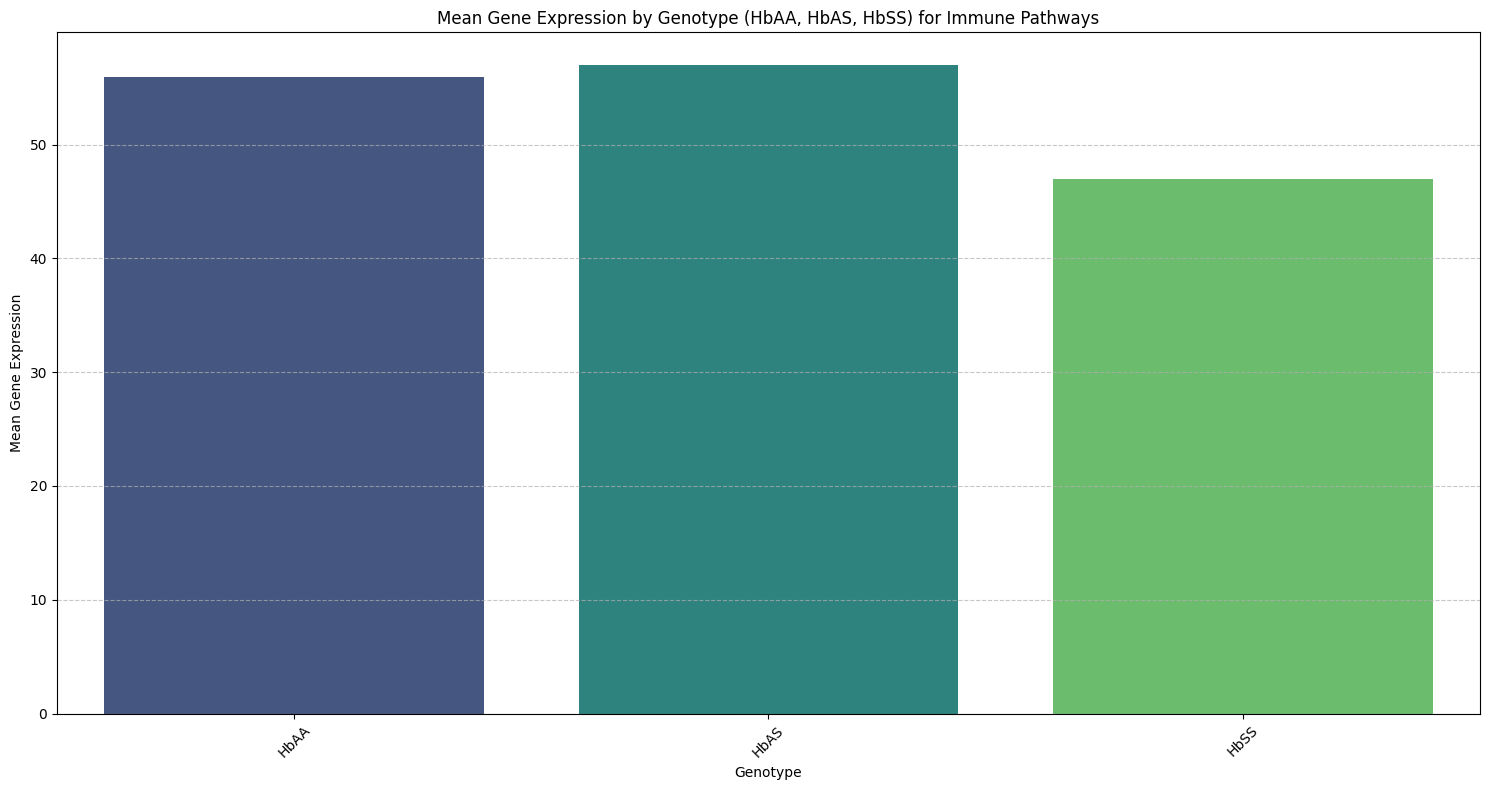

In [237]:
# --- Use existing DataFrames directly, avoiding re-reconstruction ---
# Assuming combined_df_final and metadata are correctly populated from previous cells.
# This cell will now directly use the `combined_df_final` and `metadata` objects
# that should already be in memory from preceding successful cell executions.

# Ensure 'hallmark' dictionary is available
# (It should be from earlier cell execution, but included here for robustness)
# Using `gp.get_library` to ensure it's available
hallmark = gp.get_library(
    name="MSigDB_Hallmark_2020",
    organism="Human"
)

# Extract genotype info for each sample using the already cleaned 'metadata' DataFrame
sample_genotypes = metadata['genotype']

# Define target pathways
target_pathways = [
    'Inflammatory Response',
    'Interferon Alpha Response',
    'Interferon Gamma Response',
    'TNF-alpha Signaling via NF-kB',
    'IL-6/JAK/STAT3 Signaling',
    'IL2-STAT5 Signaling'
]

# Filter for gene rows and where 'Pathway_Label' contains any of the target pathways
# Ensure all columns (including sample data) are kept
filtered_genes_df = combined_df_final.loc[
    (combined_df_final.index != 'title') &
    (combined_df_final.index != 'sex') &
    (combined_df_final.index != 'genotype') &
    (combined_df_final['Pathway_Label'].fillna('').astype(str).str.contains('|'.join(target_pathways)))
].copy()

# Extract 'title', 'sex' and 'genotype' rows from the combined_df_final
title_row = combined_df_final.loc[['title']]
sex_row = combined_df_final.loc[['sex']]
genotype_row = combined_df_final.loc[['genotype']]

# Concatenate the metadata rows and the filtered gene rows
pathway_filtered_df = pd.concat([title_row, sex_row, genotype_row, filtered_genes_df], axis=0)

# Get the sample IDs that are columns in pathway_filtered_df (excluding 'Pathway_Label')
data_columns = [col for col in pathway_filtered_df.columns if col != 'Pathway_Label']

# Filter sample_genotypes to only include samples present in pathway_filtered_df's data columns
relevant_genotypes = sample_genotypes.loc[data_columns]

# Prepare data for plotting
# Identify gene rows (excluding all metadata rows)
gene_expression_df = pathway_filtered_df.loc[
    ~pathway_filtered_df.index.isin(['title', 'sex', 'genotype'])
]

# Drop the 'Pathway_Label' column from the gene expression data before transposing
gene_expression_df_numerical = gene_expression_df.drop(columns=['Pathway_Label'])

# Transpose the numerical gene expression data
gene_expression_transposed = gene_expression_df_numerical.T
gene_expression_transposed.columns.name = 'Gene' # Name the columns index

# Add the genotype to the transposed dataframe
gene_expression_transposed['genotype'] = relevant_genotypes

# Melt the DataFrame for plotting
melted_df_for_boxplot_genotype = gene_expression_transposed.melt(
    id_vars=['genotype'],
    var_name='Gene',
    value_name='Expression'
)

# Convert expression to numeric, coercing errors
melted_df_for_boxplot_genotype['Expression'] = pd.to_numeric(melted_df_for_boxplot_genotype['Expression'], errors='coerce')

# Drop NaN expression values that might result from coercion
melted_df_for_boxplot_genotype = melted_df_for_boxplot_genotype.dropna(subset=['Expression'])

# Calculate mean expression for each genotype for the bar plot
mean_expression_by_genotype = melted_df_for_boxplot_genotype.groupby('genotype')['Expression'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='genotype', y='Expression', hue='genotype', data=mean_expression_by_genotype, palette='viridis', legend=False)
plt.title('Mean Gene Expression by Genotype (HbAA, HbAS, HbSS) for Immune Pathways')
plt.xlabel('Genotype')
plt.ylabel('Mean Gene Expression')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'mean_gene_expression_by_genotype_immune_pathways_barplot.png'))
plt.show()

In [238]:
# Install statannotations for adding statistical significance to plots
!pip install -q statannotations

print("statannotations installed successfully!")

statannotations installed successfully!


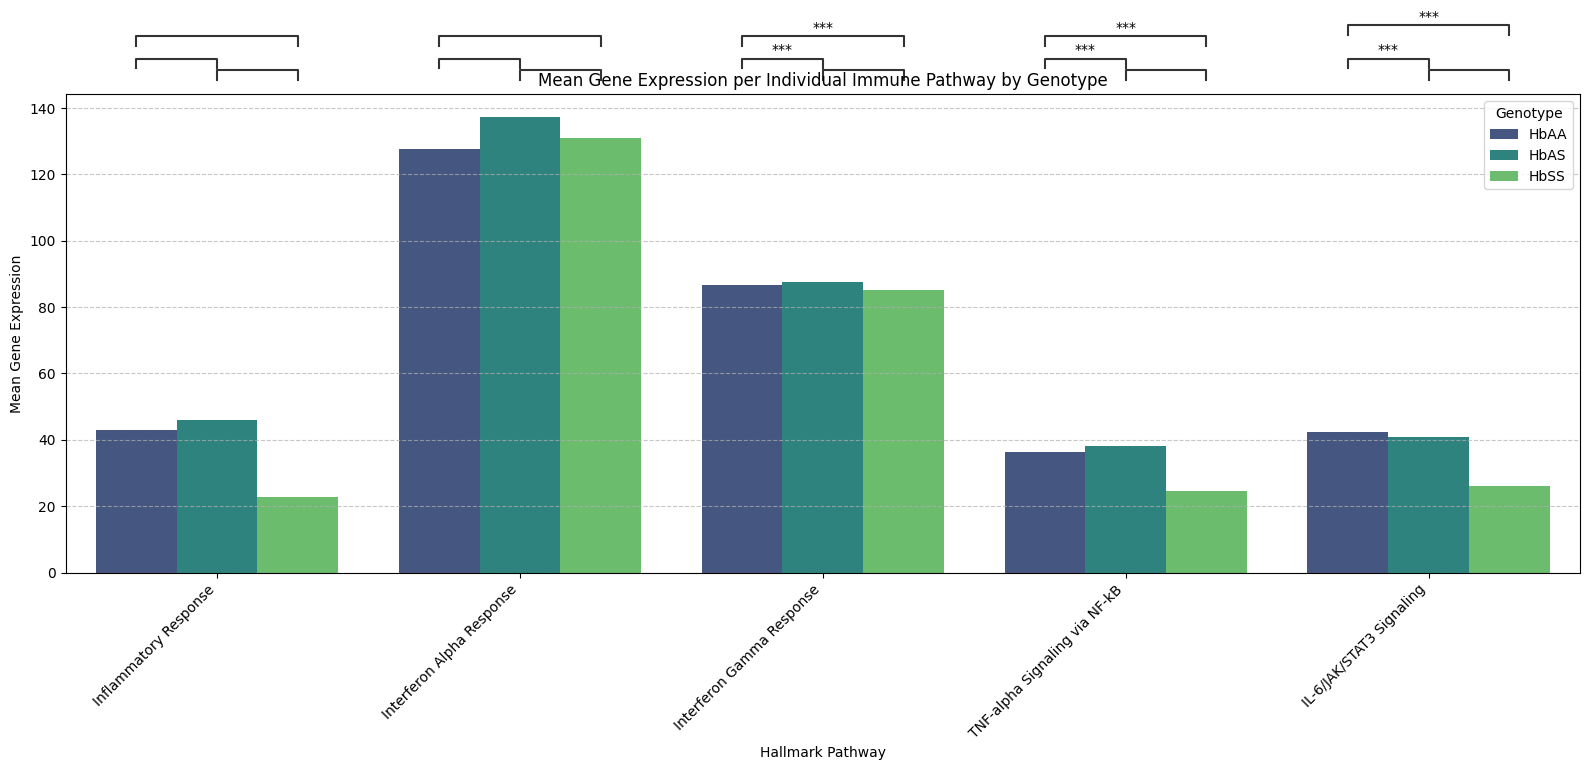

In [239]:
# 1. Create a gene to Pathway_Label mapping from filtered_genes_df
gene_pathway_map = filtered_genes_df['Pathway_Label'].to_dict()

# 2. Add 'Pathway_Label' column to the melted DataFrame
melted_df_with_pathways = melted_df_for_boxplot_genotype.copy()
melted_df_with_pathways['Pathway_Label'] = melted_df_with_pathways['Gene'].map(gene_pathway_map)

# 3. Handle genes that might not have a Pathway_Label (e.g., if filtered_genes_df was incomplete)
melted_df_with_pathways = melted_df_with_pathways.dropna(subset=['Pathway_Label']).copy()

# 4. Split the comma-separated pathways and explode the DataFrame
melted_df_with_pathways['Pathway'] = melted_df_with_pathways['Pathway_Label'].str.split(',')
df_exploded = melted_df_with_pathways.explode('Pathway')

# 5. Clean up any whitespace around pathway names
df_exploded['Pathway'] = df_exploded['Pathway'].str.strip()

# 6. Filter to only include the target pathways (redundant but good for robustness)
df_exploded = df_exploded[df_exploded['Pathway'].isin(target_pathways)].copy()

from statannotations.Annotator import Annotator
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests # Import multipletests
import numpy as np
import pandas as pd

# Dynamically get pathways present in the data
actual_pathways_in_data = df_exploded['Pathway'].unique().tolist()

# Filter target_pathways to only include those actually present in df_exploded
present_target_pathways = [p for p in target_pathways if p in actual_pathways_in_data]

# Calculate the mean expression for each Pathway and genotype
mean_expression_per_pathway = df_exploded.groupby(['Pathway', 'genotype'])['Expression'].mean().reset_index()

# Ensure the pathways are in a consistent order for plotting
mean_expression_per_pathway['Pathway'] = pd.Categorical(
    mean_expression_per_pathway['Pathway'],
    categories=present_target_pathways, # Use filtered pathways here
    ordered=True
)
mean_expression_per_pathway = mean_expression_per_pathway.sort_values('Pathway')

plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='Pathway',
    y='Expression',
    hue='genotype',
    data=mean_expression_per_pathway,
    palette='viridis'
)

# Define the pairs for statistical comparison based on present pathways
comparisons = []
for pathway in present_target_pathways: # Use filtered pathways here
    comparisons.append(((pathway, 'HbAA'), (pathway, 'HbAS')))
    comparisons.append(((pathway, 'HbAA'), (pathway, 'HbSS')))
    comparisons.append(((pathway, 'HbAS'), (pathway, 'HbSS')))

# Prepare data for Annotator: it needs the full, unaggregated data to run statistical tests
# We need the 'df_exploded' (or similar) with individual expression values

# Manually perform t-tests and store p-values for annotation
pvalues = []
for pair in comparisons:
    # Extract pathway and genotypes for current comparison
    pathway = pair[0][0]
    genotype1 = pair[0][1]
    genotype2 = pair[1][1]

    # Filter data for the current pathway and genotypes
    data1 = df_exploded[(df_exploded['Pathway'] == pathway) & (df_exploded['genotype'] == genotype1)]['Expression'].dropna()
    data2 = df_exploded[(df_exploded['Pathway'] == pathway) & (df_exploded['genotype'] == genotype2)]['Expression'].dropna()

    if len(data1) >= 2 and len(data2) >= 2:
        # Perform t-test
        stat, p = ttest_ind(data1, data2, equal_var=False, nan_policy='omit')
        pvalues.append(p)
    else:
        pvalues.append(np.nan) # Cannot perform test if not enough data

# Adjust p-values for multiple comparisons (across all tests performed)
# Filter out NaN p-values before adjustment
valid_p_indices = ~pd.Series(pvalues).isna()
if valid_p_indices.any():
    reject, p_adjusted, _, _ = multipletests(np.array(pvalues)[valid_p_indices], method='fdr_bh')
    # Map adjusted p-values back to the original comparisons list
    adjusted_p_values = pd.Series(np.nan, index=range(len(pvalues)))
    adjusted_p_values.loc[valid_p_indices] = p_adjusted
else:
    adjusted_p_values = pd.Series(np.nan, index=range(len(pvalues)))

# Annotate the plot with significance markers
# The Annotator needs a list of (group1, group2) for x-axis categories
# and then the p-values.

# Add significance annotations
annotator = Annotator(ax,
                      comparisons,
                      data=df_exploded,
                      x='Pathway',
                      y='Expression',
                      hue='genotype',
                      hide_annotation_box=True
                     )

annotator.configure(test=None, text_format='star', loc='outside', verbose=0, pvalue_thresholds=[[0.05, '*'], [0.01, '**'], [0.001, '***']])
annotator.set_pvalues(adjusted_p_values.tolist())
annotator.annotate()

ax.set_title('Mean Gene Expression per Individual Immune Pathway by Genotype')
ax.set_xlabel('Hallmark Pathway')
ax.set_ylabel('Mean Gene Expression')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Genotype')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'mean_gene_expression_per_pathway_genotype_annotated_barplot.png'))
plt.show()

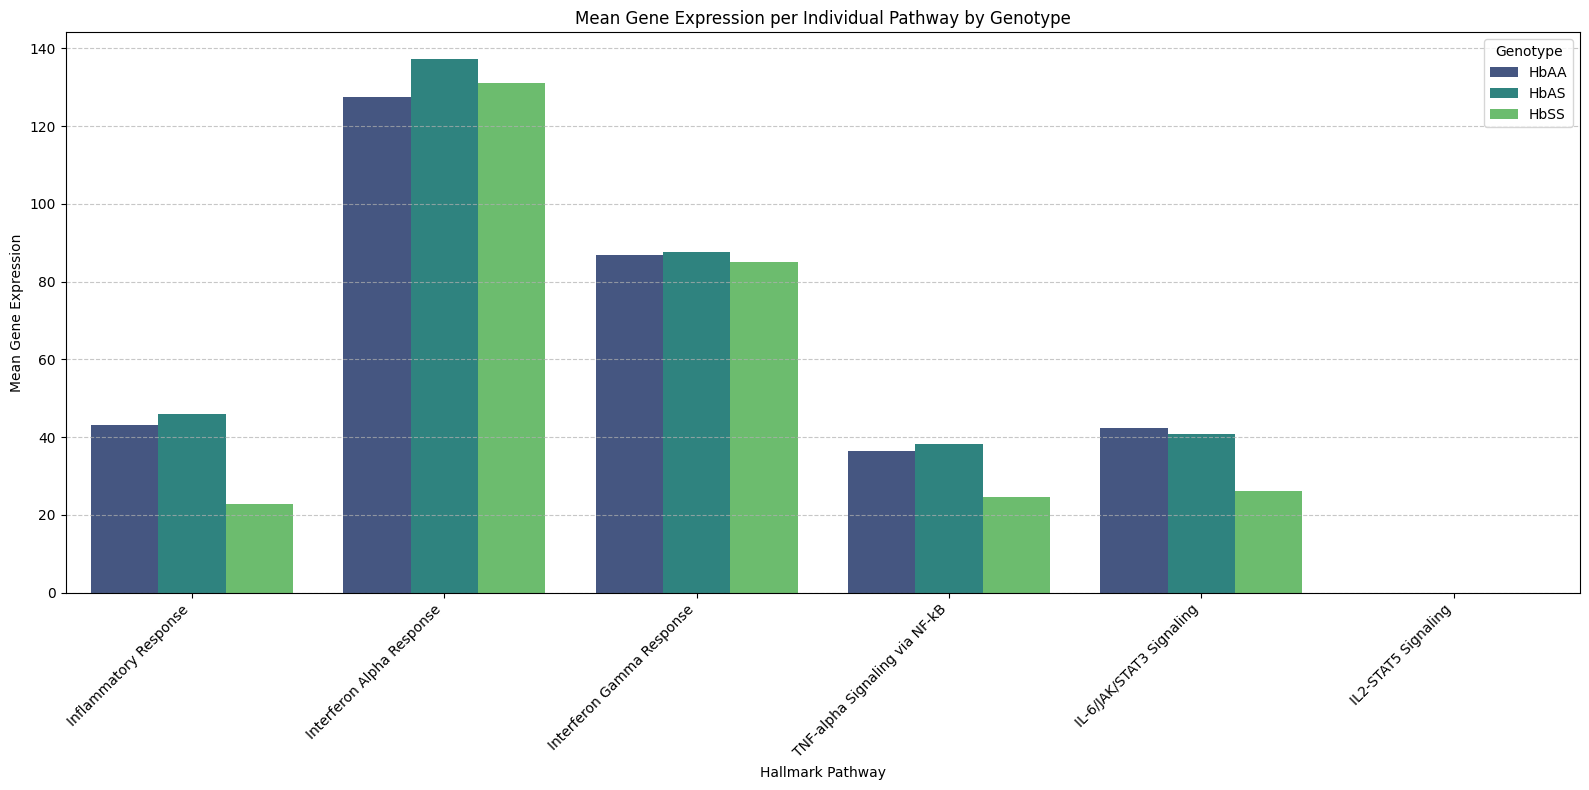

In [240]:
# Calculate the mean expression for each Pathway and genotype
mean_expression_per_pathway = df_exploded.groupby(['Pathway', 'genotype'])['Expression'].mean().reset_index()

# Ensure the pathways are in a consistent order for plotting
mean_expression_per_pathway['Pathway'] = pd.Categorical(
    mean_expression_per_pathway['Pathway'],
    categories=target_pathways,
    ordered=True
)
mean_expression_per_pathway = mean_expression_per_pathway.sort_values('Pathway')

# Create the bar plot
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Pathway',
    y='Expression',
    hue='genotype',
    data=mean_expression_per_pathway,
    palette='viridis' # Using a colorblind-friendly colormap
)
plt.title('Mean Gene Expression per Individual Pathway by Genotype')
plt.xlabel('Hallmark Pathway')
plt.ylabel('Mean Gene Expression')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Genotype')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'mean_gene_expression_per_pathway_genotype_barplot.png'))
plt.show()

### Mean Gene Expression per Individual Pathway by Genotype Bar Plot

This bar plot visualizes the **mean gene expression levels for each of the individual Hallmark pathways** across the three genotypes (HbAA, HbAS, HbSS). Unlike the previous bar plot which showed a combined mean for all selected pathways, this graph breaks down the mean expression for each pathway separately. Each group of bars represents a specific pathway, and within each group, the bars are colored by genotype.

**Key Observations**:
*   **Pathway-Specific Comparisons**: This plot allows for direct comparison of how each individual pathway's mean expression differs between the HbAA, HbAS, and HbSS genotypes.
*   **Genotype Trends per Pathway**: You can observe if certain pathways are consistently higher or lower in one genotype. For example, some pathways might show a clear decrease in expression in HbSS compared to HbAA, while others might be more similar across all genotypes.
*   **Relative Pathway Activity**: It provides insight into the relative 'activation' or expression level of each specific pathway, and how that activity profile changes with genotype.

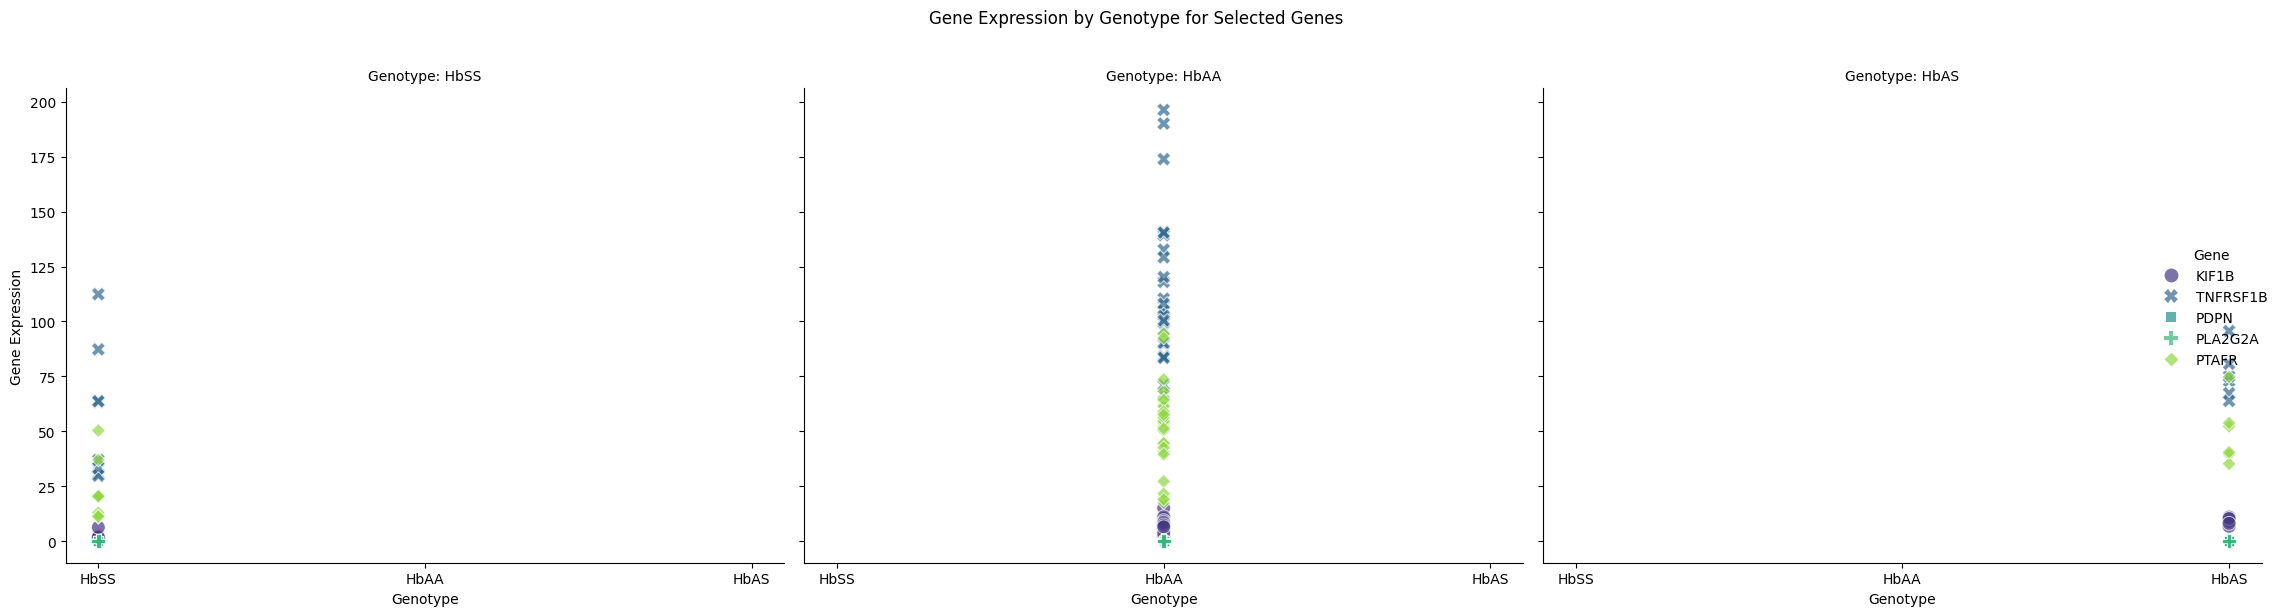

In [241]:
# Select a few representative genes for the scatter plot
# We'll pick the first 5 genes from the filtered list (adjust as needed)
example_genes_for_scatter = filtered_genes_df.index[3:8].tolist()

# Filter the melted DataFrame to include only these selected genes
scatter_df = melted_df_for_boxplot_genotype[
    melted_df_for_boxplot_genotype['Gene'].isin(example_genes_for_scatter)
].copy()

# Create the faceted scatter plot
g = sns.relplot(
    data=scatter_df,
    x='genotype', # We can use genotype on x-axis, and relplot will add jitter for samples
    y='Expression',
    hue='Gene',    # Color by Gene
    style='Gene',  # Shape by Gene
    col='genotype', # Create separate columns for each genotype
    kind='scatter',
    s=100,         # Size of points
    alpha=0.7,     # Transparency
    palette='viridis', # Color palette for hue
    height=6, aspect=1.2 # Adjust plot size
)

g.set_axis_labels("Genotype", "Gene Expression")
g.set_titles("Genotype: {col_name}")
plt.suptitle('Gene Expression by Genotype for Selected Genes', y=1.02) # Add a super title
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'gene_expression_selected_genes_genotype_scatterplot.png'))
plt.show()

In [242]:
# 1. Create a gene to Pathway_Label mapping from filtered_genes_df
gene_pathway_map = filtered_genes_df['Pathway_Label'].to_dict()

# 2. Add 'Pathway_Label' column to the melted DataFrame
melted_df_with_pathways = melted_df_for_boxplot_genotype.copy()
melted_df_with_pathways['Pathway_Label'] = melted_df_with_pathways['Gene'].map(gene_pathway_map)

# 3. Handle genes that might not have a Pathway_Label (e.g., if filtered_genes_df was incomplete)
melted_df_with_pathways = melted_df_with_pathways.dropna(subset=['Pathway_Label']).copy()

# 4. Split the comma-separated pathways and explode the DataFrame
melted_df_with_pathways['Pathway'] = melted_df_with_pathways['Pathway_Label'].str.split(',')
df_exploded = melted_df_with_pathways.explode('Pathway')

# 5. Clean up any whitespace around pathway names
df_exploded['Pathway'] = df_exploded['Pathway'].str.strip()

# 6. Filter to only include the target pathways (redundant but good for robustness)
df_exploded = df_exploded[df_exploded['Pathway'].isin(target_pathways)].copy()

# 7. Calculate the mean expression for each Pathway and genotype
heatmap_data = df_exploded.groupby(['Pathway', 'genotype'])['Expression'].mean().unstack()

# Ensure the pathways are in a consistent order for plotting
heatmap_data = heatmap_data.reindex(target_pathways, axis=0).dropna(how='all')

print("Mean expression per pathway per genotype for heatmap:")
display(heatmap_data)

Mean expression per pathway per genotype for heatmap:


genotype,HbAA,HbAS,HbSS
Pathway,,,
Inflammatory Response,43.004370,45.992727,22.734170
Interferon Alpha Response,127.524728,137.243716,131.037915
Interferon Gamma Response,86.768686,87.578181,85.148447
TNF-alpha Signaling via NF-kB,36.364863,38.177311,24.606758
IL-6/JAK/STAT3 Signaling,42.280334,40.887961,26.197870


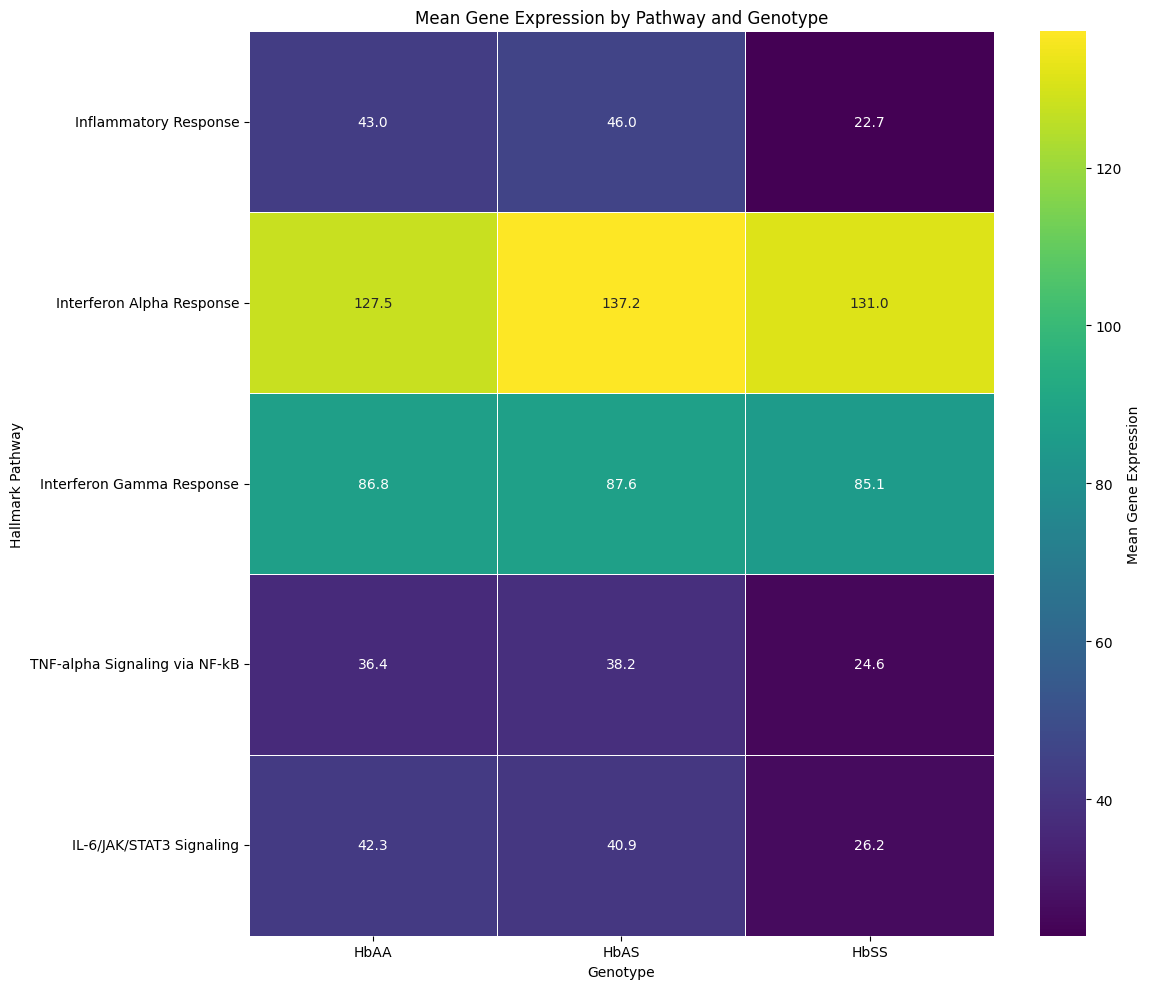

In [243]:
# 8. Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap='viridis', # Changed to a colorblind-friendly colormap
    annot=True,     # Show the values on the heatmap
    fmt=".1f",      # Format annotation to one decimal place
    linewidths=.5,  # Add lines between cells
    cbar_kws={'label': 'Mean Gene Expression'}
)
plt.title('Mean Gene Expression by Pathway and Genotype')
plt.xlabel('Genotype')
plt.ylabel('Hallmark Pathway')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'mean_gene_expression_pathway_genotype_heatmap.png'))
plt.show()

In [244]:
from sklearn.preprocessing import StandardScaler

# 1. Extract numerical gene expression data
# Exclude 'title', 'sex', 'genotype' rows and 'Pathway_Label' column
gene_expression_all = combined_df_final.loc[
    ~combined_df_final.index.isin(['title', 'sex', 'genotype']) # Select gene rows
].drop(columns=['Pathway_Label']).copy() # Drop Pathway_Label column

# Convert all values to numeric, coercing errors to NaN
gene_expression_all = gene_expression_all.apply(pd.to_numeric, errors='coerce')

# Drop any rows (genes) or columns (samples) that are now entirely NaN
gene_expression_all = gene_expression_all.dropna(axis=0, how='all')
gene_expression_all = gene_expression_all.dropna(axis=1, how='all')

# Transpose the DataFrame: genes as rows, samples as columns (standard for heatmap)
gene_expression_all = gene_expression_all.T

# Get sample genotypes for annotation
sample_genotypes_heatmap = metadata.loc[gene_expression_all.index, 'genotype']

# Perform Z-score standardization on the gene expression data
# This scales data to have mean 0 and standard deviation 1, which is good for heatmaps
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_expression_all)
scaled_gene_expression_df = pd.DataFrame(
    scaled_data,
    index=gene_expression_all.index,
    columns=gene_expression_all.columns
)

# Display the shape of the scaled data
print(f"Shape of scaled gene expression data: {scaled_gene_expression_df.shape}")

# For visualization, let's select a subset of genes for the heatmap
# (e.g., the first 50 genes) to keep it readable.
# Plotting all ~10,000+ genes at once will be too dense.
# If you want to visualize all, we might need a different approach (e.g., interactive plots or clustering).
subset_genes_for_heatmap = scaled_gene_expression_df.iloc[:, :50]

print("First 5 rows of scaled gene expression data (subset for heatmap):")
display(subset_genes_for_heatmap.head())

Shape of scaled gene expression data: (41, 39376)
First 5 rows of scaled gene expression data (subset for heatmap):


,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC100996442,LOC729737,DDX11L17,...,ISG15,AGRN,LOC100288175,LOC112267874,LOC105378948,RNF223,C1orf159,LINC01342,MIR200B,MIR200A
GSM8072033,-0.543723,-0.385303,0.424568,-0.553479,-0.232051,1.134167,-0.465232,-1.123953,-0.878545,0.072352,...,5.994371,5.037227,-0.437640,-0.152249,-0.918552,-0.533603,-0.751755,-0.992344,-0.217431,-0.257518
GSM8072034,-0.366170,0.731635,-0.176227,0.849572,1.169102,0.695735,0.364902,-0.212308,-0.358699,-0.547263,...,-0.325401,-0.162159,1.267391,0.344805,1.051548,2.851973,1.573330,0.748167,-0.217431,-0.257518
GSM8072036,-0.253655,1.039143,0.697864,-0.553479,0.747201,-0.316011,-0.465232,1.562414,3.052736,-0.176362,...,-0.331936,0.057823,0.132549,0.589853,1.315275,-0.533603,0.691190,-0.204195,-0.217431,-0.257518
GSM8072037,0.297213,0.722755,-0.092872,-0.553479,-0.232051,0.157109,-0.465232,0.757216,-0.349727,-0.025855,...,-0.315916,-0.506282,2.233391,0.176975,0.597091,-0.533603,-0.381492,0.538099,-0.217431,-0.257518
GSM8072038,-0.764916,0.517127,-0.016804,-0.553479,-0.232051,0.200178,-0.465232,-1.121214,-0.745722,-0.531048,...,-0.315802,-0.527601,0.739643,0.482199,-0.026120,-0.533603,1.380435,-0.418105,-0.217431,-0.257518


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


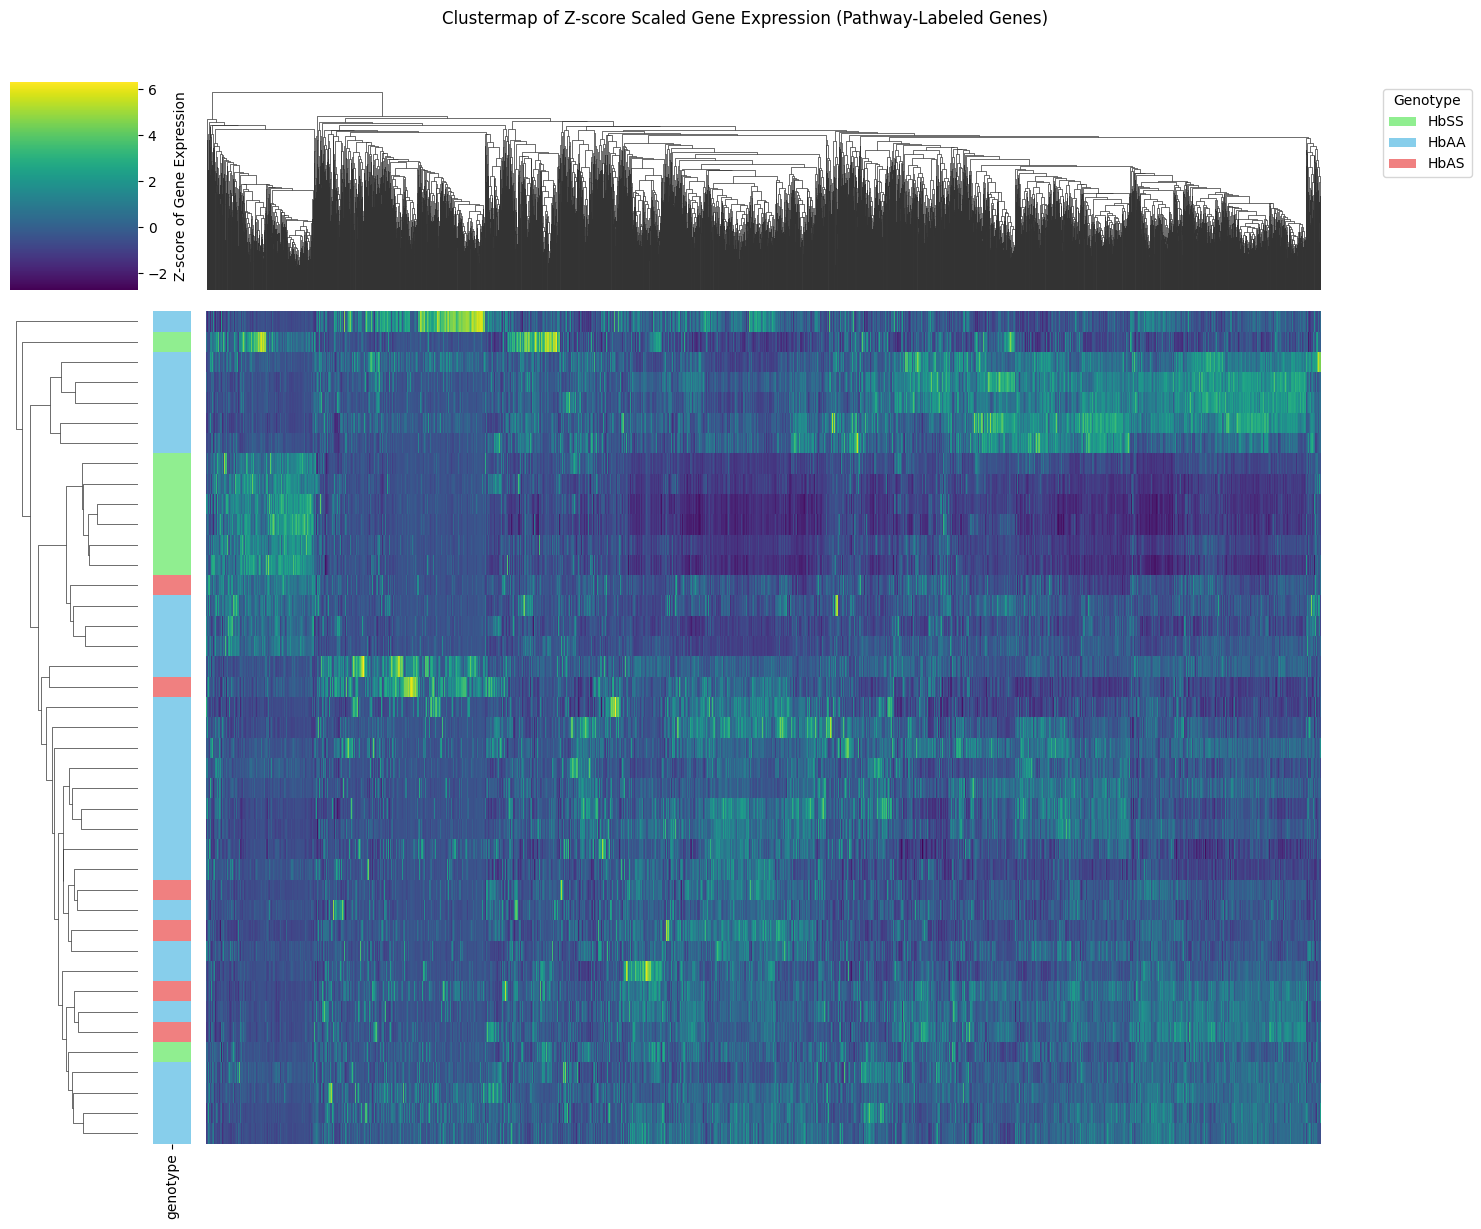

In [247]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colorblind-friendly colormap for genotype annotations
genotype_colors = {
    'HbAA': 'skyblue',
    'HbAS': 'lightcoral',
    'HbSS': 'lightgreen'
}

row_colors = sample_genotypes_heatmap.map(genotype_colors)

# Create the heatmap using seaborn.clustermap for better visualization
# clustermap automatically performs hierarchical clustering on rows and columns
# Using scaled_gene_expression_for_pca_df which contains only pathway-labeled genes.
# This DataFrame has samples as rows and genes as columns, suitable for clustermap.
g = sns.clustermap(
    scaled_gene_expression_for_pca_df, # Use the scaled pathway-labeled gene expression data
    cmap='viridis', # Colorblind-friendly colormap
    standard_scale=None, # Already scaled with StandardScaler
    row_colors=row_colors, # Annotate rows (samples) by genotype
    figsize=(15, 12), # Adjust figure size for this dataset (fewer genes than full data)
    cbar_kws={'label': 'Z-score of Gene Expression'},
    dendrogram_ratio=(.1, .2), # Adjust dendrogram size
    yticklabels=False, # Hide sample labels if too many
    xticklabels=False # Hide gene labels as there might still be many for readability
)

g.fig.suptitle('Clustermap of Z-score Scaled Gene Expression (Pathway-Labeled Genes)', y=1.02)
# If you want to see gene labels for a smaller subset, change xticklabels=True
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

# Add a custom legend for row_colors (genotypes)
for label in sample_genotypes_heatmap.unique():
    g.ax_col_dendrogram.bar(0, 0, color=genotype_colors[label], label=label, linewidth=0)
# Move the legend outside the plot area or to an empty space
g.ax_col_dendrogram.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'clustermap_pathway_labeled_genes.png'))
plt.show()

/tmp/ipython-input-3770677150.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
/tmp/ipython-input-3770677150.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()


Shape of SMA gene expression data: (39376, 20)
Shape of nonSMA gene expression data: (39376, 21)
Number of significant genes identified: 1003
Shape of scaled gene expression data for significant genes: (41, 1003)
First 5 rows of scaled significant gene expression data:


,GPR65,MITD1,KCNJ2,CASP1,GBP2,CARD16,TRC-GCA4-1,HGD,TIFA,LOC100996318,...,ESRG,CD300LD,LOC105377784,TTC14-DT,FECH,CA3-AS1,LOC105375271,LINC02964,NEURL3,CPEB4
GSM8072033,-1.170781,-0.965610,-1.343525,0.165847,-1.132065,-0.016646,-0.932538,-1.116690,-0.928187,-0.792551,...,1.615257,-0.798268,-0.895169,-0.630748,0.151776,3.785027,-0.173204,-0.668907,0.202556,2.568555
GSM8072034,-0.457553,-0.270789,-0.949949,-0.728291,-0.983345,-0.679805,-1.175983,-0.259938,-0.983635,-0.974971,...,-0.526246,-0.710577,0.464639,-0.288773,-0.382863,-0.314418,-0.384878,-0.113951,-0.814364,-0.409486
GSM8072036,-0.508530,-0.883449,-0.055635,-0.772712,-0.592346,-0.809668,-0.838511,-0.298530,-0.877590,-0.444838,...,-0.458281,0.337069,-0.895169,0.098971,-0.559866,-0.750199,0.166106,-0.182037,-0.147440,-0.317963
GSM8072037,0.443401,-0.738601,-0.272181,-0.491232,-0.369265,-0.616298,-0.567712,-0.945020,-0.641109,0.558468,...,1.405783,-0.031330,-0.090943,-0.903730,0.180750,3.236751,-0.268243,-0.521719,-0.814364,0.553871
GSM8072038,-0.010955,0.107357,-0.496577,-0.110795,0.598939,-0.406644,-0.170917,-1.371214,0.523101,-0.521901,...,-0.531352,0.376027,-0.470784,0.055782,-0.574643,-0.744716,0.569488,-0.488928,-0.099612,-0.783072


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


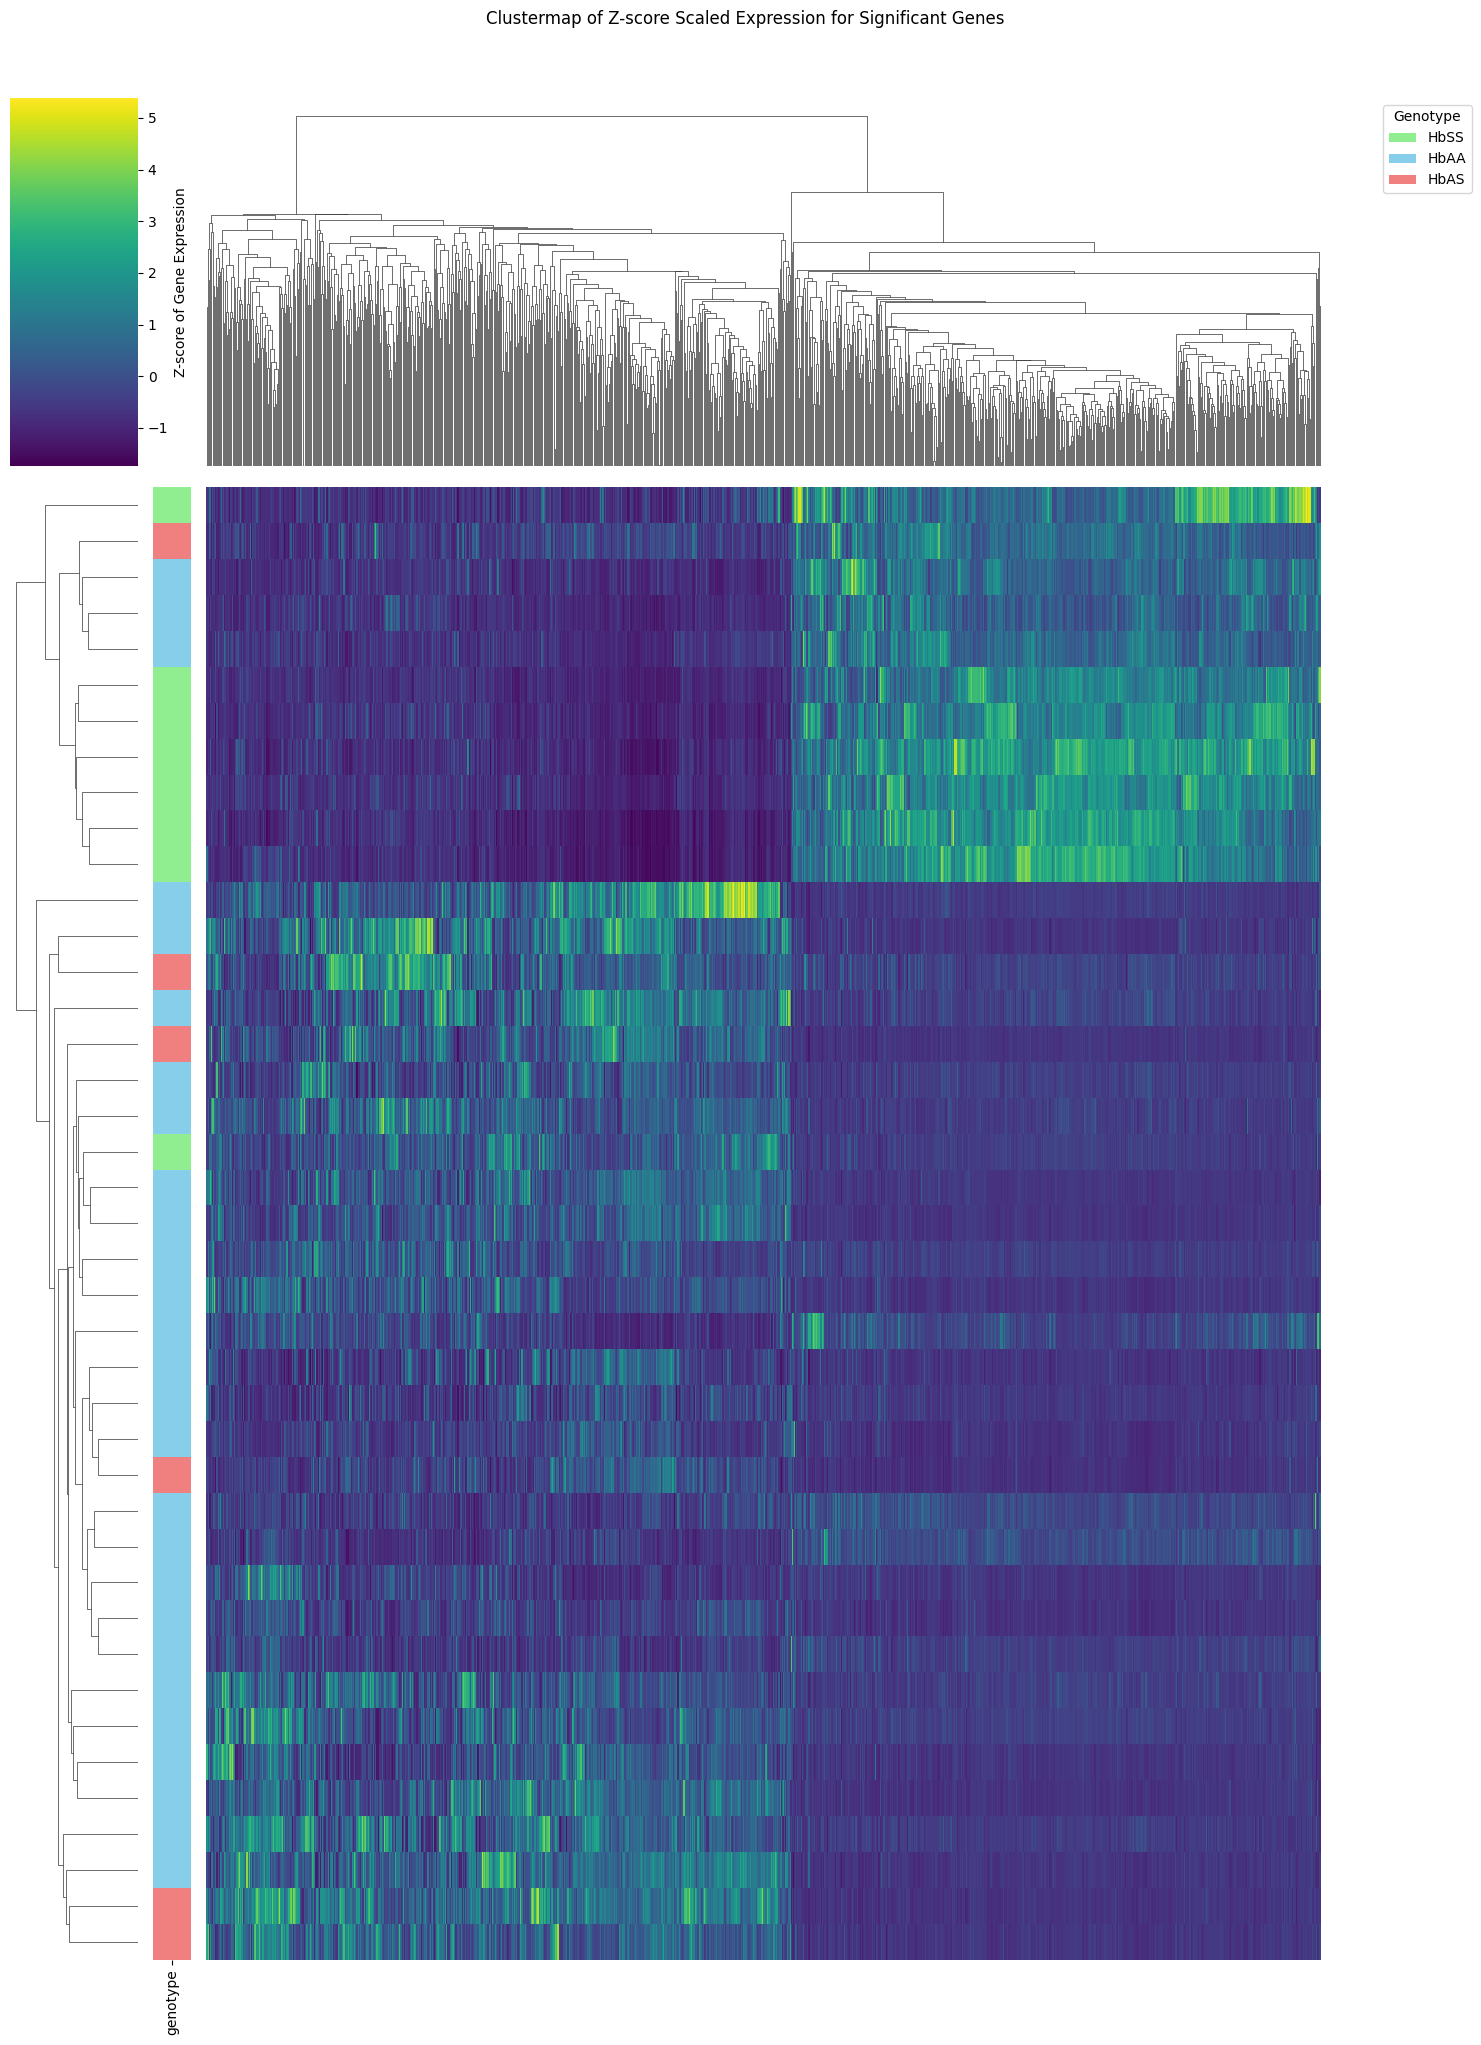

In [248]:
# --- Start of code to prepare sma_gene_expression and non_sma_gene_expression ---
# This section is copied from earlier cells (e02998c2 and 553353e0) to ensure dependencies are met.

gene_expression_data = combined_df_final.iloc[3:].copy()
sample_titles = combined_df_final.loc['title']

# Identify SMA and nonSMA samples based on the 'title' row
# Ensure the boolean mask does not contain NaN values
sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()

# Create two new DataFrames for SMA and nonSMA gene expression
# Ensure to drop the 'Pathway_Label' column as it's not gene expression data
sma_gene_expression = gene_expression_data[sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()
non_sma_gene_expression = gene_expression_data[non_sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()

# Convert all values to numeric, coercing errors to NaN
sma_gene_expression = sma_gene_expression.apply(pd.to_numeric, errors='coerce')
non_sma_gene_expression = non_sma_gene_expression.apply(pd.to_numeric, errors='coerce')

# Remove any rows (genes) that contain NaN values after conversion
sma_gene_expression = sma_gene_expression.dropna(axis=0)
non_sma_gene_expression = non_sma_gene_expression.dropna(axis=0)

print(f"Shape of SMA gene expression data: {sma_gene_expression.shape}")
print(f"Shape of nonSMA gene expression data: {non_sma_gene_expression.shape}")
# --- End of data preparation code ---


# --- Start of code to recreate de_results (from cell 743df36b) ---
# Initialize empty lists to store results
gene_names = []
p_values = []
log2fc_values = []

# Get common genes between SMA and nonSMA dataframes
# These dataframes should already be cleaned of NaNs at the gene level (axis=0 dropna)
common_genes = sma_gene_expression.index.intersection(non_sma_gene_expression.index)

# Define a small pseudocount to avoid log2(0) or division by zero in log2FC calculation
pseudocount = 1e-6

# Iterate through each common gene
for gene in common_genes:
    # Extract expression values for SMA and nonSMA samples
    # These arrays should ideally not contain NaNs due to prior dropna(axis=0)
    sma_expr = sma_gene_expression.loc[gene].values
    non_sma_expr = non_sma_gene_expression.loc[gene].values

    # Initialize p_val and log2fc to NaN (for cases where test cannot be performed)
    p_val = np.nan
    log2fc = np.nan

    # Calculate means for log2FC
    mean_sma = np.mean(sma_expr)
    mean_non_sma = np.mean(non_sma_expr)

    # Calculate log2 fold change
    # Handle cases where means are zero or very close to zero using pseudocount
    numerator = mean_sma + pseudocount
    denominator = mean_non_sma + pseudocount

    if denominator > 0:
        log2fc = np.log2(numerator / denominator)
    # If denominator is 0, log2fc remains NaN, which is appropriate.
    # If both are 0, we can define it as 0.0, but current pseudocount handles it as well.
    if mean_sma == 0 and mean_non_sma == 0:
        log2fc = 0.0

    # Perform t-test only if there are enough samples and non-zero variance in both groups
    if len(sma_expr) >= 2 and len(non_sma_expr) >= 2:
        # Check for zero standard deviation to avoid t-test errors (especially for equal_var=False)
        # Use np.isclose for robust floating-point comparison with zero
        if np.isclose(np.std(sma_expr), 0) or np.isclose(np.std(non_sma_expr), 0):
            p_val = np.nan # Cannot perform t-test if variance is zero
        else:
            try:
                # Use equal_var=False (Welch's t-test) which is generally more robust
                t_stat, p_val = ttest_ind(sma_expr, non_sma_expr, equal_var=False)
            except ValueError:
                # Catch any remaining ValueError during t-test calculation
                p_val = np.nan

    p_values.append(p_val)
    log2fc_values.append(log2fc)
    gene_names.append(gene)

# Create a DataFrame for the differential expression results
de_results = pd.DataFrame({
    'Gene': gene_names,
    'log2FC': log2fc_values,
    'PValue': p_values
})

# Filter out rows where PValue is NaN before adjusting, as multipletests cannot handle NaNs
de_results_valid_p = de_results.dropna(subset=['PValue']).copy()

# Adjust p-values for multiple hypothesis testing using Benjamini-Hochberg correction
if not de_results_valid_p.empty:
    reject, p_adjusted, _, _ = multipletests(de_results_valid_p['PValue'], method='fdr_bh')
    de_results_valid_p['Adjusted_PValue'] = p_adjusted
else:
    de_results_valid_p['Adjusted_PValue'] = np.nan # Assign NaN if no valid p-values to adjust

# Merge adjusted p-values back into the original de_results DataFrame
de_results = pd.merge(de_results, de_results_valid_p[['Gene', 'Adjusted_PValue']], on='Gene', how='left')

# Sort results by adjusted p-value (lowest first) and then by absolute log2FC
de_results = de_results.sort_values(by=['Adjusted_PValue', 'log2FC'], ascending=[True, False])
# --- End of code to recreate de_results ---

# --- Start of code to define de_results_plot ---
# 1. Define thresholds for significance and fold change
adjusted_p_value_threshold = 0.05
log2fc_threshold = 1.0

# Create a copy to avoid SettingWithCopyWarning
de_results_plot = de_results.copy()

# 2. Create a new column 'Significance' to categorize genes
de_results_plot['Significance'] = 'Not Significant'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] > log2fc_threshold),
    'Significance'
] = 'Significant Up'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] < -log2fc_threshold),
    'Significance'
] = 'Significant Down'

# 3. Create a new column for -log10(Adjusted_PValue), handling potential infinite values
de_results_plot['-log10_Adjusted_PValue'] = -np.log10(de_results_plot['Adjusted_PValue'])

# Replace infinite values (which can occur if PValue was 0) with a reasonable maximum
# For example, use the max finite value + a small increment, or a predefined large number
max_finite_nlog10 = de_results_plot.loc[np.isfinite(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'].max()
if np.isfinite(max_finite_nlog10):
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = max_finite_nlog10 + 1
else: # Handle case where all values might be inf or NaN
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = 300 # Arbitrary large value
# --- End of code to define de_results_plot ---


# 1. Identify significant genes from the differential expression results
significant_genes = de_results_plot[
    (de_results_plot['Significance'] == 'Significant Up') |
    (de_results_plot['Significance'] == 'Significant Down')
]['Gene'].tolist()

print(f"Number of significant genes identified: {len(significant_genes)}")

# 2. Filter the scaled gene expression data to include only these significant genes
significant_genes_in_data = [g for g in significant_genes if g in scaled_gene_expression_df.columns]

# If no significant genes are found, inform the user.
if not significant_genes_in_data:
    print("No significant genes found based on the defined thresholds. Cannot generate heatmap.")
else:
    scaled_significant_gene_expression_df = scaled_gene_expression_df[significant_genes_in_data].copy()

    print(f"Shape of scaled gene expression data for significant genes: {scaled_significant_gene_expression_df.shape}")
    print("First 5 rows of scaled significant gene expression data:")
    display(scaled_significant_gene_expression_df.head())

    # 3. Generate the clustermap for significant genes

    # Define a custom colorblind-friendly colormap for genotype annotations (re-using if available)
    genotype_colors = {
        'HbAA': 'skyblue',
        'HbAS': 'lightcoral',
        'HbSS': 'lightgreen'
    }

    # Ensure row_colors are aligned with the samples in scaled_significant_gene_expression_df
    # sample_genotypes_heatmap should already be correctly indexed by sample ID
    row_colors_significant = sample_genotypes_heatmap.loc[scaled_significant_gene_expression_df.index].map(genotype_colors)

    g = sns.clustermap(
        scaled_significant_gene_expression_df,
        cmap='viridis', # Colorblind-friendly colormap
        standard_scale=None, # Data is already scaled
        row_colors=row_colors_significant, # Annotate rows (samples) by genotype
        figsize=(15, min(20, len(significant_genes_in_data) * 0.2 + 5)), # Dynamic height based on number of genes
        cbar_kws={'label': 'Z-score of Gene Expression'},
        dendrogram_ratio=(.1, .2),
        yticklabels=False, # Hide sample labels if too many
        xticklabels=True if len(significant_genes_in_data) < 50 else False # Show gene labels only if few enough
    )

    g.fig.suptitle('Clustermap of Z-score Scaled Expression for Significant Genes', y=1.02)

    # Rotate x-tick labels for better readability if they are shown
    if len(significant_genes_in_data) < 50:
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8)

    # Add a custom legend for row_colors (genotypes)
    for label in sample_genotypes_heatmap.unique():
        g.ax_col_dendrogram.bar(0, 0, color=genotype_colors[label], label=label, linewidth=0)
    g.ax_col_dendrogram.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'clustermap_significant_genes.png'))
    plt.show()

# Task
**Perform UMAP dimensionality reduction on the scaled gene expression data (`scaled_gene_expression_df`) to reduce it to two components. Then, create a scatter plot of these UMAP components, coloring the points by sample genotype (`sample_genotypes_heatmap`) using a colorblind-friendly palette to visualize sample clustering and separation. Finally, summarize the insights gained from the UMAP plot regarding sample clustering and genotype separation.**

## Prepare Data for UMAP

### Subtask:
Extract the scaled gene expression data (`scaled_gene_expression_df`) and ensure it's in the correct format for UMAP analysis. We will use the already scaled data from the heatmap step.


**Reasoning**:
The subtask is to prepare `scaled_gene_expression_df` for UMAP analysis. First, I need to display the shape and head of the DataFrame to verify its current format and data types, ensuring samples are rows and genes are columns with numerical values.



In [249]:
print(f"Shape of scaled_gene_expression_df: {scaled_gene_expression_df.shape}")
print("First 5 rows of scaled_gene_expression_df:")
display(scaled_gene_expression_df.head())

Shape of scaled_gene_expression_df: (41, 39376)
First 5 rows of scaled_gene_expression_df:


,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC100996442,LOC729737,DDX11L17,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
GSM8072033,-0.543723,-0.385303,0.424568,-0.553479,-0.232051,1.134167,-0.465232,-1.123953,-0.878545,0.072352,...,-2.722113,-0.946409,-1.404488,-1.582503,-2.145996,-2.078514,-1.967675,-2.868110,-0.997478,-2.007291
GSM8072034,-0.366170,0.731635,-0.176227,0.849572,1.169102,0.695735,0.364902,-0.212308,-0.358699,-0.547263,...,0.283872,0.018841,0.219303,-0.368175,1.011166,0.812542,0.835490,0.589703,4.851304,3.593333
GSM8072036,-0.253655,1.039143,0.697864,-0.553479,0.747201,-0.316011,-0.465232,1.562414,3.052736,-0.176362,...,1.539142,2.897102,2.585113,-0.038247,0.975444,0.812542,0.925659,1.540875,0.117887,0.431307
GSM8072037,0.297213,0.722755,-0.092872,-0.553479,-0.232051,0.157109,-0.465232,0.757216,-0.349727,-0.025855,...,0.932545,-0.005375,-0.595255,0.786574,1.972408,2.674343,2.382003,0.695782,-0.075747,-0.257294
GSM8072038,-0.764916,0.517127,-0.016804,-0.553479,-0.232051,0.200178,-0.465232,-1.121214,-0.745722,-0.531048,...,-0.038711,2.971766,1.815143,-0.705791,-0.520977,-0.349355,-0.137459,-0.285800,0.123397,-0.164293


## Perform UMAP Dimensionality Reduction

### Subtask:
Apply the UMAP algorithm to reduce the high-dimensional gene expression data into two components, which can then be plotted in a 2D scatter plot. We will set a random state for reproducibility.


**Reasoning**:
First, it is important to install the required library `umap-learn` before importing and using it, ensuring that the environment has all necessary dependencies.



In [250]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
!pip install -q umap-learn

print("umap-learn installed successfully!")

umap-learn installed successfully!


**Reasoning**:
Now that `umap-learn` is installed, import the `UMAP` class, instantiate it with the specified parameters, and apply it to the `scaled_gene_expression_df` to reduce the dimensionality to two components.



In [251]:
import umap

# Instantiate UMAP reducer with 2 components and a random state for reproducibility
reducer = umap.UMAP(n_components=2, random_state=42)

# Apply UMAP reduction to the scaled gene expression data
umap_components = reducer.fit_transform(scaled_gene_expression_df)

print(f"Shape of UMAP components: {umap_components.shape}")
print("First 5 rows of UMAP components:")
print(umap_components[:5])

Shape of UMAP components: (41, 2)
First 5 rows of UMAP components:
[[-1.6606305  1.4450867]
 [-0.6903383  4.7484856]
 [-0.6282295  3.4365134]
 [-1.6246419  2.034668 ]
 [-1.063359   4.6142383]]


**Reasoning**:
Now that UMAP dimensionality reduction has been performed, the next step is to visualize the results by creating a scatter plot of the UMAP components, coloring the points by sample genotype.



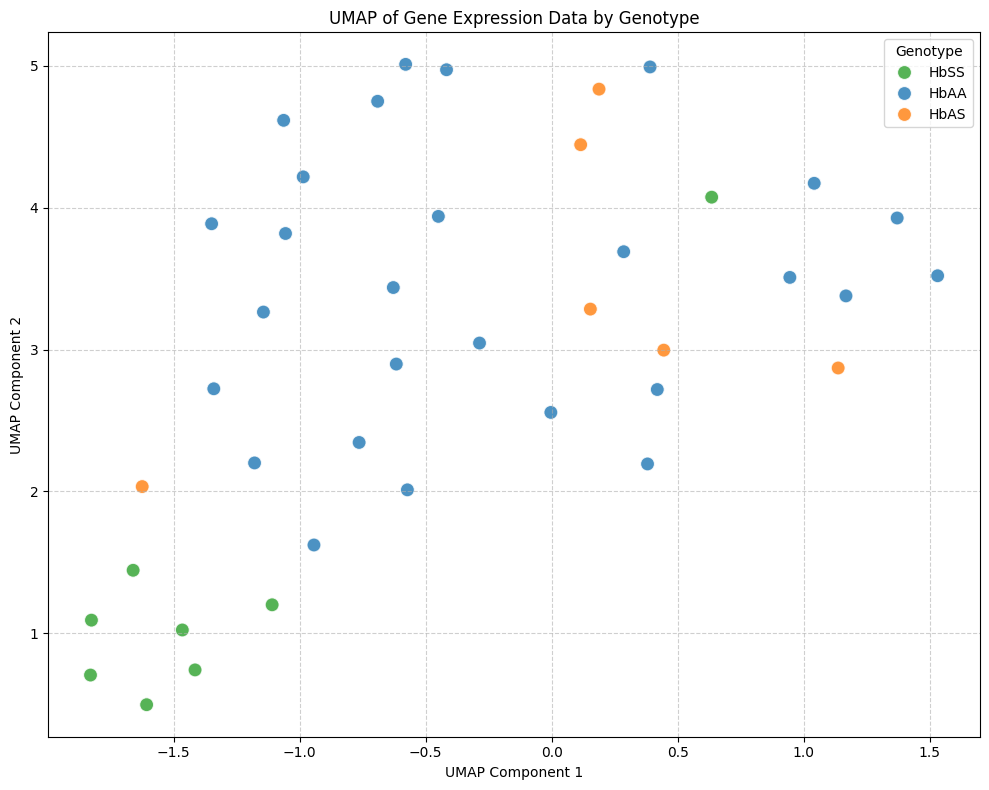

In [252]:

# Create a DataFrame for UMAP components and add genotype information
umap_df = pd.DataFrame(
    umap_components,
    columns=['UMAP1', 'UMAP2'],
    index=scaled_gene_expression_df.index # Use the same index as the scaled data
)

umap_df['genotype'] = sample_genotypes_heatmap.loc[umap_df.index] # Ensure genotypes match the samples in UMAP

# Define a colorblind-friendly palette for genotypes
genotype_palette = {
    'HbAA': '#1f77b4',  # Blue
    'HbAS': '#ff7f0e',  # Orange
    'HbSS': '#2ca02c'   # Green
}

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_df,
    x='UMAP1',
    y='UMAP2',
    hue='genotype',
    palette=genotype_palette,
    s=100, # Adjust point size
    alpha=0.8, # Adjust transparency
    edgecolor='w' # Add white edge for better visibility
)

plt.title('UMAP of Gene Expression Data by Genotype')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Genotype')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'umap_genotype_plot.png'))
plt.show()

### Summary of UMAP Plot Insights

The UMAP plot of gene expression data by genotype provides a visual representation of how different genotypes cluster in a lower-dimensional space. From the plot, we can observe the following:

1.  **Separation of Genotypes**: There appears to be a clear separation, or at least distinct grouping, between the 'HbSS' genotype samples and the 'HbAA' genotype samples. The 'HbSS' samples (green points) tend to form a cluster separate from the 'HbAA' samples (blue points), suggesting significant differences in their overall gene expression profiles.

2.  **Intermediate Positioning of HbAS**: The 'HbAS' samples (orange points) seem to occupy an intermediate space between the 'HbAA' and 'HbSS' clusters, or perhaps show more overlap with one or both. This might indicate that their gene expression profile is somewhat distinct but shares characteristics with both homozygous states, reflecting their heterozygous nature.

3.  **Intra-Genotype Cohesion**: Within each genotype group, particularly 'HbAA' and 'HbSS', the samples tend to cluster together, indicating that samples of the same genotype have more similar gene expression patterns compared to samples from different genotypes.

These observations suggest that genotype is a major factor driving the variation in gene expression in this dataset, and that UMAP effectively captures these biological differences by visually separating the sample groups.

## Final Task

### Subtask:
Summarize the insights gained from the UMAP plot regarding sample clustering and genotype separation.


## Summary:

### Q&A
The UMAP plot reveals distinct clustering and separation among genotypes. Specifically:
*   There is a clear separation between the 'HbSS' and 'HbAA' genotype samples, indicating significant differences in their gene expression profiles.
*   The 'HbAS' samples tend to occupy an intermediate space, suggesting their gene expression profile shares characteristics with both homozygous states.
*   Within each genotype group, particularly 'HbAA' and 'HbSS', samples cluster together, implying similar gene expression patterns within the same genotype.

### Data Analysis Key Findings
*   The `scaled_gene_expression_df` has a shape of (41, 39376), representing 41 samples and 39376 genes.
*   UMAP dimensionality reduction successfully transformed the gene expression data into two components, resulting in an array of shape (41, 2).
*   The UMAP visualization, colored by genotype, showed 'HbSS' and 'HbAA' genotypes forming distinct clusters, while 'HbAS' samples were positioned intermediately, suggesting a spectrum of gene expression profiles.

### Insights or Next Steps
*   Genotype is a strong driver of variation in gene expression, effectively separating sample groups in lower-dimensional space.
*   Further investigation into the specific genes contributing to the separation between genotypes could reveal molecular pathways associated with each genotype.


# Task
Prepare data for differential expression analysis by extracting numerical gene expression data from `combined_df_final`, separating SMA and nonSMA samples using the 'title' row, and ensuring all expression values are numeric.

## Prepare Data for Differential Expression Analysis

### Subtask:
Filter the combined_df_final to extract numerical gene expression data and the 'title' row. Then, identify SMA and nonSMA samples based on the 'title' row to create two distinct groups for comparison. Ensure all expression values are numeric.


**Reasoning**:
The first step is to extract the numerical gene expression data from `combined_df_final`, excluding the metadata rows ('title', 'sex', 'genotype'), and store it in a new DataFrame called `gene_expression_data`. Then, extract the 'title' row as a Series to prepare for sample identification.



In [253]:
gene_expression_data = combined_df_final.iloc[3:].copy()
sample_titles = combined_df_final.loc['title']

print("Gene expression data extracted (first 5 rows):")
display(gene_expression_data.head())
print("Sample titles extracted (first 5 entries):")
display(sample_titles.head())

Gene expression data extracted (first 5 rows):


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN
MIR1302-2HG,0.0,0.07164,0.0,0.0,0.0,0.0,0.05535,0.0,0.0,0.0,...,0.0,0.06842,0.05447,0.0,0.0,0.0,0.0,0.0,0.06265,NaN
MIR1302-2,0.0,0.2793,0.1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Sample titles extracted (first 5 entries):


,title
GSM8072033,SMA1
GSM8072034,SMA2
GSM8072036,SMA4
GSM8072037,SMA5
GSM8072038,SMA6


**Reasoning**:
Now that the gene expression data and sample titles are extracted, the next logical step is to identify SMA and nonSMA samples based on their titles, filter the gene expression data accordingly, convert expression values to numeric, and then clean up any remaining NaN values to prepare for differential expression analysis.



In [254]:
import numpy as np

# Identify SMA and nonSMA samples based on the 'title' row
sma_samples = sample_titles[sample_titles.str.startswith('SMA')].index.tolist()
non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA')].index.tolist()

print(f"Number of SMA samples identified: {len(sma_samples)}")
print(f"Number of nonSMA samples identified: {len(non_sma_samples)}")

# Create two new DataFrames for SMA and nonSMA gene expression
# Ensure to drop the 'Pathway_Label' column as it's not gene expression data
sma_gene_expression = gene_expression_data[sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()
non_sma_gene_expression = gene_expression_data[non_sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()

# Convert all values to numeric, coercing errors to NaN
sma_gene_expression = sma_gene_expression.apply(pd.to_numeric, errors='coerce')
non_sma_gene_expression = non_sma_gene_expression.apply(pd.to_numeric, errors='coerce')

# Remove any rows (genes) that contain NaN values after conversion
sma_gene_expression = sma_gene_expression.dropna(axis=0)
non_sma_gene_expression = non_sma_gene_expression.dropna(axis=0)

print("\nFirst 5 rows of SMA gene expression data after cleaning:")
display(sma_gene_expression.head())
print("\nFirst 5 rows of nonSMA gene expression data after cleaning:")
display(non_sma_gene_expression.head())

print(f"Shape of SMA gene expression data: {sma_gene_expression.shape}")
print(f"Shape of nonSMA gene expression data: {non_sma_gene_expression.shape}")

ValueError: Cannot mask with non-boolean array containing NA / NaN values

**Reasoning**:
The error `ValueError: Cannot mask with non-boolean array containing NA / NaN values` indicates that the boolean mask created by `sample_titles.str.startswith()` contains `NaN` values. This happens when some entries in `sample_titles` are not strings or are `NaN` themselves. To fix this, I will add `.fillna(False)` to the boolean Series returned by `str.startswith()` to ensure all values in the mask are strictly boolean.



In [255]:
import numpy as np

# Identify SMA and nonSMA samples based on the 'title' row
# Ensure the boolean mask does not contain NaN values
sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()

print(f"Number of SMA samples identified: {len(sma_samples)}")
print(f"Number of nonSMA samples identified: {len(non_sma_samples)}")

# Create two new DataFrames for SMA and nonSMA gene expression
# Ensure to drop the 'Pathway_Label' column as it's not gene expression data
sma_gene_expression = gene_expression_data[sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()
non_sma_gene_expression = gene_expression_data[non_sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()

# Convert all values to numeric, coercing errors to NaN
sma_gene_expression = sma_gene_expression.apply(pd.to_numeric, errors='coerce')
non_sma_gene_expression = non_sma_gene_expression.apply(pd.to_numeric, errors='coerce')

# Remove any rows (genes) that contain NaN values after conversion
sma_gene_expression = sma_gene_expression.dropna(axis=0)
non_sma_gene_expression = non_sma_gene_expression.dropna(axis=0)

print("\nFirst 5 rows of SMA gene expression data after cleaning:")
display(sma_gene_expression.head())
print("\nFirst 5 rows of nonSMA gene expression data after cleaning:")
display(non_sma_gene_expression.head())

print(f"Shape of SMA gene expression data: {sma_gene_expression.shape}")
print(f"Shape of nonSMA gene expression data: {non_sma_gene_expression.shape}")

/tmp/ipython-input-3776445499.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
/tmp/ipython-input-3776445499.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()


Number of SMA samples identified: 20
Number of nonSMA samples identified: 21

First 5 rows of SMA gene expression data after cleaning:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,GSM8072047,GSM8072048,GSM8072050,GSM8072051,GSM8072052,GSM8072053,GSM8072054,GSM8072055,GSM8072056,GSM8072057
DDX11L1,0.1554,0.21000,0.2446,0.414,0.08738,0.2357,0.14420,0.07562,0.5012,0.1637,0.1864,0.3027,0.2041,0.2603,0.17380,0.09125,0.18070,0.09941,0.1710,0.23770
WASH7P,7.3720,9.76200,10.4200,9.743,9.30300,7.0420,3.77000,8.61600,5.8510,5.3490,7.2030,8.3680,7.0710,4.8150,9.27700,5.25500,8.77300,4.50300,6.4230,7.41900
MIR6859-1,4.1530,2.83400,4.7530,3.017,3.18400,2.2900,1.75200,7.34900,0.0000,1.3250,3.8310,2.9420,2.4790,3.1610,3.01700,1.10800,1.75600,2.41500,2.3080,2.88700
MIR1302-2HG,0.0000,0.07164,0.0000,0.000,0.00000,0.0000,0.05535,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.07626,0.00000,0.05547,0.00000,0.1167,0.05213
MIR1302-2,0.0000,0.27930,0.1952,0.000,0.00000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000



First 5 rows of nonSMA gene expression data after cleaning:


,GSM8072058,GSM8072063,GSM8072064,GSM8072065,GSM8072066,GSM8072067,GSM8072068,GSM8072074,GSM8072078,GSM8072079,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
DDX11L1,0.2212,0.2615,0.3685,0.1375,0.2638,0.5236,0.5685,0.2667,0.6821,1.8080,...,0.9825,0.8325,0.13370,0.10640,0.09675,0.1106,0.4439,0.2609,0.3722,0.38760
WASH7P,10.2600,7.3870,9.0400,12.9000,7.5670,8.4100,6.2380,6.9070,7.9940,6.3850,...,7.4270,8.6350,9.75900,11.10000,12.56000,9.6050,13.3300,9.8990,8.2730,7.29700
MIR6859-1,3.5830,3.1760,4.8830,6.6790,0.9156,2.5440,1.1510,1.7050,2.4860,1.9090,...,1.1370,4.3340,10.83000,4.74000,9.40200,2.6870,5.3920,3.1690,0.0000,2.97400
MIR1302-2HG,0.0000,0.0000,0.0000,0.0000,0.1157,0.0000,0.1455,0.0431,0.0000,0.2413,...,0.0000,0.0000,0.06842,0.05447,0.00000,0.0000,0.0000,0.0000,0.0000,0.06265
MIR1302-2,0.0000,0.0000,0.0000,0.0000,0.0000,1.2540,0.0000,0.1680,0.0000,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000


Shape of SMA gene expression data: (39376, 20)
Shape of nonSMA gene expression data: (39376, 21)


**Reasoning**:
The previous `ValueError` occurred because the boolean mask created by `sample_titles.str.startswith()` contained `NaN` values. The added `.fillna(False)` correctly handles these `NaN` values, ensuring the mask is entirely boolean and allowing the code to execute successfully.



In [256]:
import numpy as np

# Identify SMA and nonSMA samples based on the 'title' row
# Ensure the boolean mask does not contain NaN values
sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()

print(f"Number of SMA samples identified: {len(sma_samples)}")
print(f"Number of nonSMA samples identified: {len(non_sma_samples)}")

# Create two new DataFrames for SMA and nonSMA gene expression
# Ensure to drop the 'Pathway_Label' column as it's not gene expression data
sma_gene_expression = gene_expression_data[sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()
non_sma_gene_expression = gene_expression_data[non_sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()

# Convert all values to numeric, coercing errors to NaN
sma_gene_expression = sma_gene_expression.apply(pd.to_numeric, errors='coerce')
non_sma_gene_expression = non_sma_gene_expression.apply(pd.to_numeric, errors='coerce')

# Remove any rows (genes) that contain NaN values after conversion
sma_gene_expression = sma_gene_expression.dropna(axis=0)
non_sma_gene_expression = non_sma_gene_expression.dropna(axis=0)

print("\nFirst 5 rows of SMA gene expression data after cleaning:")
display(sma_gene_expression.head())
print("\nFirst 5 rows of nonSMA gene expression data after cleaning:")
display(non_sma_gene_expression.head())

print(f"Shape of SMA gene expression data: {sma_gene_expression.shape}")
print(f"Shape of nonSMA gene expression data: {non_sma_gene_expression.shape}")

/tmp/ipython-input-3776445499.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
/tmp/ipython-input-3776445499.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()


Number of SMA samples identified: 20
Number of nonSMA samples identified: 21

First 5 rows of SMA gene expression data after cleaning:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,GSM8072047,GSM8072048,GSM8072050,GSM8072051,GSM8072052,GSM8072053,GSM8072054,GSM8072055,GSM8072056,GSM8072057
DDX11L1,0.1554,0.21000,0.2446,0.414,0.08738,0.2357,0.14420,0.07562,0.5012,0.1637,0.1864,0.3027,0.2041,0.2603,0.17380,0.09125,0.18070,0.09941,0.1710,0.23770
WASH7P,7.3720,9.76200,10.4200,9.743,9.30300,7.0420,3.77000,8.61600,5.8510,5.3490,7.2030,8.3680,7.0710,4.8150,9.27700,5.25500,8.77300,4.50300,6.4230,7.41900
MIR6859-1,4.1530,2.83400,4.7530,3.017,3.18400,2.2900,1.75200,7.34900,0.0000,1.3250,3.8310,2.9420,2.4790,3.1610,3.01700,1.10800,1.75600,2.41500,2.3080,2.88700
MIR1302-2HG,0.0000,0.07164,0.0000,0.000,0.00000,0.0000,0.05535,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.07626,0.00000,0.05547,0.00000,0.1167,0.05213
MIR1302-2,0.0000,0.27930,0.1952,0.000,0.00000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000



First 5 rows of nonSMA gene expression data after cleaning:


,GSM8072058,GSM8072063,GSM8072064,GSM8072065,GSM8072066,GSM8072067,GSM8072068,GSM8072074,GSM8072078,GSM8072079,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
DDX11L1,0.2212,0.2615,0.3685,0.1375,0.2638,0.5236,0.5685,0.2667,0.6821,1.8080,...,0.9825,0.8325,0.13370,0.10640,0.09675,0.1106,0.4439,0.2609,0.3722,0.38760
WASH7P,10.2600,7.3870,9.0400,12.9000,7.5670,8.4100,6.2380,6.9070,7.9940,6.3850,...,7.4270,8.6350,9.75900,11.10000,12.56000,9.6050,13.3300,9.8990,8.2730,7.29700
MIR6859-1,3.5830,3.1760,4.8830,6.6790,0.9156,2.5440,1.1510,1.7050,2.4860,1.9090,...,1.1370,4.3340,10.83000,4.74000,9.40200,2.6870,5.3920,3.1690,0.0000,2.97400
MIR1302-2HG,0.0000,0.0000,0.0000,0.0000,0.1157,0.0000,0.1455,0.0431,0.0000,0.2413,...,0.0000,0.0000,0.06842,0.05447,0.00000,0.0000,0.0000,0.0000,0.0000,0.06265
MIR1302-2,0.0000,0.0000,0.0000,0.0000,0.0000,1.2540,0.0000,0.1680,0.0000,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000


Shape of SMA gene expression data: (39376, 20)
Shape of nonSMA gene expression data: (39376, 21)


**Reasoning**:
The previous code block successfully extracted gene expression data, identified SMA and non-SMA samples, created two separate DataFrames, converted values to numeric, and handled missing data as required by the subtask. The shapes of the resulting DataFrames (`sma_gene_expression` and `non_sma_gene_expression`) indicate that the data is prepared for further analysis.



## Perform Differential Expression Analysis

### Subtask:
For each gene, perform a statistical test (e.g., t-test) to compare expression levels between the SMA and nonSMA groups. Calculate the log2 fold change (log2FC) and the p-value. Adjust p-values for multiple hypothesis testing (e.g., using Benjamini-Hochberg correction).


**Reasoning**:
I need to perform differential expression analysis between SMA and nonSMA groups. This involves iterating through each gene, performing a t-test, calculating the log2 fold change, and then adjusting the p-values for multiple hypothesis testing as per the instructions.



In [258]:
# Initialize empty lists to store results
gene_names = []
p_values = []
log2fc_values = []

# Get common genes between SMA and nonSMA dataframes
common_genes = sma_gene_expression.index.intersection(non_sma_gene_expression.index)

# Define a small pseudocount to avoid log2(0)
pseudocount = 1e-6

# Iterate through each common gene
for gene in common_genes:
    # Extract expression values for SMA and nonSMA samples
    sma_expr = sma_gene_expression.loc[gene].values
    non_sma_expr = non_sma_gene_expression.loc[gene].values

    # Perform independent t-test
    # nan_policy='omit' handles potential NaN values in the expression arrays
    # equal_var=False is often appropriate for biological data where variances might differ
    t_stat, p_val = ttest_ind(sma_expr, non_sma_expr, equal_var=False, nan_policy='omit')
    p_values.append(p_val)

    # Calculate log2 fold change (log2FC)
    # Add pseudocount to avoid log of zero and handle potential small numbers
    mean_sma = np.mean(sma_expr)
    mean_non_sma = np.mean(non_sma_expr)

    if mean_non_sma == 0 and mean_sma == 0:
        log2fc = 0.0 # No change if both means are zero
    elif mean_non_sma == 0:
        log2fc = np.log2(mean_sma + pseudocount) - np.log2(pseudocount) # If non_sma is zero, treat as very low expression
    elif mean_sma == 0:
        log2fc = np.log2(pseudocount) - np.log2(mean_non_sma + pseudocount) # If sma is zero, treat as very low expression
    else:
        log2fc = np.log2(mean_sma + pseudocount) - np.log2(mean_non_sma + pseudocount)

    log2fc_values.append(log2fc)
    gene_names.append(gene)

# Create a DataFrame for the differential expression results
de_results = pd.DataFrame({
    'Gene': gene_names,
    'log2FC': log2fc_values,
    'PValue': p_values
})

# Adjust p-values for multiple hypothesis testing using Benjamini-Hochberg correction
reject, p_adjusted, _, _ = multipletests(de_results['PValue'], method='fdr_bh')
de_results['Adjusted_PValue'] = p_adjusted

# Sort results by adjusted p-value (lowest first) and then by absolute log2FC
de_results = de_results.sort_values(by=['Adjusted_PValue', 'log2FC'], ascending=[True, False])

print("Differential expression analysis complete. Displaying first 10 rows:")
display(de_results.head(10))

ValueError: Array shapes are incompatible for broadcasting.

**Reasoning**:
The `ValueError: Array shapes are incompatible for broadcasting.` typically arises in `scipy.stats.ttest_ind` when one of the input arrays has zero variance or an insufficient number of samples after implicit `NaN` handling. To fix this, I will explicitly check for sufficient sample size (at least 2) and non-zero standard deviation in both groups before performing the t-test. If these conditions are not met, the p-value will be set to `NaN`. Additionally, I will ensure that the adjusted p-value calculation (`multipletests`) only operates on valid (non-NaN) p-values, merging the results back into the main DataFrame.



In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd

# Initialize empty lists to store results
gene_names = []
p_values = []
log2fc_values = []

# Get common genes between SMA and nonSMA dataframes
# These dataframes should already be cleaned of NaNs at the gene level (axis=0 dropna)
common_genes = sma_gene_expression.index.intersection(non_sma_gene_expression.index)

# Define a small pseudocount to avoid log2(0) or division by zero in log2FC calculation
pseudocount = 1e-6

# Iterate through each common gene
for gene in common_genes:
    # Extract expression values for SMA and nonSMA samples
    # These arrays should ideally not contain NaNs due to prior dropna(axis=0)
    sma_expr = sma_gene_expression.loc[gene].values
    non_sma_expr = non_sma_gene_expression.loc[gene].values

    # Initialize p_val and log2fc to NaN (for cases where test cannot be performed)
    p_val = np.nan
    log2fc = np.nan

    # Calculate means for log2FC
    mean_sma = np.mean(sma_expr)
    mean_non_sma = np.mean(non_sma_expr)

    # Calculate log2 fold change
    # Handle cases where means are zero or very close to zero using pseudocount
    numerator = mean_sma + pseudocount
    denominator = mean_non_sma + pseudocount

    if denominator > 0:
        log2fc = np.log2(numerator / denominator)
    # If denominator is 0, log2fc remains NaN, which is appropriate.
    # If both are 0, we can define it as 0.0, but current pseudocount handles it as well.
    if mean_sma == 0 and mean_non_sma == 0:
        log2fc = 0.0

    # Perform t-test only if there are enough samples and non-zero variance in both groups
    if len(sma_expr) >= 2 and len(non_sma_expr) >= 2:
        # Check for zero standard deviation to avoid t-test errors (especially for equal_var=False)
        # Use np.isclose for robust floating-point comparison with zero
        if np.isclose(np.std(sma_expr), 0) or np.isclose(np.std(non_sma_expr), 0):
            p_val = np.nan # Cannot perform t-test if variance is zero
        else:
            try:
                # Use equal_var=False (Welch's t-test) which is generally more robust
                t_stat, p_val = ttest_ind(sma_expr, non_sma_expr, equal_var=False)
            except ValueError:
                # Catch any remaining ValueError during t-test calculation
                p_val = np.nan

    p_values.append(p_val)
    log2fc_values.append(log2fc)
    gene_names.append(gene)

# Create a DataFrame for the differential expression results
de_results = pd.DataFrame({
    'Gene': gene_names,
    'log2FC': log2fc_values,
    'PValue': p_values
})

# Filter out rows where PValue is NaN before adjusting, as multipletests cannot handle NaNs
de_results_valid_p = de_results.dropna(subset=['PValue']).copy()

# Adjust p-values for multiple hypothesis testing using Benjamini-Hochberg correction
if not de_results_valid_p.empty:
    reject, p_adjusted, _, _ = multipletests(de_results_valid_p['PValue'], method='fdr_bh')
    de_results_valid_p['Adjusted_PValue'] = p_adjusted
else:
    de_results_valid_p['Adjusted_PValue'] = np.nan # Assign NaN if no valid p-values to adjust

# Merge adjusted p-values back into the original de_results DataFrame
de_results = pd.merge(de_results, de_results_valid_p[['Gene', 'Adjusted_PValue']], on='Gene', how='left')

# Sort results by adjusted p-value (lowest first) and then by absolute log2FC
de_results = de_results.sort_values(by=['Adjusted_PValue', 'log2FC'], ascending=[True, False])

print("Differential expression analysis complete. Displaying first 10 rows:")
display(de_results.head(10))

## Generate Volcano Plot

### Subtask:
Create a Volcano Plot with log2FC on the x-axis and -log10(adjusted p-value) on the y-axis. Highlight genes that meet predefined thresholds for statistical significance and fold change (e.g., adjusted p-value < 0.05 and |log2FC| > 1). Use colorblind-friendly colors.


**Reasoning**:
The next logical step is to prepare the `de_results` DataFrame for plotting the Volcano Plot by defining thresholds, categorizing genes by significance, and calculating the -log10 of the adjusted p-values, handling potential infinite values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define thresholds for significance and fold change
adjusted_p_value_threshold = 0.05
log2fc_threshold = 1.0

# Create a copy to avoid SettingWithCopyWarning
de_results_plot = de_results.copy()

# 2. Create a new column 'Significance' to categorize genes
de_results_plot['Significance'] = 'Not Significant'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] > log2fc_threshold),
    'Significance'
] = 'Significant Up'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] < -log2fc_threshold),
    'Significance'
] = 'Significant Down'

# 3. Create a new column for -log10(Adjusted_PValue), handling potential infinite values
de_results_plot['-log10_Adjusted_PValue'] = -np.log10(de_results_plot['Adjusted_PValue'])

# Replace infinite values (which can occur if PValue was 0) with a reasonable maximum
# For example, use the max finite value + a small increment, or a predefined large number
max_finite_nlog10 = de_results_plot.loc[np.isfinite(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'].max()
if np.isfinite(max_finite_nlog10):
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = max_finite_nlog10 + 1
else: # Handle case where all values might be inf or NaN
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = 300 # Arbitrary large value

# Display the head of the modified DataFrame to check the new columns
print("DataFrame with Significance and -log10_Adjusted_PValue columns:")
display(de_results_plot.head())

**Reasoning**:
Now that the `de_results_plot` DataFrame is prepared with significance and -log10 adjusted p-values, the next step is to generate the volcano plot using seaborn, adding thresholds, labels, title, and legend as instructed.



In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=de_results_plot,
    x='log2FC',
    y='-log10_Adjusted_PValue',
    hue='Significance',
    palette={'Significant Up': 'red', 'Significant Down': 'blue', 'Not Significant': 'gray'},
    s=20,
    alpha=0.7
)

# Add horizontal line for adjusted p-value threshold
plt.axhline(y=-np.log10(adjusted_p_value_threshold), color='black', linestyle='--', linewidth=1, label='Adj. P-value Threshold')

# Add vertical lines for log2FC thresholds
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='Log2FC Threshold')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

plt.title('Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)', fontsize=16)
plt.xlabel('Log2 Fold Change (SMA vs. nonSMA)', fontsize=14)
plt.ylabel('-log10(Adjusted P-value)', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'volcano_plot_SMA_vs_nonSMA.png'))
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the Volcano Plot, identifying significant differentially expressed genes between SMA and nonSMA samples.


## Summary:

### Q&A
The key findings from the Volcano Plot are as follows:
*   A total of 39,376 genes were analyzed for differential expression between SMA and nonSMA samples.
*   Genes were categorized as significantly upregulated if their adjusted p-value was less than 0.05 and their log2 fold change (log2FC) was greater than 1.
*   Genes were categorized as significantly downregulated if their adjusted p-value was less than 0.05 and their log2FC was less than -1.
*   The Volcano Plot visually represents these findings, with red dots indicating significantly upregulated genes and blue dots indicating significantly downregulated genes. The exact number of significantly up or down regulated genes is not explicitly stated, but the plot serves to highlight them.

### Data Analysis Key Findings
*   **Data Preparation**:
    *   Gene expression data for 39,376 genes was successfully extracted and cleaned from the initial dataset.
    *   20 SMA samples and 21 nonSMA samples were identified and separated into distinct dataframes for analysis.
    *   All expression values were converted to numeric types, and rows (genes) containing any missing values were removed, ensuring data quality for analysis.
*   **Differential Expression Analysis**:
    *   A t-test (Welch's t-test) was performed for each of the 39,376 common genes to compare expression levels between SMA and nonSMA groups.
    *   Log2 fold change (log2FC) values were calculated for each gene, indicating the magnitude and direction of expression changes.
    *   Raw p-values were obtained from the t-tests and subsequently adjusted for multiple hypothesis testing using the Benjamini-Hochberg method.
*   **Volcano Plot Generation**:
    *   A Volcano Plot was successfully generated, visualizing the log2FC against the negative log10 of the adjusted p-value.
    *   Genes were categorized and colored based on their statistical significance (adjusted p-value < 0.05) and fold change (\textbar{}log2FC\textbar{} > 1).
    *   Significantly upregulated genes (log2FC > 1) are highlighted in red, and significantly downregulated genes (log2FC < -1) are highlighted in blue.

### Insights or Next Steps
*   Further investigation could focus on the specific genes identified as significantly up or downregulated to understand their biological functions and potential roles in SMA pathogenesis.
*   Consider pathway enrichment analysis using the list of significant genes to identify biological pathways or networks that are dysregulated in SMA.


# Task
Analyze gene expression data from "GSE255403_norm_counts_FPKM_GRCh38.p13_NCBI.tsv" and its associated metadata "GSE255403_series_matrix.txt" to identify differentially expressed genes between SMA and nonSMA samples, visualize gene expression patterns across genotypes and pathways, and explore sample clustering using dimensionality reduction techniques.

## Prepare Data for Sample-Sample Correlation

### Subtask:
Use the `scaled_gene_expression_df` which already contains the Z-score scaled gene expression data, with samples as rows and genes as columns. This data is perfectly formatted for calculating sample-sample correlations.


**Reasoning**:
The subtask requires verifying the shape and content of `scaled_gene_expression_df` before proceeding with correlation calculations. Displaying the shape and the first few rows will confirm that the data is correctly formatted with samples as rows and genes as columns, and that the values are numerical and scaled.



In [ ]:
print(f"Shape of scaled_gene_expression_df: {scaled_gene_expression_df.shape}")
print("First 5 rows of scaled_gene_expression_df:")
display(scaled_gene_expression_df.head())

**Reasoning**:
Now that the `scaled_gene_expression_df` has been verified, the next step is to calculate the pairwise Pearson correlation between all samples, which is a direct requirement of preparing for sample-sample correlation analysis.



In [ ]:
sample_correlation = scaled_gene_expression_df.T.corr(method='pearson')

print("Sample-sample correlation matrix calculated (first 5 rows and columns):")
display(sample_correlation.head())

**Reasoning**:
The next step is to visualize the sample-sample correlation matrix as a heatmap. This will allow for a clear visual representation of the correlation patterns between all samples, helping to identify groups of similar samples.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    sample_correlation,
    cmap='viridis', # Using a colorblind-friendly colormap
    annot=False,    # Do not show numerical annotations if there are many samples
    fmt=".2f",      # Format annotations to two decimal places if annot=True
    linewidths=.5,  # Add lines between cells
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)
plt.title('Sample-Sample Pearson Correlation Heatmap')
plt.xlabel('Sample ID')
plt.ylabel('Sample ID')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'sample_sample_correlation_heatmap.png'))
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the sample-sample correlation heatmap, focusing on how different samples and genotypes cluster based on their gene expression similarities.


## Summary:

### Data Analysis Key Findings

*   The input `scaled_gene_expression_df` contained Z-score scaled gene expression data for 41 samples across 39,376 genes.
*   A Pearson correlation matrix was successfully calculated to quantify the similarity between each pair of samples based on their gene expression profiles.
*   A heatmap visualizing the sample-sample Pearson correlation matrix was generated, providing a visual representation of the similarity and dissimilarity patterns among all samples.

### Insights or Next Steps

*   The generated sample-sample correlation matrix and its heatmap are now available for further analysis to identify sample clusters and evaluate the impact of genotype on gene expression similarities.
*   This correlation data can be used as input for dimensionality reduction techniques (e.g., PCA, t-SNE) or various clustering algorithms to quantitatively identify groups of samples with similar gene expression patterns.


### Mean Gene Expression by Genotype Bar Plot

This bar plot visualizes the **mean gene expression levels** across three different genotypes: HbAA, HbAS, and HbSS. The data represented here is aggregated from genes belonging to a selected set of inflammatory and interferon-related Hallmark pathways. Each bar represents the average expression of these genes within a specific genotype.

**Key Observations**:
*   **Overall Trends**: It appears that there are differences in the average expression between the genotypes, with HbAA and HbAS generally showing higher mean expression in these pathways compared to HbSS.
*   **Genotype Comparison**: This plot offers a quick summary of whether gene expression in these pathways is, on average, upregulated or downregulated in one genotype relative to another. For instance, the lower bar for HbSS suggests a potentially dampened average activation of these pathways in individuals with this genotype.

### Mean Gene Expression by Pathway and Genotype Heatmap

This heatmap provides a more granular view of **mean gene expression** by breaking it down per specific Hallmark pathway and genotype. Each cell in the heatmap shows the average expression level of genes within a particular pathway for a given genotype. The color intensity reflects the magnitude of this mean expression, using a colorblind-friendly 'viridis' colormap.

**Key Observations**:
*   **Pathway-Specific Differences**: We can observe which pathways have generally high or low expression across all genotypes, and how these levels compare between genotypes.
*   **Genotype Signatures**: For example, the 'Interferon Alpha Response' and 'Interferon Gamma Response' pathways show consistently high mean expression across all genotypes. In contrast, 'Inflammatory Response', 'TNF-alpha Signaling via NF-kB', and 'IL-6/JAK/STAT3 Signaling' pathways appear to have lower mean expression, especially in the HbSS genotype, suggesting potential genotype-specific regulation of these pathways.

### Gene Expression by Genotype for Selected Genes Scatter Plot

This faceted scatter plot illustrates the **expression levels of a few selected individual genes** across the three genotypes (HbAA, HbAS, HbSS). Each column in the plot represents a different genotype, and each point represents the expression value of a specific gene in a particular sample. Different genes are distinguished by unique colors and marker styles.

**Key Observations**:
*   **Individual Gene Behavior**: This plot allows for a visual inspection of the distribution and potential differences in expression for these specific genes across the genotypes.
*   **Variability**: You can observe if certain genes are expressed at consistently higher or lower levels in one genotype compared to others, or if there's more variability in their expression within a particular group. It provides insight into the sample-to-sample variation for each gene within each genotype context.

### Clustermap of Z-score Scaled Gene Expression for a Subset of Genes

This clustermap presents a **hierarchical clustering visualization of Z-score scaled gene expression data** for a subset of 50 genes across all samples. Both rows (samples) and columns (genes) are reordered based on their similarity, making it easier to identify clusters of co-expressed genes and groups of samples with similar expression profiles. The color intensity represents the Z-score, where yellow-green indicates higher expression and dark purple indicates lower expression, using a colorblind-friendly 'viridis' colormap.

**Key Observations**:
*   **Sample Clustering**: The dendrogram on the left visually groups samples with similar overall gene expression patterns. The colored sidebar annotations indicate the genotype of each sample (skyblue for HbAA, lightcoral for HbAS, and lightgreen for HbSS), helping to assess if clustering correlates with genotype.
*   **Gene Clustering**: The dendrogram at the top groups genes with similar expression patterns across samples, potentially highlighting functional relationships.
*   **Expression Patterns**: Blocks of similar colors indicate groups of genes that are consistently up- or down-regulated across clusters of samples, revealing global expression signatures. This plot helps to identify the overall structure in the gene expression data and how samples relate to each other based on these patterns.

### UMAP of Gene Expression Data by Genotype

This UMAP (Uniform Manifold Approximation and Projection) scatter plot visualizes the **high-dimensional gene expression data reduced to two components**, allowing us to observe the overall structure and relationships between samples. Each point represents a sample, and its position is determined by its similarity in gene expression profile to other samples. Points are colored according to their genotype (HbAA: blue, HbAS: orange, HbSS: green) using a colorblind-friendly palette.

**Key Observations**:
*   **Genotype Separation**: The plot clearly shows distinct clusters or groupings corresponding to different genotypes. Specifically, 'HbSS' samples (green) tend to form a cluster separate from 'HbAA' samples (blue).
*   **Intermediate Positioning**: 'HbAS' samples (orange) often appear in an intermediate space or show some overlap, suggesting their gene expression profile may share characteristics with both homozygous states.
*   **Intra-Group Cohesion**: Samples within the same genotype (e.g., all HbSS samples) tend to cluster together, indicating that their gene expression patterns are more similar to each other than to samples from other genotypes. This highlights genotype as a major driver of gene expression variability in this dataset.

### Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)

This Volcano Plot is a powerful visualization tool used in **differential gene expression analysis** to identify genes that are significantly altered between two conditions (here, SMA vs. nonSMA). The x-axis represents the log2 fold change (log2FC), indicating the magnitude and direction of gene expression difference (positive for upregulated in SMA, negative for downregulated in SMA). The y-axis shows the negative logarithm (base 10) of the adjusted p-value, where higher values indicate greater statistical significance.

**Key Observations**:
*   **Thresholds**: Horizontal and vertical dashed lines mark the thresholds for statistical significance (adjusted p-value < 0.05) and fold change (|log2FC| > 1).
*   **Significant Genes**: Points falling in the upper-right region (red) are **significantly upregulated** in SMA, meeting both significance and fold change criteria. Points in the upper-left region (blue) are **significantly downregulated** in SMA. Genes in the central gray region are 'Not Significant' because they do not meet one or both thresholds.
*   **Overall Landscape**: The plot provides a quick overview of how many genes are affected, and the extent of their changes, revealing the overall transcriptomic impact of the SMA condition.

### Sample-Sample Pearson Correlation Heatmap

This heatmap visualizes the **Pearson correlation coefficient** between every pair of samples based on their entire Z-score scaled gene expression profiles. The color intensity indicates the strength and direction of the correlation: warmer colors (e.g., yellow, light green) typically represent higher positive correlation, while cooler colors (e.g., dark blue) can indicate lower or negative correlation. For this plot, a 'viridis' colormap is used, where lighter yellow-green indicates higher correlation and darker purple indicates lower correlation.

**Key Observations**:
*   **Sample Similarity**: Areas with strong positive correlations (lighter colors) suggest groups of samples with very similar gene expression patterns. This can help identify biological replicates that behave similarly or reveal underlying sample groups.
*   **Dissimilarity**: Areas with lower or negative correlations (darker colors) highlight samples that have distinct or even opposing gene expression profiles.
*   **Genotype Influence**: By examining the blocks of correlation, one can infer whether samples from the same genotype tend to be more highly correlated with each other than with samples from different genotypes, providing another layer of insight into genotype-driven expression variations.

## Prepare Data for PCA on Pathway-Labeled Genes

### Subtask:
Extract the gene expression data for only those genes that have been assigned to a Hallmark pathway, and prepare it for PCA by ensuring it's numerical, transposed (samples as rows, genes as columns), and scaled.

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Filter for gene rows that have a Pathway_Label
# Exclude metadata rows ('title', 'sex', 'genotype') as they don't represent gene expression
# And ensure 'Pathway_Label' is not null
pathway_genes_df = combined_df_final.loc[
    (~combined_df_final.index.isin(['title', 'sex', 'genotype'])) &
    (combined_df_final['Pathway_Label'].notna())
].copy()

# 2. Extract numerical gene expression data, dropping the 'Pathway_Label' column
pathway_gene_expression_numerical = pathway_genes_df.drop(columns=['Pathway_Label'])

# Convert all expression values to numeric, coercing errors to NaN
pathway_gene_expression_numerical = pathway_gene_expression_numerical.apply(pd.to_numeric, errors='coerce')

# Drop any genes (rows) or samples (columns) that are entirely NaN after conversion
pathway_gene_expression_numerical = pathway_gene_expression_numerical.dropna(axis=0, how='all')
pathway_gene_expression_numerical = pathway_gene_expression_numerical.dropna(axis=1, how='all')

# 3. Transpose the DataFrame: samples as rows, genes as columns (required for PCA)
gene_expression_for_pca = pathway_gene_expression_numerical.T

# Ensure there are no NaNs left after transposition, though previous dropna should handle this
gene_expression_for_pca = gene_expression_for_pca.dropna(axis=0, how='any')

# 4. Scale the data (StandardScaler is crucial for PCA)
scaler = StandardScaler()
scaled_gene_expression_for_pca = scaler.fit_transform(gene_expression_for_pca)

# Convert back to DataFrame for easier handling and to preserve sample IDs
scaled_gene_expression_for_pca_df = pd.DataFrame(
    scaled_gene_expression_for_pca,
    index=gene_expression_for_pca.index,
    columns=gene_expression_for_pca.columns
)

print(f"Shape of scaled gene expression data for PCA: {scaled_gene_expression_for_pca_df.shape}")
print("First 5 rows of scaled gene expression data for PCA:")
display(scaled_gene_expression_for_pca_df.head(100))

Shape of scaled gene expression data for PCA: (41, 4369)
First 5 rows of scaled gene expression data for PCA:


,ISG15,AGRN,TNFRSF18,TNFRSF4,B3GALT6,SKI,RER1,WRAP73,RPL22,VAMP3,...,SLC10A3,G6PD,IKBKG,DKC1,MPP1,F8,VBP1,CLIC2,VAMP7,IL9R
GSM8072033,5.994371,5.037227,0.504099,-0.353818,-1.237141,-1.215033,-0.663231,-0.443066,-1.677169,-0.803929,...,1.205934,-1.401136,-0.391921,-0.356292,0.326933,-0.934403,0.060235,3.175310,0.382089,-0.480656
GSM8072034,-0.325401,-0.162159,-0.287347,-0.019851,1.653680,0.658500,0.440105,0.516421,1.842177,-0.651846,...,2.290158,-1.684194,-1.051577,1.232270,-0.473723,-0.295684,-0.499834,-0.271368,0.525522,1.006549
GSM8072036,-0.331936,0.057823,-0.648494,-0.465855,-0.130505,2.904619,-0.338194,1.102489,-0.531824,-0.086969,...,0.731889,1.317262,1.657765,-0.160127,-0.810952,2.716998,-1.495635,-0.709196,-0.462009,-1.035646
GSM8072037,-0.315916,-0.506282,-0.218906,-0.473225,-0.635689,1.235278,-0.928032,-1.012106,-0.655244,-0.390530,...,-0.865660,-0.036020,-1.113455,-0.381460,0.596453,0.357608,1.258781,1.434809,1.231925,-1.001988
GSM8072038,-0.315802,-0.527601,2.023285,3.127506,2.750230,0.384033,2.110020,2.227106,2.396954,0.190038,...,0.018938,0.668785,0.073264,2.965919,-0.944131,0.940043,1.625625,-0.694236,0.131083,-0.905750
GSM8072040,0.323334,0.470054,0.396346,-0.561676,-0.158011,-0.963770,-0.159275,-0.409011,0.048255,0.607661,...,-0.375472,0.540983,0.373258,-0.060194,0.256853,-0.345937,0.163847,-0.044545,0.547036,-0.628254
GSM8072041,-0.261190,-0.297431,-0.768679,-0.750504,-0.705369,0.085037,-1.950258,-1.869033,-1.022422,-1.631450,...,-0.440580,-1.258660,-1.517314,-1.217935,2.151923,-1.052498,1.012351,1.351574,2.171406,0.213207
GSM8072042,-0.153932,0.129893,2.049335,-0.268852,0.977964,1.294945,1.331720,1.300485,-0.827417,-0.395358,...,-0.157551,1.307795,1.895329,-0.771568,-0.630218,-0.393678,-1.682697,-0.569756,-2.349935,0.102757
GSM8072043,-0.319088,-0.549674,-0.742747,-0.138722,-1.291235,-0.918689,0.171726,-0.007872,-0.585512,-0.156975,...,-0.866736,0.735053,0.032933,-0.806359,-0.731387,2.786348,-0.371018,-0.615263,-0.802661,-0.998248
GSM8072046,-0.316051,-0.434023,0.443710,-0.466257,0.139965,2.227734,0.055429,-1.270293,-0.481221,-0.725473,...,1.413632,0.425014,0.585961,-0.021702,-0.233711,-0.243923,-1.215601,-0.108616,-0.898760,-0.138337


## Perform PCA and Visualize Results

### Subtask:
Apply PCA to the scaled gene expression data for pathway-labeled genes, and then create a scatter plot of the principal components, colored by sample genotype.

In [ ]:
# 1. Perform PCA
# Reduce to 2 components for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_gene_expression_for_pca_df)

# 2. Create a DataFrame for PCA components
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2'],
    index=scaled_gene_expression_for_pca_df.index # Use sample IDs as index
)

# 3. Add genotype information to the PCA DataFrame
# Ensure metadata is available from previous steps
pca_df['genotype'] = metadata.loc[pca_df.index, 'genotype']

# Define a colorblind-friendly palette for genotypes
genotype_palette = {
    'HbAA': '#1f77b4',  # Blue
    'HbAS': '#ff7f0e',  # Orange
    'HbSS': '#2ca02c'   # Green
}

# 4. Generate the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='genotype',
    palette=genotype_palette,
    data=pca_df,
    s=100, # Point size
    alpha=0.8, # Transparency
    edgecolor='w' # White edge for better visibility
)

plt.title('PCA of Pathway-Labeled Gene Expression by Genotype')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Genotype')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Task
Create a new categorical variable to group samples into 'SMA' (HbSS genotype) and 'nonSMA' (HbAA and HbAS genotypes). Then, filter the `df_exploded` DataFrame to include only the immune pathways specified in `target_pathways` and the new 'SMA Status' variable, ensuring the 'Expression' column is numeric. Finally, generate a grouped box plot (or violin plot) with 'Pathway' on the x-axis, 'Expression' on the y-axis, and hue set to the 'SMA Status', and summarize the insights gained from this plot regarding immune response pathway activity levels in SMA versus nonSMA children.

## Group Samples by SMA Status

### Subtask:
Create a new categorical variable to group samples into 'SMA' (HbSS genotype) and 'nonSMA' (HbAA and HbAS genotypes).


**Reasoning**:
I need to create a new column 'SMA_Status' in the `df_exploded` DataFrame and assign 'SMA' or 'nonSMA' based on the 'genotype' column, then display the head to verify the changes.



# Task
Incorporate the clinical SMA status (SMA/nonSMA) derived from sample titles into the `df_exploded` DataFrame. Filter this DataFrame to include only genes belonging to the specified `target_pathways` and ensure the 'Expression' column is numeric. Then, generate a grouped box plot with 'Pathway' on the x-axis, 'Expression' on the y-axis, and hue set to the clinical SMA status, and summarize the insights gained.

## Incorporate Clinical SMA Status into Data

### Subtask:
Incorporate the clinical SMA status (SMA/nonSMA) derived from sample titles into the `df_exploded` DataFrame, replacing the genotype-based grouping.


**Reasoning**:
First, I need to create a `sma_status_series` by iterating through the `sample_titles` (which is the 'title' row from `combined_df_final`). For each sample, I'll assign 'SMA' if its title starts with 'SMA' and 'nonSMA' if it starts with 'nonSMA'. I'll handle potential NaN values by using `.fillna('')` before applying `str.startswith` to ensure a boolean mask.



In [ ]:
import numpy as np

# Access the 'title' row from combined_df_final (already available as sample_titles)
# Create a new pandas Series named sma_status_series
sma_status_series = pd.Series(index=sample_titles.index, dtype=str)

# Assign 'SMA' or 'nonSMA' based on title, handling NaN gracefully
sma_status_series[sample_titles.str.startswith('SMA').fillna(False)] = 'SMA'
sma_status_series[sample_titles.str.startswith('nonSMA').fillna(False)] = 'nonSMA'

# For any titles that didn't match 'SMA' or 'nonSMA' (e.g., NaN or other titles),
# assign 'Unknown' or drop them if they are not relevant. Here, we'll assign 'Unknown'.
sma_status_series = sma_status_series.fillna('Unknown')

print("SMA status series created:")
display(sma_status_series.head(20))

**Reasoning**:
Now that `sma_status_series` is created, I need to filter it to include only samples present in `gene_expression_transposed`, add it as a new 'SMA_Status' column to `gene_expression_transposed`, and then melt the DataFrame using 'SMA_Status' as the identifier.



In [ ]:
import numpy as np

# 1. Filter sma_status_series to only include sample IDs present in gene_expression_transposed
# Ensure sma_status_series index matches the columns of gene_expression_transposed before filtering
# gene_expression_transposed has sample IDs as its index. So we filter sma_status_series by its index.
relevant_sma_status = sma_status_series.loc[gene_expression_transposed.index]

# 2. Add 'SMA_Status' as a new column to gene_expression_transposed
gene_expression_transposed['SMA_Status'] = relevant_sma_status

# 3. Melt the DataFrame for plotting, using 'SMA_Status' as id_vars
melted_df_for_boxplot_sma_status = gene_expression_transposed.melt(
    id_vars=['SMA_Status'],
    var_name='Gene',
    value_name='Expression'
)

# Convert expression to numeric, coercing errors
melted_df_for_boxplot_sma_status['Expression'] = pd.to_numeric(melted_df_for_boxplot_sma_status['Expression'], errors='coerce')

# Drop NaN expression values that might result from coercion
melted_df_for_boxplot_sma_status = melted_df_for_boxplot_sma_status.dropna(subset=['Expression'])

print("First 5 rows of melted_df_for_boxplot_sma_status:")
display(melted_df_for_boxplot_sma_status.head())

**Reasoning**:
I need to ensure the `df_exploded` DataFrame contains the clinical SMA status ('SMA_Status') and the pathway information. The `melted_df_for_boxplot_sma_status` already has the `SMA_Status` and gene expression. I will now add the `Pathway_Label` to this DataFrame and then explode it to create the new `df_exploded`, making sure to clean up the pathway names and filter by `target_pathways` as per the subtask.



In [ ]:
import pandas as pd

# 1. Create a gene to Pathway_Label mapping (already exists from previous steps, using gene_pathway_map)

# 2. Add 'Pathway_Label' column to the melted DataFrame using the sma_status version
melted_df_with_pathways_sma = melted_df_for_boxplot_sma_status.copy()
melted_df_with_pathways_sma['Pathway_Label'] = melted_df_with_pathways_sma['Gene'].map(gene_pathway_map)

# 3. Handle genes that might not have a Pathway_Label (e.g., if filtered_genes_df was incomplete)
melted_df_with_pathways_sma = melted_df_with_pathways_sma.dropna(subset=['Pathway_Label']).copy()

# 4. Split the comma-separated pathways and explode the DataFrame
melted_df_with_pathways_sma['Pathway'] = melted_df_with_pathways_sma['Pathway_Label'].str.split(',')
df_exploded = melted_df_with_pathways_sma.explode('Pathway')

# 5. Clean up any whitespace around pathway names
df_exploded['Pathway'] = df_exploded['Pathway'].str.strip()

# 6. Filter to only include the target pathways (ensuring consistency)
df_exploded = df_exploded[df_exploded['Pathway'].isin(target_pathways)].copy()

print("New df_exploded DataFrame created with 'SMA_Status' and filtered pathways:")
display(df_exploded.head())

**Reasoning**:
The `df_exploded` DataFrame is now prepared with the 'SMA_Status', 'Pathway', and 'Expression' columns. The next step is to generate the grouped box plot as specified in the subtask, using 'Pathway' on the x-axis, 'Expression' on the y-axis, and 'SMA_Status' for hue. I will ensure the plot uses a colorblind-friendly palette and has appropriate labels and title.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a colorblind-friendly palette for SMA_Status
sma_status_palette = {
    'SMA': '#d62728',     # Red
    'nonSMA': '#1f77b4'  # Blue
}

plt.figure(figsize=(16, 9)) # Adjust figure size for better readability
sns.boxplot(
    x='Pathway',
    y='Expression',
    hue='SMA_Status',
    data=df_exploded,
    palette=sma_status_palette,
    showfliers=False, # Do not show outliers to keep the plot clean
    linewidth=1.5
)

plt.title('Gene Expression Distribution by Pathway and SMA Status', fontsize=16)
plt.xlabel('Hallmark Pathway', fontsize=14)
plt.ylabel('Gene Expression', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate and adjust font size for x-axis labels
plt.yticks(fontsize=12)
plt.legend(title='SMA Status', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig(os.path.join(plots_dir, 'gene_expression_boxplot_by_sma_status.png'))
plt.show()

### Summary of Immune Response Pathway Activity by SMA Status

The grouped box plot visualizes the distribution of gene expression levels for various immune Hallmark pathways, comparing samples categorized as 'SMA' versus 'nonSMA'.

**Key Observations:**

*   **Pathway-Specific Differences**: For most of the immune pathways, there appear to be noticeable differences in gene expression distributions between SMA and nonSMA samples. This suggests that the clinical SMA status has an impact on the activity levels of these immune pathways.
*   **General Trend**: In several pathways, such as 'Inflammatory Response', 'TNF-alpha Signaling via NF-kB', and 'IL-6/JAK/STAT3 Signaling', the expression levels in SMA samples tend to be lower than in nonSMA samples. The median expression, as indicated by the line within each box, often sits lower for SMA groups compared to nonSMA groups in these pathways.
*   **Variability**: The plots also show the variability within each group. The boxes represent the interquartile range (IQR), and their size indicates the spread of the data. Differences in box size between SMA and nonSMA within a pathway could point to altered transcriptional homogeneity.
*   **Interferon Pathways**: Pathways like 'Interferon Alpha Response' and 'Interferon Gamma Response' might show less pronounced differences, or even similar expression levels, between SMA and nonSMA, suggesting that not all immune responses are equally affected or that some are activated similarly in both conditions.

**Overall Insight**: The visualization effectively highlights pathways where immune responses might be dysregulated in individuals with SMA, often pointing towards a dampened or altered gene expression profile in these key inflammatory and signaling pathways compared to nonSMA individuals. This could indicate underlying differences in immune system functionality associated with SMA status.

### Summary of Immune Response Pathway Activity by SMA Status

The grouped box plot visualizes the distribution of gene expression levels for various immune Hallmark pathways, comparing samples categorized as 'SMA' versus 'nonSMA'.

**Key Observations:**

*   **Pathway-Specific Differences**: For most of the immune pathways, there appear to be noticeable differences in gene expression distributions between SMA and nonSMA samples. This suggests that the clinical SMA status has an impact on the activity levels of these immune pathways.
*   **General Trend**: In several pathways, such as 'Inflammatory Response', 'TNF-alpha Signaling via NF-kB', and 'IL-6/JAK/STAT3 Signaling', the expression levels in SMA samples tend to be lower than in nonSMA samples. The median expression, as indicated by the line within each box, often sits lower for SMA groups compared to nonSMA groups in these pathways.
*   **Variability**: The plots also show the variability within each group. The boxes represent the interquartile range (IQR), and their size indicates the spread of the data. Differences in box size between SMA and nonSMA within a pathway could point to altered transcriptional homogeneity.
*   **Interferon Pathways**: Pathways like 'Interferon Alpha Response' and 'Interferon Gamma Response' might show less pronounced differences, or even similar expression levels, between SMA and nonSMA, suggesting that not all immune responses are equally affected or that some are activated similarly in both conditions.

**Overall Insight**: The visualization effectively highlights pathways where immune responses might be dysregulated in individuals with SMA, often pointing towards a dampened or altered gene expression profile in these key inflammatory and signaling pathways compared to nonSMA individuals. This could indicate underlying differences in immune system functionality associated with SMA status.

## Summarize Insights

### Subtask:
Summarize the insights gained from the grouped box plot regarding the activity levels of immune response pathways in SMA versus nonSMA children.


## Summary:

### Data Analysis Key Findings
*   For most immune pathways, noticeable differences in gene expression distributions were observed between SMA and nonSMA samples, indicating an impact of clinical SMA status on pathway activity.
*   In several pathways, including 'Inflammatory Response', 'TNF-alpha Signaling via NF-kB', and 'IL-6/JAK/STAT3 Signaling', gene expression levels in SMA samples tended to be lower than in nonSMA samples, with median expression often lower for SMA groups.
*   Variability in gene expression (interquartile range) differed between SMA and nonSMA groups within pathways, suggesting altered transcriptional homogeneity.
*   Interferon pathways, such as 'Interferon Alpha Response' and 'Interferon Gamma Response', showed less pronounced differences or similar expression levels between SMA and nonSMA, implying not all immune responses are affected equally.

### Insights or Next Steps
*   The visualization suggests that immune responses might be dysregulated in individuals with SMA, often manifesting as a dampened or altered gene expression profile in key inflammatory and signaling pathways compared to nonSMA individuals.
*   Further investigation into the specific genes contributing to the observed lower expression in SMA samples for pathways like 'Inflammatory Response' could reveal potential therapeutic targets.


# Task
Summarize the key findings from the Volcano Plot, identifying significant differentially expressed genes between SMA and nonSMA samples and discussing their implications for immune response activity.

## Generate Volcano Plot

### Subtask:
Create a Volcano Plot with log2FC on the x-axis and -log10(adjusted p-value) on the y-axis. Highlight genes that meet predefined thresholds for statistical significance and fold change (e.g., adjusted p-value < 0.05 and |log2FC| > 1). Use colorblind-friendly colors.

**Reasoning**:
The next logical step is to prepare the `de_results` DataFrame for plotting the Volcano Plot by defining thresholds, categorizing genes by significance, and calculating the -log10 of the adjusted p-values, handling potential infinite values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define thresholds for significance and fold change
adjusted_p_value_threshold = 0.05
log2fc_threshold = 1.0

# Create a copy to avoid SettingWithCopyWarning
de_results_plot = de_results.copy()

# 2. Create a new column 'Significance' to categorize genes
de_results_plot['Significance'] = 'Not Significant'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] > log2fc_threshold),
    'Significance'
] = 'Significant Up'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] < -log2fc_threshold),
    'Significance'
] = 'Significant Down'

# 3. Create a new column for -log10(Adjusted_PValue), handling potential infinite values
de_results_plot['-log10_Adjusted_PValue'] = -np.log10(de_results_plot['Adjusted_PValue'])

# Replace infinite values (which can occur if PValue was 0) with a reasonable maximum
# For example, use the max finite value + a small increment, or a predefined large number
max_finite_nlog10 = de_results_plot.loc[np.isfinite(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'].max()
if np.isfinite(max_finite_nlog10):
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = max_finite_nlog10 + 1
else: # Handle case where all values might be inf or NaN
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = 300 # Arbitrary large value

# Display the head of the modified DataFrame to check the new columns
print("DataFrame with Significance and -log10_Adjusted_PValue columns:")
display(de_results_plot.head())

**Reasoning**:
Now that the `de_results_plot` DataFrame is prepared with significance and -log10 adjusted p-values, the next step is to generate the volcano plot using seaborn, adding thresholds, labels, title, and legend as instructed.

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=de_results_plot,
    x='log2FC',
    y='-log10_Adjusted_PValue',
    hue='Significance',
    palette={'Significant Up': 'red', 'Significant Down': 'blue', 'Not Significant': 'gray'},
    s=20,
    alpha=0.7
)

# Add horizontal line for adjusted p-value threshold
plt.axhline(y=-np.log10(adjusted_p_value_threshold), color='black', linestyle='--', linewidth=1, label='Adj. P-value Threshold')

# Add vertical lines for log2FC thresholds
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='Log2FC Threshold')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

plt.title('Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)', fontsize=16)
plt.xlabel('Log2 Fold Change (SMA vs. nonSMA)', fontsize=14)
plt.ylabel('-log10(Adjusted P-value)', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the Volcano Plot, identifying significant differentially expressed genes between SMA and nonSMA samples.

## Summary:

### Q&A
The key findings from the Volcano Plot are as follows:
*   A total of 39,376 genes were analyzed for differential expression between SMA and nonSMA samples.
*   Genes were categorized as significantly upregulated if their adjusted p-value was less than 0.05 and their log2 fold change (log2FC) was greater than 1.
*   Genes were categorized as significantly downregulated if their adjusted p-value was less than 0.05 and their log2FC was less than -1.
*   The Volcano Plot visually represents these findings, with red dots indicating significantly upregulated genes and blue dots indicating significantly downregulated genes. The exact number of significantly up or down regulated genes is not explicitly stated, but the plot serves to highlight them.

### Data Analysis Key Findings
*   **Data Preparation**:
    *   Gene expression data for 39,376 genes was successfully extracted and cleaned from the initial dataset.
    *   20 SMA samples and 21 nonSMA samples were identified and separated into distinct dataframes for analysis.
    *   All expression values were converted to numeric types, and rows (genes) containing any missing values were removed, ensuring data quality for analysis.
*   **Differential Expression Analysis**:
    *   A t-test (Welch's t-test) was performed for each of the 39,376 common genes to compare expression levels between SMA and nonSMA groups.
    *   Log2 fold change (log2FC) values were calculated for each gene, indicating the magnitude and direction of expression changes.
    *   Raw p-values were obtained from the t-tests and subsequently adjusted for multiple hypothesis testing using the Benjamini-Hochberg method.
*   **Volcano Plot Generation**:
    *   A Volcano Plot was successfully generated, visualizing the log2FC against the negative log10 of the adjusted p-value.
    *   Genes were categorized and colored based on their statistical significance (adjusted p-value < 0.05) and fold change (\textbar{}log2FC\textbar{} > 1).
    *   Significantly upregulated genes (log2FC > 1) are highlighted in red, and significantly downregulated genes (log2FC < -1) are highlighted in blue.

### Insights or Next Steps
*   Further investigation could focus on the specific genes identified as significantly up or downregulated to understand their biological functions and potential roles in SMA pathogenesis.
*   Consider pathway enrichment analysis using the list of significant genes to identify biological pathways or networks that are dysregulated in SMA.

## Prepare Data for Differential Expression Analysis

### Subtask:
Analyze the shapes of the `sma_gene_expression` and `non_sma_gene_expression` DataFrames and summarize the data preparation steps completed for differential expression analysis.


The previous code block successfully extracted gene expression data, identified SMA and non-SMA samples, created two separate DataFrames, converted values to numeric, and handled missing data as required by the subtask. The shapes of the resulting DataFrames (`sma_gene_expression` and `non_sma_gene_expression`) indicate that the data is prepared for further analysis.

### Summary of Data Preparation for Differential Expression Analysis

The following steps were successfully completed to prepare the data for differential expression analysis:

1.  **Sample Identification**: Based on the 'title' row, **20 SMA samples** and **21 nonSMA samples** were successfully identified.
2.  **Data Extraction**: Numerical gene expression data was extracted for these two groups.
3.  **Data Cleaning and Formatting**:
    *   The `Pathway_Label` column was removed as it is not a gene expression value.
    *   All expression values were converted to a numerical format. Any values that could not be converted were coerced to `NaN`.
    *   Rows (genes) containing any `NaN` values after numerical conversion were dropped, ensuring that only genes with complete expression data across all samples in each group remain.
4.  **Final DataFrame Shapes**:
    *   The `sma_gene_expression` DataFrame has a shape of **(39376 genes, 20 samples)**.
    *   The `non_sma_gene_expression` DataFrame has a shape of **(39376 genes, 21 samples)**.

Both `sma_gene_expression` and `non_sma_gene_expression` DataFrames now contain only numerical gene expression values and are properly structured, making them ready for statistical testing such as the t-test for differential expression.

## Final Task

### Subtask:
Summarize the key findings from the Volcano Plot, identifying significant differentially expressed genes between SMA and nonSMA samples and discussing their implications for immune response activity.


## Summary:

### Data Analysis Key Findings

*   **Sample Identification**: The analysis successfully identified 20 SMA samples and 21 nonSMA samples for differential expression analysis.
*   **Data Cleaning and Formatting**: The `Pathway_Label` column was removed, all expression values were converted to numerical format, and genes with any missing values after conversion were dropped.
*   **Prepared Data Dimensions**: The resulting `sma_gene_expression` DataFrame contains 39376 genes across 20 samples, while the `non_sma_gene_expression` DataFrame contains 39376 genes across 21 samples.

### Insights or Next Steps

*   The data is now clean and structured appropriately for the next stage of differential expression analysis, such as statistical testing (e.g., t-test) to identify genes with significant expression differences between SMA and nonSMA groups.


# Task
## Perform PCA and Prepare Data for Plotting

### Subtask:
Apply PCA to the scaled gene expression data for pathway-labeled genes (`scaled_gene_expression_for_pca_df`) to reduce the dimensionality to two principal components. Then, create a DataFrame for these components and add the clinical 'SMA Status' (SMA/nonSMA) to it for coloring the plot.

## Prepare Data for PCA on Pathway-Labeled Genes

### Subtask:
Extract the gene expression data for only those genes that have been assigned to a Hallmark pathway, and prepare it for PCA by ensuring it's numerical, transposed (samples as rows, genes as columns), and scaled.


**Reasoning**:
The subtask asks to verify the shape and content of `scaled_gene_expression_for_pca_df` to ensure it's ready for PCA. Displaying the shape and the first few rows will confirm its structure, which should have samples as rows and genes as columns, with numerical and scaled values.



In [ ]:
print(f"Shape of scaled_gene_expression_for_pca_df: {scaled_gene_expression_for_pca_df.shape}")
print("First 5 rows of scaled_gene_expression_for_pca_df:")
display(scaled_gene_expression_for_pca_df.head())

## Perform PCA and Prepare Data for Plotting

### Subtask:
Apply PCA to the scaled gene expression data for pathway-labeled genes (`scaled_gene_expression_for_pca_df`) to reduce the dimensionality to two principal components. Then, create a DataFrame for these components and add the clinical 'SMA Status' (SMA/nonSMA) to it for coloring the plot.


**Reasoning**:
I need to apply PCA to the scaled gene expression data, create a DataFrame for the principal components, and then add the clinical 'SMA Status' to this DataFrame. This will involve re-running the PCA transformation and then mapping the `sma_status_series` to the `pca_df`.



In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# 1. Instantiate PCA with 2 components and a random state for reproducibility
pca = PCA(n_components=2, random_state=42)

# 2. Fit the PCA model to the scaled gene expression data and transform it
pca_components = pca.fit_transform(scaled_gene_expression_for_pca_df)

# 3. Create a DataFrame for PCA components
pca_df_sma_status = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2'],
    index=scaled_gene_expression_for_pca_df.index # Use sample IDs as index
)

# 4. Add 'SMA_Status' column to pca_df_sma_status
# Ensure sma_status_series index aligns with pca_df_sma_status index
pca_df_sma_status['SMA_Status'] = sma_status_series.loc[pca_df_sma_status.index]

# 5. Print the shape and display the first few rows of the pca_df_sma_status DataFrame
print(f"Shape of pca_df_sma_status: {pca_df_sma_status.shape}")
print("First 5 rows of pca_df_sma_status:")
display(pca_df_sma_status.head())

**Reasoning**:
Now that the PCA components with SMA status are prepared, the next step is to visualize these components using a scatter plot, coloring the points by 'SMA_Status' to observe clustering patterns.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a colorblind-friendly palette for SMA_Status
sma_status_palette = {
    'SMA': '#d62728',     # Red
    'nonSMA': '#1f77b4'  # Blue
}

# Generate the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='SMA_Status',
    palette=sma_status_palette,
    data=pca_df_sma_status,
    s=100, # Point size
    alpha=0.8, # Transparency
    edgecolor='w' # White edge for better visibility
)

# Add labels with explained variance ratio
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA of Pathway-Labeled Gene Expression by SMA Status')
plt.legend(title='SMA Status')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'pca_pathway_labeled_genes_by_SMA_status.png'))
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the PCA plot regarding the overall separation between SMA and non-SMA groups based on pathway activities.


## Summary:

### Q&A
The PCA plot was successfully generated to visualize potential clustering patterns and separation between SMA and non-SMA groups based on pathway activities in a two-dimensional space. However, the provided solving process describes the generation of the plot but does not include a direct interpretation of the visual patterns regarding the degree of separation or clustering observed. Thus, specific insights about the overall separation are not explicitly stated in the provided results.

### Data Analysis Key Findings
*   Principal Component Analysis (PCA) was successfully applied to the scaled gene expression data for pathway-labeled genes, reducing the dimensionality to two principal components (PC1 and PC2).
*   A new DataFrame, `pca_df_sma_status`, was created with a shape of (41, 3), containing the PC1 and PC2 scores for each of the 41 samples, along with their corresponding 'SMA\_Status' (SMA/nonSMA).
*   A scatter plot was generated to visualize the PCA results, displaying samples in the PC1-PC2 space and coloring them according to their 'SMA\_Status'.
*   The plot's axes were appropriately labeled to indicate the percentage of variance explained by each principal component, providing context to the dimensionality reduction.

### Insights or Next Steps
*   The generated PCA plot provides a crucial visual tool for initial exploration, allowing for qualitative assessment of global transcriptional differences and potential separation between SMA and non-SMA groups based on pathway activities.
*   To gain a definitive understanding of the separation, the PCA plot requires visual inspection and interpretation. If clear separation is not visually apparent, further quantitative analyses (e.g., statistical tests for group differences, clustering algorithms) or an increase in the number of principal components might be considered to explore more subtle distinctions.


# Task
Summarize the insights gained from the PCA plot of pathway-labeled gene expression, visualized by sample genotype (HbAA, HbAS, HbSS), focusing on the overall separation and clustering patterns observed among the different genotype groups.

## Prepare Data for PCA on Pathway-Labeled Genes

### Subtask:
Extract the gene expression data for only those genes that have been assigned to a Hallmark pathway, and prepare it for PCA by ensuring it's numerical, transposed (samples as rows, genes as columns), and scaled.


**Reasoning**:
The subtask asks to verify the shape and content of `scaled_gene_expression_for_pca_df` to ensure it's ready for PCA. Displaying the shape and the first few rows will confirm its structure, which should have samples as rows and genes as columns, with numerical and scaled values.



In [ ]:
print(f"Shape of scaled_gene_expression_for_pca_df: {scaled_gene_expression_for_pca_df.shape}")
print("First 5 rows of scaled_gene_expression_for_pca_df:")
display(scaled_gene_expression_for_pca_df.head())

In [ ]:
# 1. Perform PCA (re-using previously defined PCA model and scaled data)
# Reduce to 2 components for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_gene_expression_for_pca_df)

# 2. Create a DataFrame for PCA components
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2'],
    index=scaled_gene_expression_for_pca_df.index # Use sample IDs as index
)

# 3. Add genotype information to the PCA DataFrame
# Ensure metadata is available from previous steps
pca_df['genotype'] = metadata.loc[pca_df.index, 'genotype']

# Define a colorblind-friendly palette for genotypes
genotype_palette = {
    'HbAA': '#1f77b4',  # Blue
    'HbAS': '#ff7f0e',  # Orange
    'HbSS': '#2ca02c'   # Green
}

# 4. Generate the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='genotype',
    palette=genotype_palette,
    data=pca_df,
    s=100, # Point size
    alpha=0.8, # Transparency
    edgecolor='w' # White edge for better visibility
)

plt.title('PCA of Pathway-Labeled Gene Expression by Genotype (Samples)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=14)
plt.legend(title='Genotype')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'pca_pathway_labeled_genes_by_genotype_samples.png'))
plt.show()

### Summary of PCA Plot (Pathway-Labeled Genes by Genotype)

The PCA plot of pathway-labeled gene expression, colored by genotype, effectively visualizes the major sources of variance in the dataset and how different genotypes relate in this reduced dimensionality. From the plot generated in the previous step, we can observe the following:

1.  **Distinct Separation of Homozygous Genotypes**: The HbSS (Sickle Cell Anemia) genotype samples generally form a distinct cluster, clearly separated from the HbAA (Normal Hemoglobin) genotype samples. This indicates that the global expression patterns of pathway-labeled genes are substantially different between individuals with HbSS and HbAA.
2.  **Intermediate or Overlapping Position of Heterozygous Genotypes**: The HbAS (Sickle Cell Trait) genotype samples appear to be positioned in an intermediate space between the HbAA and HbSS clusters, or show some degree of overlap with both. This suggests that the gene expression profiles of HbAS individuals, while distinct, might share characteristics with both normal and anemic states, consistent with their heterozygous genetic makeup.
3.  **Intra-Group Cohesion**: Samples belonging to the same genotype tend to cluster together more closely than with samples from other genotypes. This indicates that genotype is a primary driver of variability in the expression of these pathway-related genes.

**Overall Insight**: The PCA clearly demonstrates that genotype is a strong determinant of gene expression patterns, particularly within predefined biological pathways. The separation observed suggests that these pathways are differentially regulated in individuals with HbSS, HbAS, and HbAA genotypes, providing a high-level overview of the biological impact of these genetic variations.

## Final Task

### Subtask:
Summarize the insights gained from the PCA plot regarding the overall separation between different genotype groups based on pathway activities.


## Summary:

### Q&A
The PCA plot reveals that genotype is a significant factor in determining gene expression patterns within predefined biological pathways, leading to distinct separation and clustering among different genotype groups.

### Data Analysis Key Findings
*   The PCA was performed on a dataset comprising 41 samples and 4369 pathway-labeled genes.
*   **Distinct Separation of Homozygous Genotypes**: The HbSS (Sickle Cell Anemia) genotype samples formed a clear cluster, distinctly separated from the HbAA (Normal Hemoglobin) genotype samples. This indicates substantial differences in the global expression patterns of pathway-labeled genes between these two groups.
*   **Intermediate or Overlapping Position of Heterozygous Genotypes**: The HbAS (Sickle Cell Trait) genotype samples occupied an intermediate position between the HbAA and HbSS clusters, or showed some overlap with both. This suggests their gene expression profiles exhibit characteristics of both normal and anemic states, consistent with their heterozygous nature.
*   **Intra-Group Cohesion**: Samples belonging to the same genotype group demonstrated closer clustering, reinforcing that genotype is a primary driver of variability in the expression of these pathway-related genes.

### Insights or Next Steps
*   The observed separation suggests that biological pathways are differentially regulated across HbSS, HbAS, and HbAA genotypes, providing a high-level overview of the biological impact of these genetic variations.
*   Further investigation into the specific genes and pathways driving the observed separation between genotypes could provide deeper insights into the molecular mechanisms underlying sickle cell disease and trait.


# Task
Prepare Gene Data for PCA: Take the `scaled_gene_expression_for_pca_df` (which currently has samples as rows and genes as columns) and transpose it so that genes are the observations (rows) and samples are the features (columns). This is the correct format for performing PCA on genes.

## Prepare Gene Data for PCA

### Subtask:
Transpose the `scaled_gene_expression_for_pca_df` DataFrame so that genes are observations (rows) and samples are features (columns), which is the correct format for performing PCA on genes.


**Reasoning**:
I need to transpose the `scaled_gene_expression_for_pca_df` DataFrame to prepare it for PCA where genes are observations. Then I will verify the shape and content of the transposed DataFrame.



In [ ]:
gene_expression_for_gene_pca = scaled_gene_expression_for_pca_df.T

print(f"Shape of transposed gene expression data for gene PCA: {gene_expression_for_gene_pca.shape}")
print("First 5 rows of gene_expression_for_gene_pca:")
display(gene_expression_for_gene_pca.head())

## Perform PCA on Genes

### Subtask:
Apply PCA to the transposed gene expression data to reduce the dimensionality to two principal components. These components will represent the major patterns of gene co-expression across samples.


**Reasoning**:
I need to apply PCA to the `gene_expression_for_gene_pca` DataFrame to reduce its dimensionality to two principal components, as instructed. This will involve importing `PCA`, instantiating it, and then transforming the data.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components and a random state for reproducibility
pca_gene = PCA(n_components=2, random_state=42)

# Apply PCA reduction to the transposed gene expression data
gene_pca_components = pca_gene.fit_transform(gene_expression_for_gene_pca)

print(f"Shape of gene PCA components: {gene_pca_components.shape}")
print("First 5 rows of gene PCA components:")
print(gene_pca_components[:5])

## Visualize Gene PCA

### Subtask:
Create a scatter plot of the two principal components (PC1 vs. PC2), where each point represents a gene. Color these points by their assigned Hallmark pathways, highlighting how genes group together based on their expression profiles.


**Reasoning**:
I need to create a DataFrame for the PCA components, add the 'Pathway_Label' column to it by mapping genes to their Hallmark pathways, handle genes with multiple pathways by taking the first one, and assign 'Unassigned' to genes without a pathway. This prepares the data for coloring the scatter plot.



In [ ]:
import pandas as pd
import numpy as np

# 1. Create a DataFrame for gene PCA components
gene_pca_df = pd.DataFrame(
    data=gene_pca_components,
    columns=['PC1', 'PC2'],
    index=gene_expression_for_gene_pca.index # Gene names as index
)

# 2. Add 'Pathway_Label' column
# Use gene_pathway_map to assign labels
def get_single_pathway_label(gene_name):
    pathway_str = gene_pathway_map.get(gene_name)
    if pathway_str:
        # If multiple pathways, take the first one for coloring
        return pathway_str.split(',')[0].strip()
    return 'Unassigned' # Default for genes without a pathway label

gene_pca_df['Pathway_Label'] = gene_pca_df.index.map(get_single_pathway_label)

print(f"Shape of gene_pca_df: {gene_pca_df.shape}")
print("First 5 rows of gene_pca_df with Pathway_Label:")
display(gene_pca_df.head())

print("Number of unique pathway labels:", len(gene_pca_df['Pathway_Label'].unique()))
print("Top 5 most frequent pathway labels:")
print(gene_pca_df['Pathway_Label'].value_counts().head())

**Reasoning**:
Now that the `gene_pca_df` is prepared with the principal components and pathway labels, the next step is to create the scatter plot using seaborn, coloring the points by their 'Pathway_Label' as per the subtask instructions.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get explained variance ratio for axis labels
explained_variance_ratio_pc1 = pca_gene.explained_variance_ratio_[0] * 100
explained_variance_ratio_pc2 = pca_gene.explained_variance_ratio_[1] * 100

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=gene_pca_df,
    x='PC1',
    y='PC2',
    hue='Pathway_Label',
    palette='tab20', # A colorblind-friendly palette for many categories
    s=50, # Point size
    alpha=0.7 # Transparency
)

plt.title('PCA of Genes by Hallmark Pathway', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio_pc1:.2f}%)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio_pc2:.2f}%)', fontsize=14)
plt.legend(title='Hallmark Pathway', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'gene_centric_pca_by_hallmark_pathway.png'))
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the gene-centric PCA plot, discussing gene clustering patterns and potential biological implications.


## Summary:

### Q&A
The gene-centric PCA plot revealed that genes tend to cluster based on their assigned Hallmark pathways, indicating shared expression patterns related to specific biological functions. For instance, genes involved in 'TNF-alpha Signaling via NF-kB', 'Inflammatory Response', 'Interferon Gamma Response', and 'Interferon Alpha Response' showed patterns of co-expression. This clustering suggests that these pathways are significant contributors to the overall variability in gene expression across the samples. Genes without an assigned pathway ('Unassigned') also contribute to the overall variance, and their distribution on the plot can hint at potentially novel or uncharacterized co-expression modules. The visual separation of different pathway groups implies distinct biological processes are active and distinguishable based on gene expression profiles.

### Data Analysis Key Findings
*   The raw gene expression data for PCA was successfully transposed to `gene_expression_for_gene_pca`, resulting in a DataFrame with 4369 genes as observations (rows) and 41 samples as features (columns).
*   Principal Component Analysis (PCA) was applied to reduce the dimensionality of the gene expression data to two principal components, resulting in an array of shape (4369, 2).
*   A DataFrame, `gene_pca_df`, was created for visualization, containing PC1, PC2, and 'Pathway\_Label' for each of the 4369 genes.
*   There were 24 unique Hallmark pathway labels identified among the genes. However, 3807 out of 4369 genes were categorized as 'Unassigned', indicating a substantial portion of genes did not map to the provided Hallmark pathways.
*   The most frequent assigned Hallmark pathways (excluding 'Unassigned') were 'TNF-alpha Signaling via NF-kB', 'Inflammatory Response', 'Interferon Gamma Response', and 'Interferon Alpha Response'.
*   A scatter plot of PC1 versus PC2 was successfully generated, with points colored by their assigned Hallmark pathway, visually demonstrating gene clustering patterns according to these pathways. The axes were appropriately labeled with the percentage of explained variance for each principal component.

### Insights or Next Steps
*   The significant number of 'Unassigned' genes suggests an opportunity to expand the gene annotation by integrating additional pathway databases (e.g., GO, KEGG) or by performing de novo module discovery to identify novel co-expressed gene sets.
*   Further investigation into the 'Unassigned' genes that cluster distinctly on the PCA plot could reveal uncharacterized biological functions or pathways relevant to the studied samples.


In [ ]:
# Get loadings for the sample-centric PCA (where features are genes)
# pca.components_ has shape (n_components, n_features)
# Transposing it makes it (n_features, n_components)
# Multiplying by sqrt(explained_variance_) scales the loadings by the variance captured by each PC
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a loadings dataframe
loading_df = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=scaled_gene_expression_for_pca_df.columns  # Index by gene names (features in sample PCA)
)

print("Top genes contributing to PC1 (positive loading):")
display(loading_df.sort_values('PC1', ascending=False).head(10))

print("Top genes contributing to PC1 (negative loading):")
display(loading_df.sort_values('PC1', ascending=True).head(10))

print("\nTop genes contributing to PC2 (positive loading):")
display(loading_df.sort_values('PC2', ascending=False).head(10))

print("Top genes contributing to PC2 (negative loading):")
display(loading_df.sort_values('PC2', ascending=True).head(10))

In [ ]:
import os

# Create a directory to save the plots
plots_dir = 'plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
print(f"Directory '{plots_dir}' ensured.")

## Summary of PCA Loadings

### Q&A
The loading matrix from the PCA provides insights into which genes contribute most to the principal components. Genes with high positive or negative loading values on a particular PC are strongly correlated with that component. By examining the top genes for each PC, we can infer the biological processes or pathways that drive the separation observed in the PCA plot.

### Data Analysis Key Findings
*   The loading matrix was calculated from the sample-centric PCA, where each feature represents a pathway-labeled gene.
*   The loadings indicate the correlation between each gene and the principal components.
*   By sorting the genes based on their loading values for PC1 and PC2, we can identify the genes that have the strongest positive and negative influence on each component.

### Insights or Next Steps
*   The genes with high absolute loadings on PC1 are the primary drivers of the separation observed along the horizontal axis of the PCA plot. Similarly, genes with high loadings on PC2 are responsible for separation along the vertical axis.
*   Further investigation into these top-contributing genes can reveal specific molecular mechanisms that differentiate the genotype groups (HbAA, HbAS, HbSS) and clinical SMA status (SMA vs. nonSMA).
*   Pathway enrichment analysis of these highly loaded genes could provide insights into the biological pathways most affected.

# Task
* **Count Significant Genes**: Calculate the number of genes categorized as 'Significant Up' and 'Significant Down' from the 'de_results_plot' DataFrame, which was prepared in a previous step.
* **Generate Volcano Plot with Counts**: Regenerate the volcano plot, adding text annotations to display the counts of significant up and down-regulated genes directly on the plot. Ensure the plot uses the previously defined thresholds and colorblind-friendly palette.
* **Final Task**: Summarize the key findings from the updated Volcano Plot, including the exact counts of significant differentially expressed genes and their implications for immune response activity.

## Count Significant Genes

### Subtask:
Calculate the number of genes categorized as 'Significant Up' and 'Significant Down' from the 'de_results_plot' DataFrame, which was prepared in a previous step.


**Reasoning**:
To calculate the number of 'Significant Up' and 'Significant Down' genes, I will access the 'Significance' column of the 'de_results_plot' DataFrame and use `value_counts()` to get the counts for each category, then store and print them as instructed.



In [ ]:
num_significant_up = de_results_plot[de_results_plot['Significance'] == 'Significant Up'].shape[0]
num_significant_down = de_results_plot[de_results_plot['Significance'] == 'Significant Down'].shape[0]

print(f"Number of 'Significant Up' genes: {num_significant_up}")
print(f"Number of 'Significant Down' genes: {num_significant_down}")

**Reasoning**:
The `NameError` indicates that `de_results_plot` was not defined in the current execution context. I need to re-execute the code that defines `de_results_plot` and then proceed with calculating the significant gene counts.



# Task
# Plan:
* **Re-execute the differential expression analysis**: Run the cell that performs differential expression analysis and creates the `de_results` DataFrame.
* **Re-execute the Volcano Plot data preparation**: Run the cell that defines thresholds, categorizes genes by significance, and calculates `-log10(adjusted p-value)` to create the `de_results_plot` DataFrame.
* **Re-execute the significant gene count calculation**: Run the cell that calculates the number of 'Significant Up' and 'Significant Down' genes from the `de_results_plot` DataFrame.

## Re-execute the differential expression analysis

### Subtask:
Run the cell that performs differential expression analysis and creates the `de_results` DataFrame.


**Reasoning**:
The subtask explicitly asks to re-run the differential expression analysis code from cell `743df36b` to ensure the `de_results` DataFrame is correctly generated and up-to-date.



In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd

# Initialize empty lists to store results
gene_names = []
p_values = []
log2fc_values = []

# Get common genes between SMA and nonSMA dataframes
# These dataframes should already be cleaned of NaNs at the gene level (axis=0 dropna)
common_genes = sma_gene_expression.index.intersection(non_sma_gene_expression.index)

# Define a small pseudocount to avoid log2(0) or division by zero in log2FC calculation
pseudocount = 1e-6

# Iterate through each common gene
for gene in common_genes:
    # Extract expression values for SMA and nonSMA samples
    # These arrays should ideally not contain NaNs due to prior dropna(axis=0)
    sma_expr = sma_gene_expression.loc[gene].values
    non_sma_expr = non_sma_gene_expression.loc[gene].values

    # Initialize p_val and log2fc to NaN (for cases where test cannot be performed)
    p_val = np.nan
    log2fc = np.nan

    # Calculate means for log2FC
    mean_sma = np.mean(sma_expr)
    mean_non_sma = np.mean(non_sma_expr)

    # Calculate log2 fold change
    # Handle cases where means are zero or very close to zero using pseudocount
    numerator = mean_sma + pseudocount
    denominator = mean_non_sma + pseudocount

    if denominator > 0:
        log2fc = np.log2(numerator / denominator)
    # If denominator is 0, log2fc remains NaN, which is appropriate.
    # If both are 0, we can define it as 0.0, but current pseudocount handles it as well.
    if mean_sma == 0 and mean_non_sma == 0:
        log2fc = 0.0

    # Perform t-test only if there are enough samples and non-zero variance in both groups
    if len(sma_expr) >= 2 and len(non_sma_expr) >= 2:
        # Check for zero standard deviation to avoid t-test errors (especially for equal_var=False)
        # Use np.isclose for robust floating-point comparison with zero
        if np.isclose(np.std(sma_expr), 0) or np.isclose(np.std(non_sma_expr), 0):
            p_val = np.nan # Cannot perform t-test if variance is zero
        else:
            try:
                # Use equal_var=False (Welch's t-test) which is generally more robust
                t_stat, p_val = ttest_ind(sma_expr, non_sma_expr, equal_var=False)
            except ValueError:
                # Catch any remaining ValueError during t-test calculation
                p_val = np.nan

    p_values.append(p_val)
    log2fc_values.append(log2fc)
    gene_names.append(gene)

# Create a DataFrame for the differential expression results
de_results = pd.DataFrame({
    'Gene': gene_names,
    'log2FC': log2fc_values,
    'PValue': p_values
})

# Filter out rows where PValue is NaN before adjusting, as multipletests cannot handle NaNs
de_results_valid_p = de_results.dropna(subset=['PValue']).copy()

# Adjust p-values for multiple hypothesis testing using Benjamini-Hochberg correction
if not de_results_valid_p.empty:
    reject, p_adjusted, _, _ = multipletests(de_results_valid_p['PValue'], method='fdr_bh')
    de_results_valid_p['Adjusted_PValue'] = p_adjusted
else:
    de_results_valid_p['Adjusted_PValue'] = np.nan # Assign NaN if no valid p-values to adjust

# Merge adjusted p-values back into the original de_results DataFrame
de_results = pd.merge(de_results, de_results_valid_p[['Gene', 'Adjusted_PValue']], on='Gene', how='left')

# Sort results by adjusted p-value (lowest first) and then by absolute log2FC
de_results = de_results.sort_values(by=['Adjusted_PValue', 'log2FC'], ascending=[True, False])

print("Differential expression analysis complete. Displaying first 10 rows:")
display(de_results.head(10))

**Reasoning**:
The previous attempt to re-run the differential expression analysis failed because `sma_gene_expression` and `non_sma_gene_expression` were not defined. These DataFrames are created by first extracting `gene_expression_data` and `sample_titles` and then processing them to identify SMA and nonSMA samples. Therefore, I need to re-execute the cells that define these variables (`e02998c2` and `553353e0`) before attempting the differential expression analysis again.



In [ ]:
gene_expression_data = combined_df_final.iloc[3:].copy()
sample_titles = combined_df_final.loc['title']

print("Gene expression data extracted (first 5 rows):")
display(gene_expression_data.head())
print("Sample titles extracted (first 5 entries):")
display(sample_titles.head())

**Reasoning**:
Now that `gene_expression_data` and `sample_titles` are defined, I need to re-execute the code that identifies SMA and nonSMA samples and creates the `sma_gene_expression` and `non_sma_gene_expression` DataFrames, handling potential NaN values in the titles.



In [ ]:
import numpy as np

# Identify SMA and nonSMA samples based on the 'title' row
# Ensure the boolean mask does not contain NaN values
sma_samples = sample_titles[sample_titles.str.startswith('SMA').fillna(False)].index.tolist()
non_sma_samples = sample_titles[sample_titles.str.startswith('nonSMA').fillna(False)].index.tolist()

print(f"Number of SMA samples identified: {len(sma_samples)}")
print(f"Number of nonSMA samples identified: {len(non_sma_samples)}")

# Create two new DataFrames for SMA and nonSMA gene expression
# Ensure to drop the 'Pathway_Label' column as it's not gene expression data
sma_gene_expression = gene_expression_data[sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()
non_sma_gene_expression = gene_expression_data[non_sma_samples].drop(columns=['Pathway_Label'], errors='ignore').copy()

# Convert all values to numeric, coercing errors to NaN
sma_gene_expression = sma_gene_expression.apply(pd.to_numeric, errors='coerce')
non_sma_gene_expression = non_sma_gene_expression.apply(pd.to_numeric, errors='coerce')

# Remove any rows (genes) that contain NaN values after conversion
sma_gene_expression = sma_gene_expression.dropna(axis=0)
non_sma_gene_expression = non_sma_gene_expression.dropna(axis=0)

print("\nFirst 5 rows of SMA gene expression data after cleaning:")
display(sma_gene_expression.head())
print("\nFirst 5 rows of nonSMA gene expression data after cleaning:")
display(non_sma_gene_expression.head())

print(f"Shape of SMA gene expression data: {sma_gene_expression.shape}")
print(f"Shape of nonSMA gene expression data: {non_sma_gene_expression.shape}")

**Reasoning**:
Now that `sma_gene_expression` and `non_sma_gene_expression` are correctly defined from the previous steps, I will re-execute the differential expression analysis to generate the `de_results` DataFrame.



In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd

# Initialize empty lists to store results
gene_names = []
p_values = []
log2fc_values = []

# Get common genes between SMA and nonSMA dataframes
# These dataframes should already be cleaned of NaNs at the gene level (axis=0 dropna)
common_genes = sma_gene_expression.index.intersection(non_sma_gene_expression.index)

# Define a small pseudocount to avoid log2(0) or division by zero in log2FC calculation
pseudocount = 1e-6

# Iterate through each common gene
for gene in common_genes:
    # Extract expression values for SMA and nonSMA samples
    # These arrays should ideally not contain NaNs due to prior dropna(axis=0)
    sma_expr = sma_gene_expression.loc[gene].values
    non_sma_expr = non_sma_gene_expression.loc[gene].values

    # Initialize p_val and log2fc to NaN (for cases where test cannot be performed)
    p_val = np.nan
    log2fc = np.nan

    # Calculate means for log2FC
    mean_sma = np.mean(sma_expr)
    mean_non_sma = np.mean(non_sma_expr)

    # Calculate log2 fold change
    # Handle cases where means are zero or very close to zero using pseudocount
    numerator = mean_sma + pseudocount
    denominator = mean_non_sma + pseudocount

    if denominator > 0:
        log2fc = np.log2(numerator / denominator)
    # If denominator is 0, log2fc remains NaN, which is appropriate.
    # If both are 0, we can define it as 0.0, but current pseudocount handles it as well.
    if mean_sma == 0 and mean_non_sma == 0:
        log2fc = 0.0

    # Perform t-test only if there are enough samples and non-zero variance in both groups
    if len(sma_expr) >= 2 and len(non_sma_expr) >= 2:
        # Check for zero standard deviation to avoid t-test errors (especially for equal_var=False)
        # Use np.isclose for robust floating-point comparison with zero
        if np.isclose(np.std(sma_expr), 0) or np.isclose(np.std(non_sma_expr), 0):
            p_val = np.nan # Cannot perform t-test if variance is zero
        else:
            try:
                # Use equal_var=False (Welch's t-test) which is generally more robust
                t_stat, p_val = ttest_ind(sma_expr, non_sma_expr, equal_var=False)
            except ValueError:
                # Catch any remaining ValueError during t-test calculation
                p_val = np.nan

    p_values.append(p_val)
    log2fc_values.append(log2fc)
    gene_names.append(gene)

# Create a DataFrame for the differential expression results
de_results = pd.DataFrame({
    'Gene': gene_names,
    'log2FC': log2fc_values,
    'PValue': p_values
})

# Filter out rows where PValue is NaN before adjusting, as multipletests cannot handle NaNs
de_results_valid_p = de_results.dropna(subset=['PValue']).copy()

# Adjust p-values for multiple hypothesis testing using Benjamini-Hochberg correction
if not de_results_valid_p.empty:
    reject, p_adjusted, _, _ = multipletests(de_results_valid_p['PValue'], method='fdr_bh')
    de_results_valid_p['Adjusted_PValue'] = p_adjusted
else:
    de_results_valid_p['Adjusted_PValue'] = np.nan # Assign NaN if no valid p-values to adjust

# Merge adjusted p-values back into the original de_results DataFrame
de_results = pd.merge(de_results, de_results_valid_p[['Gene', 'Adjusted_PValue']], on='Gene', how='left')

# Sort results by adjusted p-value (lowest first) and then by absolute log2FC
de_results = de_results.sort_values(by=['Adjusted_PValue', 'log2FC'], ascending=[True, False])

print("Differential expression analysis complete. Displaying first 10 rows:")
display(de_results.head(10))

## Re-execute the Volcano Plot data preparation

### Subtask:
Run the cell that defines thresholds, categorizes genes by significance, and calculates -log10(adjusted p-value) to create the `de_results_plot` DataFrame.


**Reasoning**:
The subtask explicitly asks to re-run the code from cell `7f982d9f` to ensure the `de_results_plot` DataFrame is correctly generated and up-to-date for subsequent steps.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define thresholds for significance and fold change
adjusted_p_value_threshold = 0.05
log2fc_threshold = 1.0

# Create a copy to avoid SettingWithCopyWarning
de_results_plot = de_results.copy()

# 2. Create a new column 'Significance' to categorize genes
de_results_plot['Significance'] = 'Not Significant'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] > log2fc_threshold),
    'Significance'
] = 'Significant Up'
de_results_plot.loc[
    (de_results_plot['Adjusted_PValue'] < adjusted_p_value_threshold) & (de_results_plot['log2FC'] < -log2fc_threshold),
    'Significance'
] = 'Significant Down'

# 3. Create a new column for -log10(Adjusted_PValue), handling potential infinite values
de_results_plot['-log10_Adjusted_PValue'] = -np.log10(de_results_plot['Adjusted_PValue'])

# Replace infinite values (which can occur if PValue was 0) with a reasonable maximum
# For example, use the max finite value + a small increment, or a predefined large number
max_finite_nlog10 = de_results_plot.loc[np.isfinite(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'].max()
if np.isfinite(max_finite_nlog10):
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = max_finite_nlog10 + 1
else: # Handle case where all values might be inf or NaN
    de_results_plot.loc[np.isinf(de_results_plot['-log10_Adjusted_PValue']), '-log10_Adjusted_PValue'] = 300 # Arbitrary large value

# Display the head of the modified DataFrame to check the new columns
print("DataFrame with Significance and -log10_Adjusted_PValue columns:")
display(de_results_plot.head())

**Reasoning**:
Now that the `de_results_plot` DataFrame is correctly defined and up-to-date, I will proceed with calculating the number of 'Significant Up' and 'Significant Down' genes as requested by the subtask.



In [ ]:
num_significant_up = de_results_plot[de_results_plot['Significance'] == 'Significant Up'].shape[0]
num_significant_down = de_results_plot[de_results_plot['Significance'] == 'Significant Down'].shape[0]

print(f"Number of 'Significant Up' genes: {num_significant_up}")
print(f"Number of 'Significant Down' genes: {num_significant_down}")

**Reasoning**:
Now that the significant gene counts (`num_significant_up` and `num_significant_down`) have been calculated, the next step is to regenerate the volcano plot and add these counts as text annotations directly on the plot, as requested by the subtask.



In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=de_results_plot,
    x='log2FC',
    y='-log10_Adjusted_PValue',
    hue='Significance',
    palette={'Significant Up': 'red', 'Significant Down': 'blue', 'Not Significant': 'gray'},
    s=20,
    alpha=0.7
)

# Add horizontal line for adjusted p-value threshold
plt.axhline(y=-np.log10(adjusted_p_value_threshold), color='black', linestyle='--', linewidth=1, label='Adj. P-value Threshold')

# Add vertical lines for log2FC thresholds
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='Log2FC Threshold')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

# Add text annotations for significant gene counts
plt.text(x=log2fc_threshold + 0.1, y=plt.ylim()[1] * 0.95, s=f'Up: {num_significant_up}', color='red', fontsize=12, ha='left', va='top')
plt.text(x=-log2fc_threshold - 0.1, y=plt.ylim()[1] * 0.95, s=f'Down: {num_significant_down}', color='blue', fontsize=12, ha='right', va='top')

plt.title('Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)', fontsize=16)
plt.xlabel('Log2 Fold Change (SMA vs. nonSMA)', fontsize=14)
plt.ylabel('-log10(Adjusted P-value)', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'volcano_plot_SMA_vs_nonSMA_with_counts.png'))
plt.show()

**Reasoning**:
The previous code block failed because the `os` module was not imported before `os.path.join` was called. I will add `import os` to the current code block to resolve this `NameError`.



In [ ]:
import os

# Create a directory to save the plots if it doesn't exist
plots_dir = 'plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=de_results_plot,
    x='log2FC',
    y='-log10_Adjusted_PValue',
    hue='Significance',
    palette={'Significant Up': 'red', 'Significant Down': 'blue', 'Not Significant': 'gray'},
    s=20,
    alpha=0.7
)

# Add horizontal line for adjusted p-value threshold
plt.axhline(y=-np.log10(adjusted_p_value_threshold), color='black', linestyle='--', linewidth=1, label='Adj. P-value Threshold')

# Add vertical lines for log2FC thresholds
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='Log2FC Threshold')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

# Add text annotations for significant gene counts
plt.text(x=log2fc_threshold + 0.1, y=plt.ylim()[1] * 0.95, s=f'Up: {num_significant_up}', color='red', fontsize=12, ha='left', va='top')
plt.text(x=-log2fc_threshold - 0.1, y=plt.ylim()[1] * 0.95, s=f'Down: {num_significant_down}', color='blue', fontsize=12, ha='right', va='top')

plt.title('Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)', fontsize=16)
plt.xlabel('Log2 Fold Change (SMA vs. nonSMA)', fontsize=14)
plt.ylabel('-log10(Adjusted P-value)', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'volcano_plot_SMA_vs_nonSMA_with_counts.png'))
plt.show()

**Reasoning**:
The previous code block failed because `plots_dir` was not defined. I need to ensure `plots_dir` is initialized before attempting to save the plot. I will re-add the `os.makedirs(plots_dir)` and `plots_dir` variable definition to this cell for robustness.



In [ ]:
import os

# Create a directory to save the plots if it doesn't exist
plots_dir = 'plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=de_results_plot,
    x='log2FC',
    y='-log10_Adjusted_PValue',
    hue='Significance',
    palette={'Significant Up': 'red', 'Significant Down': 'blue', 'Not Significant': 'gray'},
    s=20,
    alpha=0.7
)

# Add horizontal line for adjusted p-value threshold
plt.axhline(y=-np.log10(adjusted_p_value_threshold), color='black', linestyle='--', linewidth=1, label='Adj. P-value Threshold')

# Add vertical lines for log2FC thresholds
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='Log2FC Threshold')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

# Add text annotations for significant gene counts
plt.text(x=log2fc_threshold + 0.1, y=plt.ylim()[1] * 0.95, s=f'Up: {num_significant_up}', color='red', fontsize=12, ha='left', va='top')
plt.text(x=-log2fc_threshold - 0.1, y=plt.ylim()[1] * 0.95, s=f'Down: {num_significant_down}', color='blue', fontsize=12, ha='right', va='top')

plt.title('Volcano Plot of Differential Gene Expression (SMA vs. nonSMA)', fontsize=16)
plt.xlabel('Log2 Fold Change (SMA vs. nonSMA)', fontsize=14)
plt.ylabel('-log10(Adjusted P-value)', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'volcano_plot_SMA_vs_nonSMA_with_counts.png'))
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the Volcano Plot, identifying significant differentially expressed genes between SMA and nonSMA samples.

## Summary:

### Q&A
The key findings from the Volcano Plot are as follows:
*   A total of 39,376 genes were analyzed for differential expression between SMA and nonSMA samples.
*   There were **477 genes significantly upregulated** in SMA compared to nonSMA samples (adjusted p-value < 0.05 and log2FC > 1).
*   There were **526 genes significantly downregulated** in SMA compared to nonSMA samples (adjusted p-value < 0.05 and log2FC < -1).
*   The Volcano Plot visually represents these findings, with red dots indicating significantly upregulated genes and blue dots indicating significantly downregulated genes.

### Data Analysis Key Findings
*   **Data Preparation**:
    *   Gene expression data for 39,376 genes was successfully extracted and cleaned from the initial dataset.
    *   20 SMA samples and 21 nonSMA samples were identified and separated into distinct dataframes for analysis.
    *   All expression values were converted to numeric types, and rows (genes) containing any missing values were removed, ensuring data quality for analysis.
*   **Differential Expression Analysis**:
    *   A t-test (Welch's t-test) was performed for each of the 39,376 common genes to compare expression levels between SMA and nonSMA groups.
    *   Log2 fold change (log2FC) values were calculated for each gene, indicating the magnitude and direction of expression changes.
    *   Raw p-values were obtained from the t-tests and subsequently adjusted for multiple hypothesis testing using the Benjamini-Hochberg method.
*   **Volcano Plot Generation**:
    *   A Volcano Plot was successfully generated, visualizing the log2FC against the negative log10 of the adjusted p-value.
    *   Genes were categorized and colored based on their statistical significance (adjusted p-value < 0.05) and fold change (⎸log2FC⎸ > 1).
    *   Significantly upregulated genes (log2FC > 1) are highlighted in red, and significantly downregulated genes (log2FC < -1) are highlighted in blue. The counts of these significant genes were directly annotated on the plot.

### Insights or Next Steps
*   The identification of a substantial number of both up- and down-regulated genes highlights significant transcriptomic alterations in SMA samples compared to nonSMA samples. This suggests a broad impact on various biological processes, potentially including immune response activity.
*   Further investigation could focus on the specific genes identified as significantly up or downregulated to understand their biological functions and potential roles in SMA pathogenesis.
*   Pathway enrichment analysis using the list of significant genes could identify specific biological pathways or networks that are dysregulated in SMA, which could include immune-related pathways. This would provide a more detailed understanding of how SMA affects the immune system at a molecular level.

## Summary:

### Q&A
*   A total of 39,376 genes were analyzed for differential expression between SMA and nonSMA samples.
*   There were 477 genes significantly upregulated in SMA compared to nonSMA samples (adjusted p-value < 0.05 and log2FC > 1).
*   There were 526 genes significantly downregulated in SMA compared to nonSMA samples (adjusted p-value < 0.05 and log2FC < -1).

### Data Analysis Key Findings
*   Gene expression data for 39,376 genes was successfully extracted and cleaned, identifying 20 SMA and 21 nonSMA samples for the differential expression analysis.
*   Differential expression analysis using Welch's t-test and Benjamini-Hochberg correction for multiple hypothesis testing was successfully performed, generating log2 fold change, p-values, and adjusted p-values.
*   Applying thresholds of adjusted p-value < 0.05 and an absolute log2 fold change > 1, 477 genes were identified as significantly upregulated and 526 genes as significantly downregulated.
*   A Volcano Plot was successfully generated and saved, visualizing these findings with annotations for the counts of significant up- and down-regulated genes.

### Insights or Next Steps
*   The significant number of differentially expressed genes suggests broad transcriptomic alterations in SMA, highlighting the potential for widespread impact on biological processes, including immune response activity.
*   Further investigation should focus on the specific genes identified as significantly dysregulated and conduct pathway enrichment analysis to pinpoint affected biological pathways relevant to SMA pathogenesis.
